In [767]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# data Visualization
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.ticker as mtick
py.init_notebook_mode(connected=True)

from sklearn import tree
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, precision_recall_curve,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#sklearn Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.metrics import confusion_matrix,classification_report

#feature select
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier

# untuk hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV

In [768]:
df = pd.read_csv("finpro.csv") 

In [769]:
df.drop("customerID",axis=1,inplace=True)

In [770]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [771]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [772]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

 ### Convert TotalCharges to numeric

In [773]:
#Identifying the rows containing missing data
missing_value_row = list(df[df['TotalCharges'] == " "].index)
print('Missing Value Rows-->', missing_value_row , '\nTotal rows-->', len(missing_value_row))

Missing Value Rows--> [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754] 
Total rows--> 11


In [774]:
# Replacing the spaces with 0
for missing_row in missing_value_row :
    df['TotalCharges'][missing_row] = 0

In [775]:
df['TotalChargesNum']= pd.to_numeric(df['TotalCharges'])


In [776]:
df.drop("TotalCharges",axis=1,inplace=True)

## UNIQUE VALUE COLUMNS

In [777]:
def unik(columnname):
    print(columnname,":" ,df[columnname].unique())
for i in range(1,len(df.columns)):
    unik(df.columns[i])

SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn : ['No' 'Yes

In [778]:
# CHURN VALUE COUNT

In [779]:
df2 = df.copy()

In [780]:
le = LabelEncoder()
le_count = 0
for col in df2.columns[0:]:
    if df2[col].dtype == 'object':
        if len(list(df2[col].unique())) <= 2:
            le.fit(df2[col])
            df2[col] = le.transform(df2[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

6 columns were label encoded.


In [781]:
df2 = pd.get_dummies(df2)

## LOGISTIC REGRESSION

In [782]:
df_LR = df2.copy()

In [783]:
x_LR = df_LR.drop(["Churn"],axis=1)
y_LR = df_LR["Churn"]

## All Feature without Parameter Tuning and NO Scalling Spliting data train 90

In [784]:
xLR_train, xLR_test, yLR_train, yLR_test = train_test_split(x_LR, y_LR, test_size = 0.1, random_state = 42)

In [785]:

modelLR = LogisticRegression()

modelLR.fit(xLR_train,yLR_train)

LogisticRegression()

In [786]:
# 10 Folds Cross Validation 
clf_score = cross_val_score(modelLR, xLR_train, yLR_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [787]:
y_predLR = modelLR.predict(xLR_test)

### Evaluating Model 

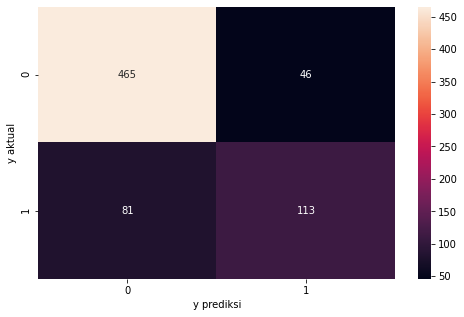

In [788]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLR_test,y_predLR),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

### Evaluation metrics report 


In [789]:
labels = ['Not Churned', 'Churned']
LRAllNoTunNoScal90 = pd.DataFrame(classification_report(yLR_test,y_predLR, target_names= labels, output_dict=True)).T
LRAllNoTunNoScal90

precision    recall  f1-score     support
Not Churned    0.851648  0.909980  0.879849  511.000000
Churned        0.710692  0.582474  0.640227  194.000000
accuracy       0.819858  0.819858  0.819858    0.819858
macro avg      0.781170  0.746227  0.760038  705.000000
weighted avg   0.812860  0.819858  0.813910  705.000000

In [790]:
pd.DataFrame(data= [accuracy_score(yLR_test,y_predLR)*100,recall_score(yLR_test,y_predLR)*100,precision_score(yLR_test,y_predLR)*100,roc_auc_score(yLR_test,y_predLR)*100,f1_score(yLR_test,y_predLR)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.985816
recall         58.247423
precission     71.069182
roc_auc_score  74.622733
F1 Score       64.022663

## All Feature without Parameter Tuning and NO Scalling Spliting data train 80

In [791]:
x_LR1 = df_LR.drop(["Churn"],axis=1)
y_LR1 = df_LR["Churn"]

In [792]:
xLR1_train, xLR1_test, yLR1_train, yLR1_test = train_test_split(x_LR1, y_LR1, test_size = 0.2, random_state = 42)

In [793]:
modelLR1 = LogisticRegression()

modelLR1.fit(xLR1_train,yLR1_train)

LogisticRegression()

In [794]:
y_predLR1 = modelLR1.predict(xLR1_test)

In [795]:
# 10 Folds Cross Validation 
clf_scoreLR1 = cross_val_score(modelLR1, xLR1_train, yLR1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [796]:
confusion_matrix(yLR1_test,y_predLR1)

array([[939,  97],
       [160, 213]])

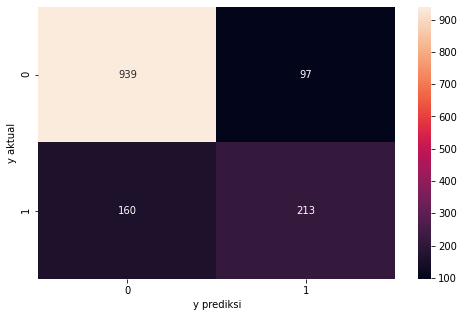

In [797]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLR1_test,y_predLR1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [798]:
labels = ['Not Churned', 'Churned']
LRAllNoTunNoScal80 = pd.DataFrame(classification_report(yLR1_test,y_predLR1, target_names= labels, output_dict=True)).T
LRAllNoTunNoScal80

precision    recall  f1-score      support
Not Churned    0.854413  0.906371  0.879625  1036.000000
Churned        0.687097  0.571046  0.623719   373.000000
accuracy       0.817601  0.817601  0.817601     0.817601
macro avg      0.770755  0.738708  0.751672  1409.000000
weighted avg   0.810120  0.817601  0.811880  1409.000000

In [799]:
pd.DataFrame(data= [accuracy_score(yLR1_test,y_predLR1)*100,recall_score(yLR1_test,y_predLR1)*100,precision_score(yLR1_test,y_predLR1)*100,roc_auc_score(yLR1_test,y_predLR1)*100,f1_score(yLR1_test,y_predLR1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.760114
recall         57.104558
precission     68.709677
roc_auc_score  73.870812
F1 Score       62.371889

### All Feature with Parameter Tuning RS and NO Scalling Spliting data train 90

In [800]:
modelLRRStun = LogisticRegression(solver = 'newton-cg', penalty = 'none', max_iter = 100)

modelLRRStun.fit(xLR_train,yLR_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [801]:
y_predLRRStun= modelLRRStun.predict(xLR_test)

In [802]:
# 10 Folds Cross Validation 
clf_scoreLRRS = cross_val_score(modelLR1, xLR1_train, yLR1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [803]:
confusion_matrix(yLR_test,y_predLRRStun)

array([[462,  49],
       [ 77, 117]])

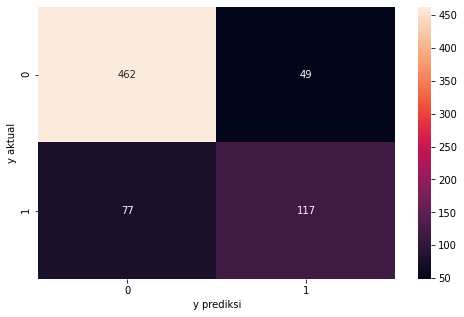

In [804]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLR_test,y_predLRRStun),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [805]:
labels = ['Not Churned', 'Churned']
LRAllTunNoScal90 = pd.DataFrame(classification_report(yLR_test,y_predLRRStun, target_names= labels, output_dict=True)).T
LRAllTunNoScal90

precision    recall  f1-score     support
Not Churned    0.857143  0.904110  0.880000  511.000000
Churned        0.704819  0.603093  0.650000  194.000000
accuracy       0.821277  0.821277  0.821277    0.821277
macro avg      0.780981  0.753601  0.765000  705.000000
weighted avg   0.815227  0.821277  0.816709  705.000000

In [806]:
pd.DataFrame(data= [accuracy_score(yLR_test,y_predLRRStun)*100,recall_score(yLR_test,y_predLRRStun)*100,precision_score(yLR_test,y_predLRRStun)*100,roc_auc_score(yLR_test,y_predLRRStun)*100,f1_score(yLR_test,y_predLRRStun)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)


Score (%)
accuracy       82.127660
recall         60.309278
precission     70.481928
roc_auc_score  75.360119
F1 Score       65.000000

### All Feature with Parameter Tuning RS and NO Scalling Spliting data train 80

In [807]:
modelLRRStun80 = LogisticRegression(solver = 'newton-cg', penalty = 'l2', max_iter = 1000)

modelLRRStun80.fit(xLR1_train,yLR1_train)

LogisticRegression(max_iter=1000, solver='newton-cg')

In [808]:
y_predLRRStun80= modelLRRStun80.predict(xLR1_test)

In [809]:
# 10 Folds Cross Validation 
clf_scoreLRRS80 = cross_val_score(modelLR1, xLR1_train, yLR1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [810]:
confusion_matrix(yLR1_test,y_predLRRStun80)

array([[933, 103],
       [150, 223]])

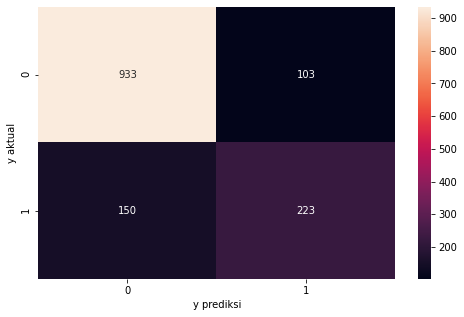

In [811]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLR1_test,y_predLRRStun80),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [812]:
labels = ['Not Churned', 'Churned']
LRAllTunNoScal80 = pd.DataFrame(classification_report(yLR1_test,y_predLRRStun80, target_names= labels, output_dict=True)).T
LRAllTunNoScal80

precision    recall  f1-score     support
Not Churned    0.861496  0.900579  0.880604  1036.00000
Churned        0.684049  0.597855  0.638054   373.00000
accuracy       0.820440  0.820440  0.820440     0.82044
macro avg      0.772772  0.749217  0.759329  1409.00000
weighted avg   0.814521  0.820440  0.816395  1409.00000

In [813]:
pd.DataFrame(data= [accuracy_score(yLR1_test,y_predLRRStun80)*100,recall_score(yLR1_test,y_predLRRStun80)*100,precision_score(yLR1_test,y_predLRRStun80)*100,roc_auc_score(yLR1_test,y_predLRRStun80)*100,f1_score(yLR1_test,y_predLRRStun80)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       82.044003
recall         59.785523
precission     68.404908
roc_auc_score  74.921719
F1 Score       63.805436

- Kami telah melakukan hyperparameter tuning grid search namun mendapat parameter yang sama dengan random search

## Logreg All Feature with scalling 

In [814]:
df2_Scal = df2.copy()

- Karenaa Sesuai Hasil EDA bawha di dalam data kami ada beberapa feature yang skalanya berbeda dengan feature yang lain, maka kita akan lakukan scalling, dan karena data kami setelah kita check pada EDA tidak mempunyai outlier makan kami akan menggunakan MinMAx Scaller dengan range yang menyerupai feature yang lain yaitu 0-5

In [815]:
scaler = MinMaxScaler(feature_range=(0, 5))
Churn_col = list(df2_Scal.columns)
Churn_col.remove("Churn")
for col in Churn_col:
    df2_Scal[col] = df2_Scal[col].astype(float)
    df2_Scal[[col]] = scaler.fit_transform(df2_Scal[[col]])
df2_Scal["Churn"] = pd.to_numeric(df2_Scal["Churn"], downcast='float')
df2_Scal

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0        0.0            0.0      5.0         0.0  0.069444           0.0   
1        5.0            0.0      0.0         0.0  2.361111           5.0   
2        5.0            0.0      0.0         0.0  0.138889           5.0   
3        5.0            0.0      0.0         0.0  3.125000           0.0   
4        0.0            0.0      0.0         0.0  0.138889           5.0   
...      ...            ...      ...         ...       ...           ...   
7038     5.0            0.0      5.0         5.0  1.666667           5.0   
7039     0.0            0.0      5.0         5.0  5.000000           5.0   
7040     0.0            0.0      5.0         5.0  0.763889           0.0   
7041     5.0            5.0      5.0         0.0  0.277778           5.0   
7042     5.0            0.0      0.0         0.0  4.583333           5.0   

      PaperlessBilling  MonthlyCharges  Churn  TotalChargesNum  ...  \
0                  5.0        0.577114    0.0         0.017185  ...   
1                  0.0        1.925373    0.0         1.087820  ...   
2                  5.0        1.771144    1.0         0.062264  ...   
3                  0.0        1.196517    0.0         1.059754  ...   
4                  5.0        2.609453    1.0         0.087308  ...   
...                ...             ...    ...              ...  ...   
7038               5.0        3.310945    0.0         1.145968  ...   
7039               5.0        4.226368    0.0         4.238958  ...   
7040               5.0        0.564677    0.0         0.199458  ...   
7041               5.0        2.793532    1.0         0.176515  ...   
7042               5.0        4.348259    0.0         3.940505  ...   

      StreamingMovies_No  StreamingMovies_No internet service  \
0                    5.0                                  0.0   
1                    5.0                                  0.0   
2                    5.0                                  0.0   
3                    5.0                                  0.0   
4                    5.0                                  0.0   
...                  ...                                  ...   
7038                 0.0                                  0.0   
7039                 0.0                                  0.0   
7040                 5.0                                  0.0   
7041                 5.0                                  0.0   
7042                 0.0                                  0.0   

      StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                     0.0                      5.0                0.0   
1                     0.0                      0.0                5.0   
2                     0.0                      5.0                0.0   
3                     0.0                      0.0                5.0   
4                     0.0                      5.0                0.0   
...                   ...                      ...                ...   
7038                  5.0                      0.0                5.0   
7039                  5.0                      0.0                5.0   
7040                  0.0                      5.0                0.0   
7041                  0.0                      5.0                0.0   
7042                  5.0                      0.0                0.0   

      Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                   0.0                                      0.0   
1                   0.0                                      0.0   
2                   0.0                                      0.0   
3                   0.0                                      5.0   
4                   0.0                                      0.0   
...                 ...                                      ...   
7038                0.0                                      0.0   
7039                0.0               

## Splitting Scalling data

In [816]:
x_LR_Scal = df2_Scal.drop(["Churn"],axis=1)
y_LR_Scal = df2_Scal["Churn"]

In [817]:
x_LR_Scal1 = df2_Scal.drop(["Churn"],axis=1)
y_LR_Scal1 = df2_Scal["Churn"]

In [818]:
# #Scalling All feature Train/Test
xLRScal_train, xLRScal_test, yLRScal_train, yLRScal_test = train_test_split(x_LR_Scal, y_LR_Scal, test_size = 0.1, random_state = 42)
xLRScal1_train, xLRScal1_test, yLRScal1_train, yLRScal1_test = train_test_split(x_LR_Scal1, y_LR_Scal1, test_size = 0.2, random_state = 42)



#Scalling model all feature
modelLRScal = LogisticRegression()
modelLRScal1 = LogisticRegression()



#Fitting model scalling all feature 
modelLRScal.fit(xLRScal_train,yLRScal_train)
modelLRScal1.fit(xLRScal1_train,yLRScal1_train)


LogisticRegression()

### All Feature without Parameter Tuning with Scalling Spliting data train 90

In [819]:
y_predLRScal = modelLRScal.predict(xLRScal_test)


In [820]:
# 10 Folds Cross Validation 
clf_scoreLRScal90 = cross_val_score(modelLRScal, xLRScal_train, yLRScal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [821]:
confusion_matrix(yLRScal_test,y_predLRScal)

array([[462,  49],
       [ 78, 116]])

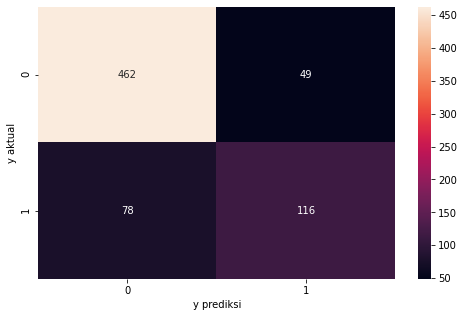

In [822]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal_test,y_predLRScal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [823]:
labels = ['Not Churned', 'Churned']
LRAllNoTunScal90 = pd.DataFrame(classification_report(yLRScal_test,y_predLRScal, target_names= labels, output_dict=True)).T
LRAllNoTunScal90

precision    recall  f1-score     support
Not Churned    0.855556  0.904110  0.879163  511.000000
Churned        0.703030  0.597938  0.646240  194.000000
accuracy       0.819858  0.819858  0.819858    0.819858
macro avg      0.779293  0.751024  0.762701  705.000000
weighted avg   0.813584  0.819858  0.815068  705.000000

In [824]:
print(classification_report(yLRScal_test,y_predLRScal))

precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       511
         1.0       0.70      0.60      0.65       194

    accuracy                           0.82       705
   macro avg       0.78      0.75      0.76       705
weighted avg       0.81      0.82      0.82       705



In [825]:
pd.DataFrame(data = [accuracy_score(yLRScal_test, y_predLRScal)*100, recall_score(yLRScal_test, y_predLRScal)*100,
                    precision_score(yLRScal_test, y_predLRScal)*100, roc_auc_score(yLRScal_test, y_predLRScal)*100,
                    f1_score(yLRScal_test, y_predLRScal)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
          

Score (%)
accuracy       81.985816
recall         59.793814
precision      70.303030
roc_auc_score  75.102387
f1_score       64.623955

### All Feature without Parameter Tuning  with Scalling Spliting data train 80

In [826]:
y_predLRScal1 = modelLRScal1.predict(xLRScal1_test)

In [827]:
# 10 Folds Cross Validation 
clf_scoreLRScal80 = cross_val_score(modelLRScal1, xLRScal1_train, yLRScal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

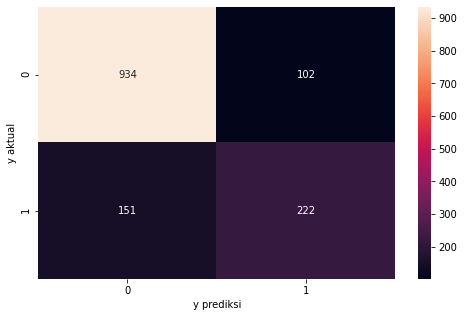

In [828]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal1_test,y_predLRScal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [829]:
labels = ['Not Churned', 'Churned']
LRAllNoTunScal80 = pd.DataFrame(classification_report(yLRScal1_test,y_predLRScal1, target_names= labels, output_dict=True)).T
LRAllNoTunScal80

precision    recall  f1-score     support
Not Churned    0.860829  0.901544  0.880717  1036.00000
Churned        0.685185  0.595174  0.637016   373.00000
accuracy       0.820440  0.820440  0.820440     0.82044
macro avg      0.773007  0.748359  0.758866  1409.00000
weighted avg   0.814332  0.820440  0.816203  1409.00000

In [830]:
pd.DataFrame(data = [accuracy_score(yLRScal1_test, y_predLRScal1)*100, recall_score(yLRScal1_test, y_predLRScal1)*100,
                    precision_score(yLRScal1_test, y_predLRScal1)*100, roc_auc_score(yLRScal1_test, y_predLRScal1)*100,
                    f1_score(yLRScal1_test, y_predLRScal1)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
          

Score (%)
accuracy       82.044003
recall         59.517426
precision      68.518519
roc_auc_score  74.835933
f1_score       63.701578

### All Feature with Parameter Tuning RS with Scalling Spliting data train 90

In [831]:
model_LogReg_RS_Scal = LogisticRegression(solver='newton-cg', penalty = 'none', max_iter = 1000)
model_LogReg_RS_Scal.fit(xLRScal_train, yLRScal_train)

LogisticRegression(max_iter=1000, penalty='none', solver='newton-cg')

In [832]:
y_predLRRSScal = model_LogReg_RS_Scal.predict(xLRScal_test)

In [833]:
# 10 Folds Cross Validation 
clf_scoreLRRSScal90 = cross_val_score(model_LogReg_RS_Scal, xLRScal_train, yLRScal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

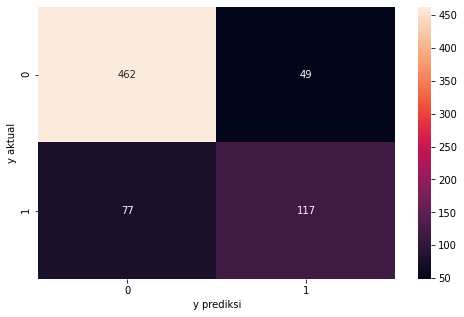

In [834]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal_test,y_predLRRSScal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [835]:
labels = ['Not Churned', 'Churned']
LRAllTunScal90 = pd.DataFrame(classification_report(yLRScal_test, y_predLRRSScal, target_names= labels, output_dict=True)).T
LRAllTunScal90

precision    recall  f1-score     support
Not Churned    0.857143  0.904110  0.880000  511.000000
Churned        0.704819  0.603093  0.650000  194.000000
accuracy       0.821277  0.821277  0.821277    0.821277
macro avg      0.780981  0.753601  0.765000  705.000000
weighted avg   0.815227  0.821277  0.816709  705.000000

In [836]:
print(classification_report(yLRScal_test,y_predLRRSScal))

precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       511
         1.0       0.70      0.60      0.65       194

    accuracy                           0.82       705
   macro avg       0.78      0.75      0.77       705
weighted avg       0.82      0.82      0.82       705



In [837]:
pd.DataFrame(data = [accuracy_score(yLRScal_test, y_predLRRSScal)*100, recall_score(yLRScal_test, y_predLRRSScal)*100,
                    precision_score(yLRScal_test, y_predLRRSScal)*100, roc_auc_score(yLRScal_test, y_predLRRSScal)*100,
                    f1_score(yLRScal_test, y_predLRRSScal)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
      

Score (%)
accuracy       82.127660
recall         60.309278
precision      70.481928
roc_auc_score  75.360119
f1_score       65.000000

### All Feature with Parameter Tuning RS with Scalling Spliting data train 80

In [838]:
model_LogReg_RS_Scal1 = LogisticRegression(solver='newton-cg', penalty = 'l2', max_iter = 100)
model_LogReg_RS_Scal1.fit(xLRScal1_train, yLRScal1_train)

LogisticRegression(solver='newton-cg')

In [839]:
y_predLRRSScal1 = model_LogReg_RS_Scal1.predict(xLRScal1_test)

In [840]:
# 10 Folds Cross Validation 
clf_scoreLRRSScal80 = cross_val_score(model_LogReg_RS_Scal1, xLRScal1_train, yLRScal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

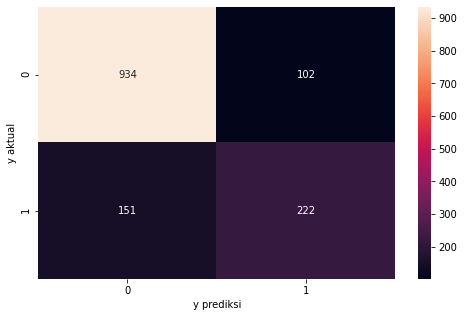

In [841]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal1_test,y_predLRRSScal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [842]:
labels = ['Not Churned', 'Churned']
LRAllTunScal80 = pd.DataFrame(classification_report(yLRScal1_test, y_predLRRSScal1, target_names= labels, output_dict=True)).T
LRAllTunScal80

precision    recall  f1-score     support
Not Churned    0.860829  0.901544  0.880717  1036.00000
Churned        0.685185  0.595174  0.637016   373.00000
accuracy       0.820440  0.820440  0.820440     0.82044
macro avg      0.773007  0.748359  0.758866  1409.00000
weighted avg   0.814332  0.820440  0.816203  1409.00000

In [843]:
print(classification_report(yLRScal1_test,y_predLRRSScal1))

precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1036
         1.0       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [844]:
pd.DataFrame(data = [accuracy_score(yLRScal1_test, y_predLRRSScal1)*100, recall_score(yLRScal1_test, y_predLRRSScal1)*100,
                    precision_score(yLRScal1_test, y_predLRRSScal1)*100, roc_auc_score(yLRScal1_test, y_predLRRSScal1)*100,
                    f1_score(yLRScal1_test, y_predLRRSScal1)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
      

Score (%)
accuracy       82.044003
recall         59.517426
precision      68.518519
roc_auc_score  74.835933
f1_score       63.701578

### All Feature with Parameter Tuning GS with Scalling Spliting data train 90

In [845]:
model_LogReg_GS_Scal = LogisticRegression(solver='newton-cg', penalty = 'none', max_iter = 100)
model_LogReg_GS_Scal.fit(xLRScal_train, yLRScal_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [846]:
# 10 Folds Cross Validation 
clf_scoreLRGSScal = cross_val_score(model_LogReg_GS_Scal, xLRScal_train, yLRScal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [847]:
y_predLRGSScal = model_LogReg_GS_Scal.predict(xLRScal_test)

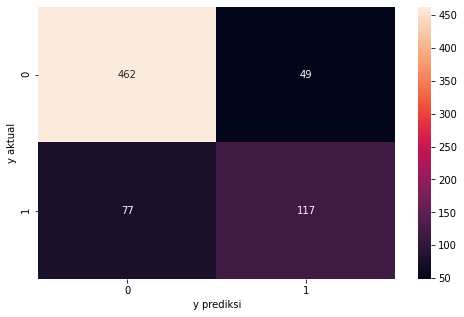

In [848]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal_test,y_predLRGSScal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [849]:
labels = ['Not Churned', 'Churned']
LRAllGSTunScal90 = pd.DataFrame(classification_report(yLRScal_test,y_predLRGSScal, target_names= labels, output_dict=True)).T
LRAllGSTunScal90

precision    recall  f1-score     support
Not Churned    0.857143  0.904110  0.880000  511.000000
Churned        0.704819  0.603093  0.650000  194.000000
accuracy       0.821277  0.821277  0.821277    0.821277
macro avg      0.780981  0.753601  0.765000  705.000000
weighted avg   0.815227  0.821277  0.816709  705.000000

In [850]:
print(classification_report(yLRScal_test,y_predLRGSScal))

precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       511
         1.0       0.70      0.60      0.65       194

    accuracy                           0.82       705
   macro avg       0.78      0.75      0.77       705
weighted avg       0.82      0.82      0.82       705



In [851]:
pd.DataFrame(data = [accuracy_score(yLRScal_test, y_predLRGSScal)*100, recall_score(yLRScal_test, y_predLRGSScal)*100,
                    precision_score(yLRScal_test, y_predLRGSScal)*100, roc_auc_score(yLRScal_test, y_predLRGSScal)*100,
                    f1_score(yLRScal_test, y_predLRGSScal)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
      

Score (%)
accuracy       82.127660
recall         60.309278
precision      70.481928
roc_auc_score  75.360119
f1_score       65.000000

### All Feature with Parameter Tuning GS with Scalling Spliting data train 80

In [852]:
model_LogReg_GS_Scal1 = LogisticRegression(solver='newton-cg', penalty = 'none', max_iter = 100)
model_LogReg_GS_Scal1.fit(xLRScal1_train, yLRScal1_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [853]:
# 10 Folds Cross Validation 
clf_scoreLRGSScal1 = cross_val_score(model_LogReg_GS_Scal1, xLRScal1_train, yLRScal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [854]:
y_predLRGSScal1 = model_LogReg_GS_Scal1.predict(xLRScal1_test)

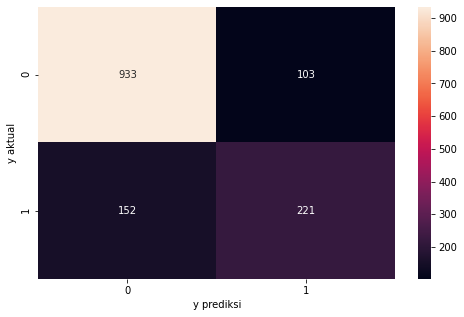

In [855]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yLRScal1_test,y_predLRGSScal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [856]:
labels = ['Not Churned', 'Churned']
LRAllGSTunScal80 = pd.DataFrame(classification_report(yLRScal1_test,y_predLRGSScal1, target_names= labels, output_dict=True)).T
LRAllGSTunScal80

precision    recall  f1-score      support
Not Churned    0.859908  0.900579  0.879774  1036.000000
Churned        0.682099  0.592493  0.634146   373.000000
accuracy       0.819021  0.819021  0.819021     0.819021
macro avg      0.771003  0.746536  0.756960  1409.000000
weighted avg   0.812837  0.819021  0.814750  1409.000000

In [857]:
pd.DataFrame(data = [accuracy_score(yLRScal1_test, y_predLRGSScal1)*100, recall_score(yLRScal1_test, y_predLRGSScal1)*100,
                    precision_score(yLRScal1_test, y_predLRGSScal1)*100, roc_auc_score(yLRScal1_test, y_predLRGSScal1)*100,
                    f1_score(yLRScal1_test, y_predLRGSScal1)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])
   

Score (%)
accuracy       81.902058
recall         59.249330
precision      68.209877
roc_auc_score  74.653622
f1_score       63.414634

In [858]:

# model_best_AllFeature = pd.concat([LRAllNoTunNoScal90, LRAllNoTunNoScal80, LRAllTunNoScal90, LRAllTunNoScal80, LRAllNoTunScal90,  LRAllNoTunScal80, LRAllTunScal90,LRAllTunScal80,LRAllGSTunScal90,LRAllGSTunScal80], keys = ['LR all feature tanpa tuning tanpa scalling 90','LR all feature tanpa tuning tanpa scalling 80', 'LR all feature tuning tanpa scalling 90' ,'LR all feature tuning tanpa scalling 80','LR all feature No tuning scalling 90','LR all feature No tuning scalling 80','LR all feature tuning scalling 90','LR all feature tuning scalling 80','LR all feature tuning GS scalling 90','LR all feature tuning GS scalling 80'])

In [859]:
# model_best_AllFeature

In [860]:
LRAllTunNoScal90

precision    recall  f1-score     support
Not Churned    0.857143  0.904110  0.880000  511.000000
Churned        0.704819  0.603093  0.650000  194.000000
accuracy       0.821277  0.821277  0.821277    0.821277
macro avg      0.780981  0.753601  0.765000  705.000000
weighted avg   0.815227  0.821277  0.816709  705.000000

# Model Test With Feature Selection

## Feature Selection Without Parameter Tuning without Scalling Train 90

- Dari hasil feature selection pada notebook yang berbeda kami simpulkan akan hanya memakai beberapa feature terbaik

In [861]:
df2

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      PaperlessBilling  MonthlyCharges  Churn  TotalChargesNum  ...  \
0                    1           29.85      0            29.85  ...   
1                    0           56.95      0          1889.50  ...   
2                    1           53.85      1           108.15  ...   
3                    0           42.30      0          1840.75  ...   
4                    1           70.70      1           151.65  ...   
...                ...             ...    ...              ...  ...   
7038                 1           84.80      0          1990.50  ...   
7039                 1          103.20      0          7362.90  ...   
7040                 1           29.60      0           346.45  ...   
7041                 1           74.40      1           306.60  ...   
7042                 1          105.65      0          6844.50  ...   

      StreamingMovies_No  StreamingMovies_No internet service  \
0                      1                                    0   
1                      1                                    0   
2                      1                                    0   
3                      1                                    0   
4                      1                                    0   
...                  ...                                  ...   
7038                   0                                    0   
7039                   0                                    0   
7040                   1                                    0   
7041                   1                                    0   
7042                   0                                    0   

      StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                       0                        1                  0   
1                       0                        0                  1   
2                       0                        1                  0   
3                       0                        0                  1   
4                       0                        1                  0   
...                   ...                      ...                ...   
7038                    1                        0                  1   
7039                    1                        0                  1   
7040                    0                        1                  0   
7041                    0                        1                  0   
7042                    1                        0                  0   

      Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                     0                                        0   
1                     0                                        0   
2                     0                                        0   
3                     0                                        1   
4                     0                                        0   
...                 ...                                      ...   
7038                  0                                        0   
7039                  0                                       

In [862]:
xsel = df2[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
ysel = df2["Churn"]

In [863]:
xa_train, xa_test, ya_train, ya_test = train_test_split(xsel, ysel, test_size = 0.1, random_state = 42)

xb_train, xb_test, yb_train, yb_test = train_test_split(xsel, ysel, test_size = 0.2, random_state = 42)

In [864]:
modelsel = LogisticRegression()
modelselb = LogisticRegression()
modelsel.fit(xa_train,ya_train)
modelselb.fit(xb_train,yb_train)

LogisticRegression()

In [865]:
# 10 Folds Cross Validation 
clf_scoresel90 = cross_val_score(modelsel, xa_train, ya_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [866]:
y_predsel = modelsel.predict(xa_test)

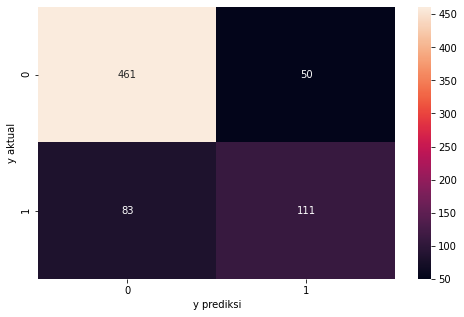

In [867]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ya_test,y_predsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [868]:
labels = ['Not Churned', 'Churned']
LRselNoTunScal90 = pd.DataFrame(classification_report(ya_test,y_predsel, target_names= labels, output_dict=True)).T
LRselNoTunScal90

precision    recall  f1-score     support
Not Churned    0.847426  0.902153  0.873934  511.000000
Churned        0.689441  0.572165  0.625352  194.000000
accuracy       0.811348  0.811348  0.811348    0.811348
macro avg      0.768434  0.737159  0.749643  705.000000
weighted avg   0.803952  0.811348  0.805530  705.000000

In [869]:
print(classification_report(ya_test,y_predsel))

precision    recall  f1-score   support

           0       0.85      0.90      0.87       511
           1       0.69      0.57      0.63       194

    accuracy                           0.81       705
   macro avg       0.77      0.74      0.75       705
weighted avg       0.80      0.81      0.81       705



In [870]:
pd.DataFrame(data = [accuracy_score(ya_test, y_predsel)*100, recall_score(ya_test, y_predsel)*100,
                    precision_score(ya_test, y_predsel)*100, roc_auc_score(ya_test, y_predsel)*100,
                    f1_score(ya_test, y_predsel)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       81.134752
recall         57.216495
precision      68.944099
roc_auc_score  73.715880
f1_score       62.535211

## Feature Selection Without Parameter Tuning without Scalling Train 80

In [871]:
y_predselb = modelselb.predict(xb_test)

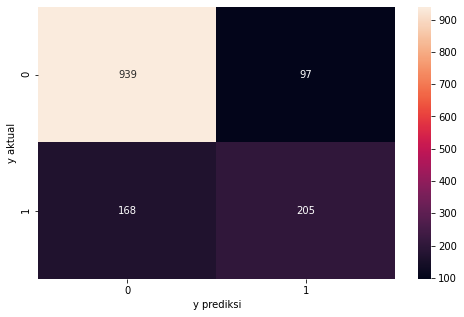

In [872]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yb_test,y_predselb),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [873]:
print(classification_report(yb_test,y_predselb))

precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



In [874]:
pd.DataFrame(data = [accuracy_score(yb_test, y_predselb)*100, recall_score(yb_test, y_predselb)*100,
                    precision_score(yb_test, y_predselb)*100, roc_auc_score(yb_test, y_predselb)*100,
                    f1_score(yb_test, y_predselb)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       81.192335
recall         54.959786
precision      67.880795
roc_auc_score  72.798426
f1_score       60.740741

## Feature Selection Parameter Tuning Random Search without Scalling Train 90

In [875]:
modelseltun = LogisticRegression(solver= 'newton-cg', penalty= 'l2', max_iter= 1000)
modelselbtun = LogisticRegression(solver= 'newton-cg', penalty= 'l2', max_iter= 10000)
modelseltun.fit(xa_train,ya_train)
modelselbtun.fit(xb_train,yb_train)

LogisticRegression(max_iter=10000, solver='newton-cg')

In [876]:
# 10 Folds Cross Validation 
clf_scoreseltun90 = cross_val_score(modelsel, xa_train, ya_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [877]:
y_predseltun = modelseltun.predict(xa_test)

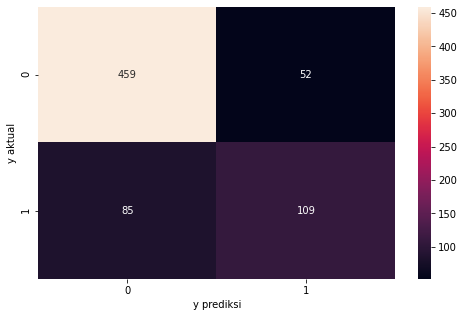

In [878]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ya_test,y_predseltun),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [879]:
print(classification_report(ya_test,y_predseltun))

precision    recall  f1-score   support

           0       0.84      0.90      0.87       511
           1       0.68      0.56      0.61       194

    accuracy                           0.81       705
   macro avg       0.76      0.73      0.74       705
weighted avg       0.80      0.81      0.80       705



In [880]:
pd.DataFrame(data = [accuracy_score(ya_test, y_predseltun)*100, recall_score(ya_test, y_predseltun)*100,
                    precision_score(ya_test, y_predseltun)*100, roc_auc_score(ya_test, y_predseltun)*100,
                    f1_score(ya_test, y_predsel)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.567376
recall         56.185567
precision      67.701863
roc_auc_score  73.004721
f1_score       62.535211

## Feature Selection Parameter Tuning Random Search without Scalling Train 80

In [881]:
# 10 Folds Cross Validation 
clf_scoreseltun80 = cross_val_score(modelsel, xa_train, ya_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [882]:
y_predseltunb = modelselbtun.predict(xb_test)

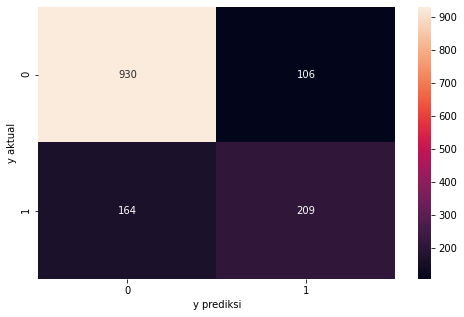

In [883]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yb_test,y_predseltunb),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [884]:
print(classification_report(yb_test,y_predseltunb))

precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.66      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [885]:
pd.DataFrame(data = [accuracy_score(yb_test, y_predseltunb)*100, recall_score(yb_test, y_predseltunb)*100,
                    precision_score(yb_test, y_predseltunb)*100, roc_auc_score(yb_test, y_predseltunb)*100,
                    f1_score(yb_test, y_predselb)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.837473
recall         56.032172
precision      66.349206
roc_auc_score  72.900256
f1_score       60.740741

## Feature Selection Parameter Tuning Grid Search without Scalling Train 90

In [886]:
modelselGS = LogisticRegression(solver= 'lbfgs', penalty= 'none', max_iter= 100)

modelselGS.fit(xa_train,ya_train)


LogisticRegression(penalty='none')

In [887]:
# 10 Folds Cross Validation 
clf_scoreselGS = cross_val_score(modelselGS, xa_train, ya_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [888]:
y_predselGS = modelselGS.predict(xa_test)

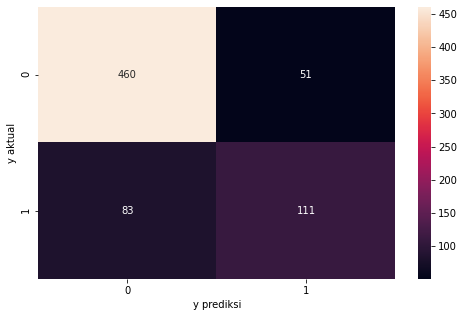

In [889]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ya_test,y_predselGS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [890]:
print(classification_report(ya_test,y_predselGS))

precision    recall  f1-score   support

           0       0.85      0.90      0.87       511
           1       0.69      0.57      0.62       194

    accuracy                           0.81       705
   macro avg       0.77      0.74      0.75       705
weighted avg       0.80      0.81      0.80       705



In [891]:
pd.DataFrame(data = [accuracy_score(ya_test, y_predselGS)*100, recall_score(ya_test, y_predselGS)*100,
                    precision_score(ya_test, y_predselGS)*100, roc_auc_score(ya_test, y_predselGS)*100,
                    f1_score(ya_test, y_predselGS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.992908
recall         57.216495
precision      68.518519
roc_auc_score  73.618032
f1_score       62.359551

## Feature Selection Parameter Tuning Grid Search without Scalling Train 80

In [892]:
modelselGS1 = LogisticRegression(solver= 'lbfgs', penalty= 'none', max_iter= 100)

modelselGS1.fit(xb_train,yb_train)

LogisticRegression(penalty='none')

In [893]:
# 10 Folds Cross Validation 
clf_scoreselGS80 = cross_val_score(modelselGS1, xb_train, yb_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [894]:
y_predselGS1 = modelselGS1.predict(xb_test)

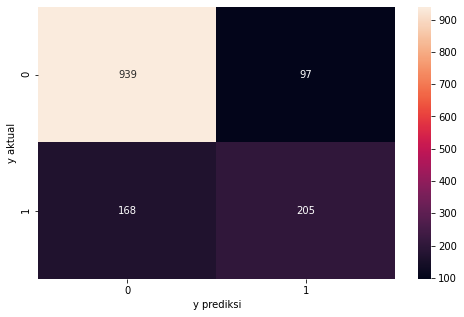

In [895]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yb_test,y_predselGS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [896]:
print(classification_report(yb_test,y_predselGS1))

precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



In [897]:
pd.DataFrame(data = [accuracy_score(yb_test, y_predselGS1)*100, recall_score(yb_test, y_predselGS1)*100,
                    precision_score(yb_test, y_predselGS1)*100, roc_auc_score(yb_test, y_predselGS1)*100,
                    f1_score(yb_test, y_predselGS1)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       81.192335
recall         54.959786
precision      67.880795
roc_auc_score  72.798426
f1_score       60.740741

## Feature Selection Without Parameter Tuning with Scalling Train 90

In [898]:
xselscal = df2_Scal[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
yselscal = df2_Scal["Churn"]

In [899]:
xascal_train, xascal_test, yascal_train, yascal_test = train_test_split(xselscal, yselscal, test_size = 0.1, random_state = 42)

xbscal_train, xbscal_test, ybscal_train, ybscal_test = train_test_split(xselscal, yselscal, test_size = 0.2, random_state = 42)

In [900]:
modelselscal = LogisticRegression()
modelselbscal = LogisticRegression()
modelselscal.fit(xascal_train,yascal_train)
modelselbscal.fit(xbscal_train,ybscal_train)

LogisticRegression()

In [901]:
# 10 Folds Cross Validation 
clf_scoreselscal90 = cross_val_score(modelselscal, xascal_train, yascal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [902]:
y_predselscal = modelselscal.predict(xascal_test)

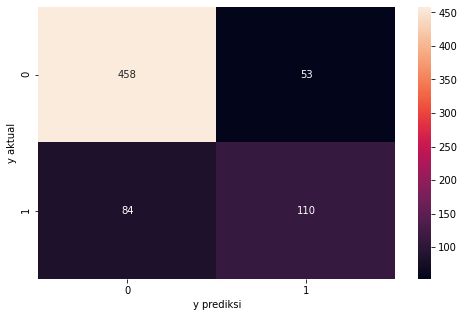

In [903]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yascal_test,y_predselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [904]:
print(classification_report(yascal_test,y_predselscal))

precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       511
         1.0       0.67      0.57      0.62       194

    accuracy                           0.81       705
   macro avg       0.76      0.73      0.74       705
weighted avg       0.80      0.81      0.80       705



In [905]:
pd.DataFrame(data = [accuracy_score(yascal_test, y_predselscal)*100, recall_score(yascal_test, y_predselscal)*100,
                    precision_score(yascal_test, y_predselscal)*100, roc_auc_score(yascal_test, y_predselscal)*100,
                    f1_score(yascal_test, y_predselscal)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.567376
recall         56.701031
precision      67.484663
roc_auc_score  73.164605
f1_score       61.624650

## Feature Selection Without Parameter Tuning Random Search with Scalling Train 80

In [906]:
# 10 Folds Cross Validation 
clf_scoreselscal80 = cross_val_score(modelselbscal, xb_train, yb_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [907]:
y_predselscalb = modelselbscal.predict(xbscal_test)

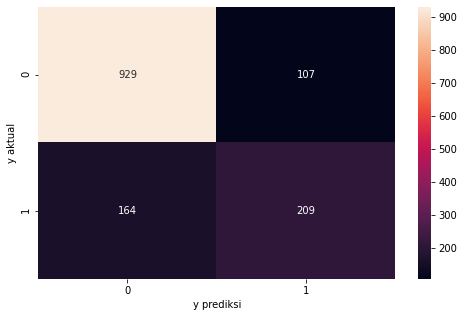

In [908]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ybscal_test,y_predselscalb),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [909]:
print(classification_report(ybscal_test,y_predselscalb))

precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1036
         1.0       0.66      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [910]:
pd.DataFrame(data = [accuracy_score(ybscal_test, y_predselscalb)*100, recall_score(ybscal_test, y_predselscalb)*100,
                    precision_score(ybscal_test, y_predselscalb)*100, roc_auc_score(ybscal_test, y_predselscalb)*100,
                    f1_score(ybscal_test, y_predselscalb)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.766501
recall         56.032172
precision      66.139241
roc_auc_score  72.851993
f1_score       60.667634

## Feature Selection With Parameter Tuning Random Search with Scalling Train 90

In [911]:
# modelselscaltun = LogisticRegression(solver= 'newton-cg', penalty= 'none', max_iter= 100)
# modelselbscaltun = LogisticRegression(solver= 'newton-cg', penalty= 'none', max_iter= 100)
modelselscaltun = LogisticRegression(solver= 'lbfgs', penalty= 'none', max_iter= 100)
modelselbscaltun = LogisticRegression(solver= 'lbfgs', penalty= 'none', max_iter= 100)
modelselscaltun.fit(xascal_train,yascal_train)
modelselbscaltun.fit(xbscal_train,ybscal_train)

LogisticRegression(penalty='none')

In [912]:
# 10 Folds Cross Validation 
clf_scoreselscaltun90 = cross_val_score(modelselscaltun, xascal_train, yascal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [913]:
y_predselscaltun = modelselscaltun.predict(xascal_test)

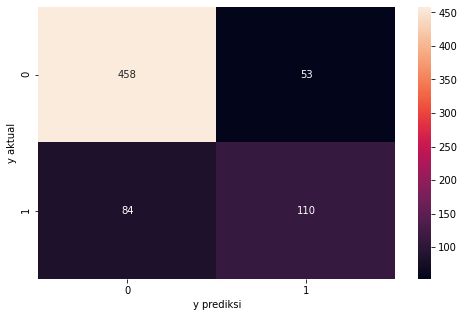

In [914]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yascal_test,y_predselscaltun),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [915]:
print(classification_report(yascal_test,y_predselscaltun))

precision    recall  f1-score   support

         0.0       0.85      0.90      0.87       511
         1.0       0.67      0.57      0.62       194

    accuracy                           0.81       705
   macro avg       0.76      0.73      0.74       705
weighted avg       0.80      0.81      0.80       705



In [916]:
pd.DataFrame(data = [accuracy_score(yascal_test, y_predselscaltun)*100, recall_score(yascal_test, y_predselscaltun)*100,
                    precision_score(yascal_test, y_predselscaltun)*100, roc_auc_score(yascal_test, y_predselscaltun)*100,
                    f1_score(yascal_test, y_predselscaltun)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.567376
recall         56.701031
precision      67.484663
roc_auc_score  73.164605
f1_score       61.624650

## Feature Selection With Parameter Tuning Random Search with Scalling Train 80

In [917]:
# 10 Folds Cross Validation 
clf_scoreselscaltun80 = cross_val_score(modelselbscaltun, xbscal_train, ybscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [918]:
y_predselscaltunb = modelselbscaltun.predict(xbscal_test)

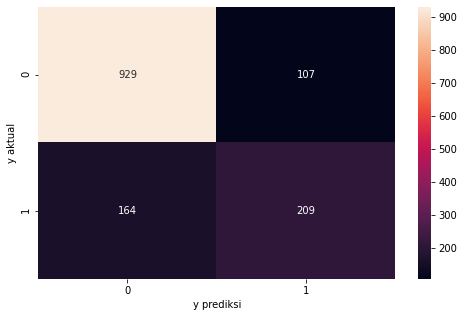

In [919]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(ybscal_test,y_predselscaltunb),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [920]:
print(classification_report(ybscal_test,y_predselscaltunb))

precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1036
         1.0       0.66      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [921]:
pd.DataFrame(data = [accuracy_score(ybscal_test, y_predselscaltunb)*100, recall_score(ybscal_test, y_predselscaltunb)*100,
                    precision_score(ybscal_test, y_predselscaltunb)*100, roc_auc_score(ybscal_test, y_predselscaltunb)*100,
                    f1_score(ybscal_test, y_predselscaltunb)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

Score (%)
accuracy       80.766501
recall         56.032172
precision      66.139241
roc_auc_score  72.851993
f1_score       60.667634

## RINGKASAN DAN KESIMPULAN MODEL TEST LOGISTIC REGRESSION

In [922]:
Logreg_Summary = pd.DataFrame({"Logistic Regression": ["accuracy","recall","precision","roc_auc_score","f1_score"],
                                "All Feature without Parameter Tuning and without Scalling train 90": [accuracy_score(yLR_test,y_predLR)*100,recall_score(yLR_test,y_predLR)*100,precision_score(yLR_test,y_predLR)*100,roc_auc_score(yLR_test,y_predLR)*100,f1_score(yLR_test,y_predLR)*100],
                                "All Feature without Parameter Tuning and without Scalling train 80":[accuracy_score(yLR1_test,y_predLR1)*100,recall_score(yLR1_test,y_predLR1)*100,precision_score(yLR1_test,y_predLR1)*100,roc_auc_score(yLR1_test,y_predLR1)*100,f1_score(yLR1_test,y_predLR1)*100],
                                "All Feature with Parameter Tuning RS and without Scalling train 90":[accuracy_score(yLRScal_test, y_predLRRSScal)*100, recall_score(yLRScal_test, y_predLRRSScal)*100,
                    precision_score(yLRScal_test, y_predLRRSScal)*100, roc_auc_score(yLRScal_test, y_predLRRSScal)*100,
                    f1_score(yLRScal_test, y_predLRRSScal)*100],
                                "All Feature with Parameter Tuning RS and without Scalling train 80":[accuracy_score(yLR1_test,y_predLRRStun80)*100,recall_score(yLR1_test,y_predLRRStun80)*100,precision_score(yLR1_test,y_predLRRStun80)*100,roc_auc_score(yLR1_test,y_predLRRStun80)*100,f1_score(yLR1_test,y_predLRRStun80)*100],
                                "All Feature with Parameter Tuning RS and Scalling train 90":[accuracy_score(yLRScal_test, y_predLRScal)*100, recall_score(yLRScal_test, y_predLRScal)*100,
                    precision_score(yLRScal_test, y_predLRScal)*100, roc_auc_score(yLRScal_test, y_predLRScal)*100,
                    f1_score(yLRScal_test, y_predLRScal)*100],
                                "All Feature with Parameter Tuning RS and Scalling train 80":[accuracy_score(yLRScal1_test, y_predLRScal1)*100, recall_score(yLRScal1_test, y_predLRScal1)*100,
                    precision_score(yLRScal1_test, y_predLRScal1)*100, roc_auc_score(yLRScal1_test, y_predLRScal1)*100,
                    f1_score(yLRScal1_test, y_predLRScal1)*100],
                                "Feature Selection Without Parameter Tuning without Scalling Train 90":[accuracy_score(ya_test, y_predsel)*100, recall_score(ya_test, y_predsel)*100,
                    precision_score(ya_test, y_predsel)*100, roc_auc_score(ya_test, y_predsel)*100,
                    f1_score(ya_test, y_predsel)*100],
                                "Feature Selection Without Parameter Tuning without Scalling Train 80":[accuracy_score(yb_test, y_predselb)*100, recall_score(yb_test, y_predselb)*100,
                    precision_score(yb_test, y_predselb)*100, roc_auc_score(yb_test, y_predselb)*100,
                    f1_score(yb_test, y_predselb)*100],
                                "Feature Selection Without Parameter Tuning with Scalling Train 90":[accuracy_score(yascal_test, y_predselscal)*100, recall_score(yascal_test, y_predselscal)*100,
                    precision_score(yascal_test, y_predselscal)*100, roc_auc_score(yascal_test, y_predselscal)*100,
                    f1_score(yascal_test, y_predselscal)*100],
                                "Feature Selection Without Parameter Tuning with Scalling Train 80":[accuracy_score(ybscal_test, y_predselscalb)*100, recall_score(ybscal_test, y_predselscalb)*100,
                    precision_score(ybscal_test, y_predselscalb)*100, roc_auc_score(ybscal_test, y_predselscalb)*100,
                    f1_score(ybscal_test, y_predselscalb)*100],
                                "Feature Selection With Parameter Tuning without Scalling Train 90":[accuracy_score(ya_test, y_predseltun)*100, recall_score(ya_test, y_predseltun)*100,
                    precision_score(ya_test, y_predseltun)*100, roc_auc_score(ya_test, y_predseltun)*100,
                    f1_score(ya_test, y_predsel)*100],
                                "Feature Selection With Parameter Tuning without Scalling Train 80":[accuracy_score(yb_test, y_predseltunb)*100, recall_score(yb_test, y_predseltunb)*100,
                    precision_score(yb_test, y_predseltunb)*100, roc_auc_score(yb_test, y_predseltunb)*100,
                    f1_score(yb_test, y_predselb)*100],

                                "Feature Selection With Parameter Tuning with Scalling Train 90":[accuracy_score(yascal_test, y_predselscaltun)*100, recall_score(yascal_test, y_predselscaltun)*100,
                    precision_score(yascal_test, y_predselscaltun)*100, roc_auc_score(yascal_test, y_predselscaltun)*100,
                    f1_score(yascal_test, y_predselscaltun)*100],
                                "Feature Selection With Parameter Tuning with Scalling Train 80":[accuracy_score(ybscal_test, y_predselscaltunb)*100, recall_score(ybscal_test, y_predselscaltunb)*100,
                    precision_score(ybscal_test, y_predselscaltunb)*100, roc_auc_score(ybscal_test, y_predselscaltunb)*100,
                    f1_score(ybscal_test, y_predselscaltunb)*100]    
})
a = Logreg_Summary.set_index("Logistic Regression").T
a




Logistic Regression                                  accuracy     recall  \
All Feature without Parameter Tuning and withou...  81.985816  58.247423   
All Feature without Parameter Tuning and withou...  81.760114  57.104558   
All Feature with Parameter Tuning RS and withou...  82.127660  60.309278   
All Feature with Parameter Tuning RS and withou...  82.044003  59.785523   
All Feature with Parameter Tuning RS and Scalli...  81.985816  59.793814   
All Feature with Parameter Tuning RS and Scalli...  82.044003  59.517426   
Feature Selection Without Parameter Tuning with...  81.134752  57.216495   
Feature Selection Without Parameter Tuning with...  81.192335  54.959786   
Feature Selection Without Parameter Tuning with...  80.567376  56.701031   
Feature Selection Without Parameter Tuning with...  80.766501  56.032172   
Feature Selection With Parameter Tuning without...  80.567376  56.185567   
Feature Selection With Parameter Tuning without...  80.837473  56.032172   
Feature Selection With Parameter Tuning with Sc...  80.567376  56.701031   
Feature Selection With Parameter Tuning with Sc...  80.766501  56.032172   

Logistic Regression                                 precision  roc_auc_score  \
All Feature without Parameter Tuning and withou...  71.069182      74.622733   
All Feature without Parameter Tuning and withou...  68.709677      73.870812   
All Feature with Parameter Tuning RS and withou...  70.481928      75.360119   
All Feature with Parameter Tuning RS and withou...  68.404908      74.921719   
All Feature with Parameter Tuning RS and Scalli...  70.303030      75.102387   
All Feature with Parameter Tuning RS and Scalli...  68.518519      74.835933   
Feature Selection Without Parameter Tuning with...  68.944099      73.715880   
Feature Selection Without Parameter Tuning with...  67.880795      72.798426   
Feature Selection Without Parameter Tuning with...  67.484663      73.164605   
Feature Selection Without Parameter Tuning with...  66.139241      72.851993   
Feature Selection With Parameter Tuning without...  67.701863      73.004721   
Feature Selection With Parameter Tuning without...  66.349206      72.900256   
Feature Selection With Parameter Tuning with Sc...  67.484663      73.164605   
Feature Selection With Parameter Tuning with Sc...  66.139241      72.851993   

Logistic Regression                                  f1_score  
All Feature without Parameter Tuning and withou...  64.022663  
All Feature without Parameter Tuning and withou...  62.371889  
All Feature with Parameter Tuning RS and withou...  65.000000  
All Feature with Parameter Tuning RS and withou...  63.805436  
All Feature with Parameter Tuning RS and Scalli...  64.623955  
All Feature with Parameter Tuning RS and Scalli...  63.701578  
Feature Selection Without Parameter Tuning with...  62.535211  
Feature Selection Without Parameter Tuning with...  60.740741  
Feature Selection Without Parameter Tuning with...  61.624650  
Feature Selection Without Parameter Tuning with...  60.667634  
Feature Selection With Parameter Tuning without...  62.535211  
Feature Selection With Parameter Tuning without...  60.740741  
Feature Selection With Parameter Tuning with Sc...  61.624650  
Feature Selection With Parameter Tuning with Sc...  60.667634

## The Best Test Logistic Regression in Condition: All Feature with Parameter Tuning RS and without Scalling train 90 

In [1480]:
Logreg_Summary = pd.DataFrame({"Logistic Regression":["accuracy","recall","precision","roc_auc_score","f1_score"],"All Feature with Parameter Tuning RS and without Scalling train 90":[accuracy_score(yLRScal_test, y_predLRRSScal)*100, recall_score(yLRScal_test, y_predLRRSScal)*100,
                    precision_score(yLRScal_test, y_predLRRSScal)*100, roc_auc_score(yLRScal_test, y_predLRRSScal)*100,
                    f1_score(yLRScal_test, y_predLRRSScal)*100]})
Logreg_Summary.set_index("Logistic Regression").T


Logistic Regression                                 accuracy     recall  \
All Feature with Parameter Tuning RS and withou...  82.12766  60.309278   

Logistic Regression                                 precision  roc_auc_score  \
All Feature with Parameter Tuning RS and withou...  70.481928      75.360119   

Logistic Regression                                 f1_score  
All Feature with Parameter Tuning RS and withou...      65.0

In [1481]:
BestLG = LRAllTunNoScal90
BestLG

precision    recall  f1-score     support
Not Churned    0.857143  0.904110  0.880000  511.000000
Churned        0.704819  0.603093  0.650000  194.000000
accuracy       0.821277  0.821277  0.821277    0.821277
macro avg      0.780981  0.753601  0.765000  705.000000
weighted avg   0.815227  0.821277  0.816709  705.000000

## We prefer to reduce prediction errors Churn negative, therefore we choose the model with the highest recall dan F1-Score

<hr>
<hr>

# Decission Tree

In [925]:
df_DT = df2.copy()

In [926]:
x_DT = df_DT.drop(["Churn"],axis=1)
y_DT = df_DT["Churn"]

### All Feature without Parameter Tuning and without Scalling train 90

In [927]:
xDT_train, xDT_test, yDT_train, yDT_test = train_test_split(x_DT, y_DT, test_size = 0.1, random_state = 42)

In [928]:
modelDT = DecisionTreeClassifier()

modelDT.fit(xDT_train,yDT_train)

DecisionTreeClassifier()

In [929]:
# 10 Folds Cross Validation 
clf_scoreDT90 = cross_val_score(modelDT, xDT_train, yDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [930]:
y_predDT = modelDT.predict(xDT_test)

In [931]:
# plt.figure(figsize=(20, 20))
# tree.plot_tree(modelDT.fit(xDT_train, yDT_train))
# # plt.show()

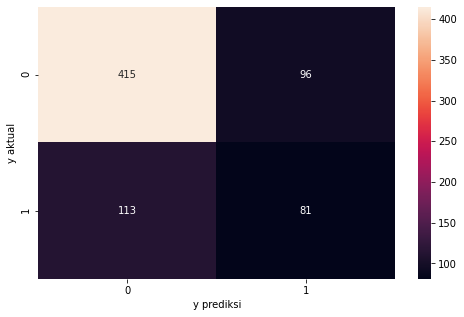

In [932]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT_test,y_predDT),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [933]:
print(classification_report(yDT_test,y_predDT))

precision    recall  f1-score   support

           0       0.79      0.81      0.80       511
           1       0.46      0.42      0.44       194

    accuracy                           0.70       705
   macro avg       0.62      0.61      0.62       705
weighted avg       0.70      0.70      0.70       705



In [934]:
pd.DataFrame(data= [accuracy_score(yDT_test,y_predDT)*100,recall_score(yDT_test,y_predDT)*100,precision_score(yDT_test,y_predDT)*100,roc_auc_score(yDT_test,y_predDT)*100,f1_score(yDT_test,y_predDT)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       70.354610
recall         41.752577
precission     45.762712
roc_auc_score  61.482942
F1 Score       43.665768

### All Feature without Parameter Tuning and without Scalling train 80

In [935]:
xDT1_train, xDT1_test, yDT1_train, yDT1_test = train_test_split(x_DT, y_DT, test_size = 0.2, random_state = 42)

In [936]:
modelDT1 = DecisionTreeClassifier()

modelDT1.fit(xDT1_train,yDT1_train)

DecisionTreeClassifier()

In [937]:
# 10 Folds Cross Validation 
clf_scoreDT80 = cross_val_score(modelDT1, xDT1_train, yDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [938]:
y_predDT1 = modelDT1.predict(xDT1_test)

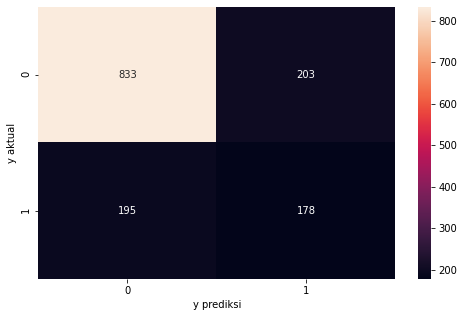

In [939]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT1_test,y_predDT1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [940]:
print(classification_report(yDT1_test,y_predDT1))

precision    recall  f1-score   support

           0       0.81      0.80      0.81      1036
           1       0.47      0.48      0.47       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



In [941]:
pd.DataFrame(data= [accuracy_score(yDT1_test,y_predDT1)*100,recall_score(yDT1_test,y_predDT1)*100,precision_score(yDT1_test,y_predDT1)*100,roc_auc_score(yDT1_test,y_predDT1)*100,f1_score(yDT1_test,y_predDT1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       71.753016
recall         47.721180
precission     46.719160
roc_auc_score  64.063293
F1 Score       47.214854

### All Feature with Parameter Tuning Random Search and without Scalling train 90

In [942]:
modelDTRS = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=2,max_depth=5,criterion="gini")
modelDTRS.fit(xDT_train,yDT_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)

In [943]:
# 10 Folds Cross Validation 
clf_scoreDTRS90 = cross_val_score(modelDTRS, xDT_train, yDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [944]:
y_predDTRS = modelDTRS.predict(xDT_test)

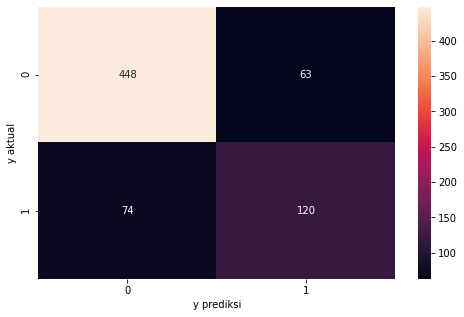

In [945]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT_test,y_predDTRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [946]:
print(classification_report(yDT_test,y_predDTRS))

precision    recall  f1-score   support

           0       0.86      0.88      0.87       511
           1       0.66      0.62      0.64       194

    accuracy                           0.81       705
   macro avg       0.76      0.75      0.75       705
weighted avg       0.80      0.81      0.80       705



In [947]:
pd.DataFrame(data= [accuracy_score(yDT_test,y_predDTRS)*100,recall_score(yDT_test,y_predDTRS)*100,precision_score(yDT_test,y_predDTRS)*100,roc_auc_score(yDT_test,y_predDTRS)*100,f1_score(yDT_test,y_predDTRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.567376
recall         61.855670
precission     65.573770
roc_auc_score  74.763451
F1 Score       63.660477

### All Feature with Parameter Tuning Random Search and without Scalling train 80

In [948]:
modelDTRS1 = DecisionTreeClassifier(min_samples_split=4,min_samples_leaf=5,max_depth=4,criterion="entropy")
modelDTRS1.fit(xDT1_train,yDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       min_samples_split=4)

In [949]:
# 10 Folds Cross Validation 
clf_scoreDTRS80 = cross_val_score(modelDTRS1, xDT1_train, yDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [950]:
y_predDTRS1 = modelDTRS1.predict(xDT1_test)

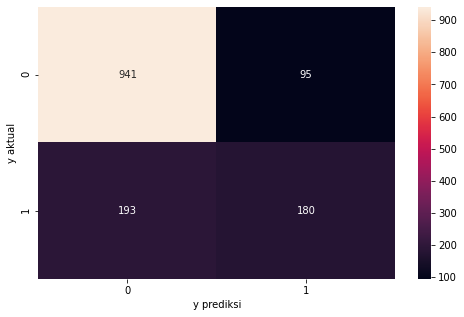

In [951]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT1_test,y_predDTRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [952]:
print(classification_report(yDT1_test,y_predDTRS1))

precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [953]:
pd.DataFrame(data= [accuracy_score(yDT1_test,y_predDTRS1)*100,recall_score(yDT1_test,y_predDTRS1)*100,precision_score(yDT1_test,y_predDTRS1)*100,roc_auc_score(yDT_test,y_predDTRS)*100,f1_score(yDT1_test,y_predDTRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.559972
recall         48.257373
precission     65.454545
roc_auc_score  74.763451
F1 Score       55.555556

### All Feature with Parameter Tuning Grid Search and without Scalling train 90

In [954]:
modelDTGS = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=3,max_depth=5,criterion="entropy")
modelDTGS.fit(xDT_train,yDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

In [955]:
# 10 Folds Cross Validation 
clf_scoreDTGS80 = cross_val_score(modelDTGS, xDT_train, yDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [956]:
y_predDTGS = modelDTGS.predict(xDT_test)

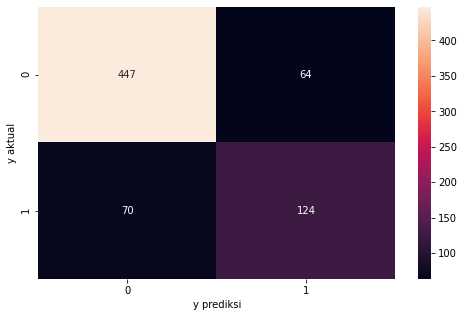

In [957]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT_test,y_predDTGS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [958]:
print(classification_report(yDT_test,y_predDTGS))

precision    recall  f1-score   support

           0       0.86      0.87      0.87       511
           1       0.66      0.64      0.65       194

    accuracy                           0.81       705
   macro avg       0.76      0.76      0.76       705
weighted avg       0.81      0.81      0.81       705



In [959]:
pd.DataFrame(data= [accuracy_score(yDT_test,y_predDTGS)*100,recall_score(yDT_test,y_predDTGS)*100,precision_score(yDT_test,y_predDTGS)*100,roc_auc_score(yDT_test,y_predDTGS)*100,f1_score(yDT_test,y_predDTGS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.992908
recall         63.917526
precission     65.957447
roc_auc_score  75.696532
F1 Score       64.921466

### All Feature with Parameter Tuning Grid Search and without Scalling train 80

In [960]:
modelDTGS1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=4,criterion="entropy")
modelDTGS1.fit(xDT1_train,yDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [961]:
y_predDTGS1 = modelDTGS1.predict(xDT1_test)

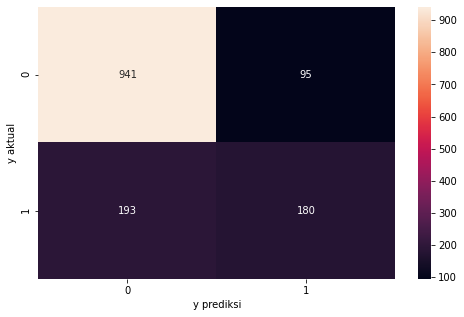

In [962]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yDT1_test,y_predDTGS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [963]:
print(classification_report(yDT1_test,y_predDTGS1))

precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [964]:
pd.DataFrame(data= [accuracy_score(yDT1_test,y_predDTGS1)*100,recall_score(yDT1_test,y_predDTGS1)*100,precision_score(yDT1_test,y_predDTGS1)*100,roc_auc_score(yDT1_test,y_predDTGS1)*100,f1_score(yDT1_test,y_predDTGS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.559972
recall         48.257373
precission     65.454545
roc_auc_score  69.543744
F1 Score       55.555556

### All Feature without Parameter Tuning and with Scalling train 90

In [965]:
x_ScalDT = df2_Scal.drop(["Churn"],axis=1)
y_ScalDT = df2_Scal["Churn"]

In [966]:
xScalDT_train, xScalDT_test, yScalDT_train, yScalDT_test = train_test_split(x_ScalDT, y_ScalDT, test_size = 0.1, random_state = 42)


In [967]:
xScalDT1_train, xScalDT1_test, yScalDT1_train, yScalDT1_test = train_test_split(x_ScalDT, y_ScalDT, test_size = 0.2, random_state = 42)

In [968]:
modelDTScal = DecisionTreeClassifier()
modelDTScal.fit(xScalDT_train,yScalDT_train)

DecisionTreeClassifier()

In [969]:
# 10 Folds Cross Validation 
clf_scoreDTScal = cross_val_score(modelDTScal, xScalDT_train, yScalDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [970]:
y_predScalDT = modelDTScal.predict(xScalDT_test)

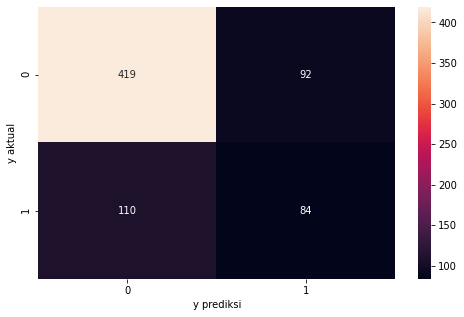

In [971]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT_test,y_predScalDT),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [972]:
print(classification_report(yDT_test,y_predScalDT))

precision    recall  f1-score   support

           0       0.79      0.82      0.81       511
           1       0.48      0.43      0.45       194

    accuracy                           0.71       705
   macro avg       0.63      0.63      0.63       705
weighted avg       0.71      0.71      0.71       705



In [973]:
pd.DataFrame(data= [accuracy_score(yScalDT_test,y_predScalDT)*100,recall_score(yScalDT_test,y_predScalDT)*100,precision_score(yScalDT_test,y_predScalDT)*100,roc_auc_score(yScalDT_test,y_predScalDT)*100,f1_score(yScalDT_test,y_predScalDT)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       71.347518
recall         43.298969
precission     47.727273
roc_auc_score  62.647528
F1 Score       45.405405

### All Feature without Parameter Tuning and with Scalling train 80

In [974]:
modelDTScal1 = DecisionTreeClassifier()
modelDTScal1.fit(xScalDT1_train,yScalDT1_train)

DecisionTreeClassifier()

In [975]:
# 10 Folds Cross Validation 
clf_scoreDTScal1 = cross_val_score(modelDTScal1, xScalDT1_train, yScalDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [976]:
y_predScalDT1 = modelDTScal1.predict(xScalDT1_test)

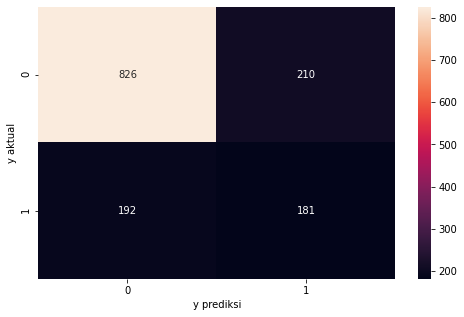

In [977]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT1_test,y_predScalDT1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [978]:
print(classification_report(yDT1_test,y_predScalDT1))

precision    recall  f1-score   support

           0       0.81      0.80      0.80      1036
           1       0.46      0.49      0.47       373

    accuracy                           0.71      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.71      0.72      1409



In [979]:
pd.DataFrame(data= [accuracy_score(yScalDT1_test,y_predScalDT1)*100,recall_score(yScalDT1_test,y_predScalDT1)*100,precision_score(yScalDT1_test,y_predScalDT1)*100,roc_auc_score(yScalDT1_test,y_predScalDT1)*100,f1_score(yScalDT1_test,y_predScalDT1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       71.469127
recall         48.525469
precission     46.291560
roc_auc_score  64.127599
F1 Score       47.382199

### All Feature with Parameter Tuning Random Search and with Scalling train 90

In [980]:
modelDTRSScal = DecisionTreeClassifier(min_samples_split=3,min_samples_leaf=2,max_depth=5,criterion="entropy")
modelDTRSScal.fit(xScalDT_train,yScalDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=3)

In [981]:
# 10 Folds Cross Validation 
clf_scoreDTRSScal = cross_val_score(modelDTRSScal, xScalDT_train, yScalDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [982]:
y_predScalDTRS = modelDTRSScal.predict(xScalDT_test)

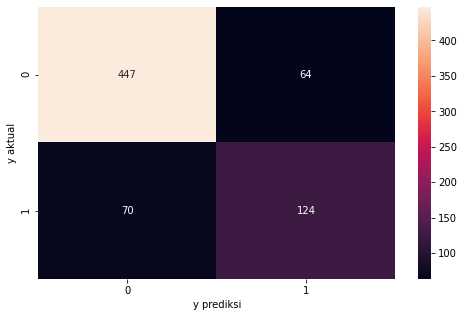

In [983]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT_test,y_predScalDTRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [984]:
print(classification_report(yDT_test,y_predScalDTRS))

precision    recall  f1-score   support

           0       0.86      0.87      0.87       511
           1       0.66      0.64      0.65       194

    accuracy                           0.81       705
   macro avg       0.76      0.76      0.76       705
weighted avg       0.81      0.81      0.81       705



In [985]:
pd.DataFrame(data= [accuracy_score(yScalDT_test,y_predScalDTRS)*100,recall_score(yScalDT_test,y_predScalDTRS)*100,precision_score(yScalDT_test,y_predScalDTRS)*100,roc_auc_score(yScalDT_test,y_predScalDTRS)*100,f1_score(yScalDT_test,y_predScalDTRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.992908
recall         63.917526
precission     65.957447
roc_auc_score  75.696532
F1 Score       64.921466

### All Feature with Parameter Tuning Random Search and with Scalling train 80

In [986]:
modelDTRSScal1 = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=2,max_depth=5,criterion="entropy")
modelDTRSScal1.fit(xScalDT1_train,yScalDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=5)

In [987]:
# 10 Folds Cross Validation 
clf_scoreDTRSScal1 = cross_val_score(modelDTRSScal1, xScalDT1_train, yScalDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [988]:
y_predScalDTRS1 = modelDTRSScal1.predict(xScalDT1_test)

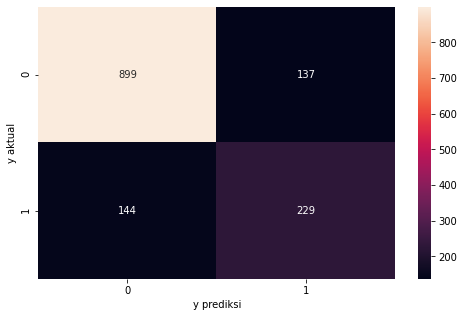

In [989]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT1_test,y_predScalDTRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [990]:
print(classification_report(yDT1_test,y_predScalDTRS1))

precision    recall  f1-score   support

           0       0.86      0.87      0.86      1036
           1       0.63      0.61      0.62       373

    accuracy                           0.80      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409



In [991]:
pd.DataFrame(data= [accuracy_score(yScalDT1_test,y_predScalDTRS1)*100,recall_score(yScalDT1_test,y_predScalDTRS1)*100,precision_score(yScalDT1_test,y_predScalDTRS1)*100,roc_auc_score(yScalDT1_test,y_predScalDTRS1)*100,f1_score(yScalDT1_test,y_predScalDTRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.056778
recall         61.394102
precission     62.568306
roc_auc_score  74.085082
F1 Score       61.975643

### All Feature with Parameter Tuning Grid Search and with Scalling train 90

In [992]:
modelDTGSScal = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=3,max_depth=5,criterion="entropy")
modelDTGSScal.fit(xScalDT_train,yScalDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

In [993]:
# 10 Folds Cross Validation 
clf_scoreDTGSScal = cross_val_score(modelDTGSScal, xScalDT_train, yScalDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [994]:
y_predScalDTGS = modelDTGSScal.predict(xScalDT_test)

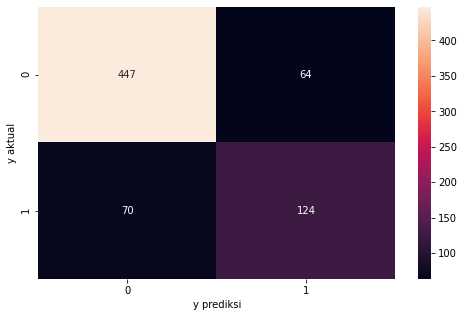

In [995]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT_test,y_predScalDTGS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [996]:
print(classification_report(yDT_test,y_predScalDTGS))

precision    recall  f1-score   support

           0       0.86      0.87      0.87       511
           1       0.66      0.64      0.65       194

    accuracy                           0.81       705
   macro avg       0.76      0.76      0.76       705
weighted avg       0.81      0.81      0.81       705



In [997]:
pd.DataFrame(data= [accuracy_score(yScalDT_test,y_predScalDTGS)*100,recall_score(yScalDT_test,y_predScalDTGS)*100,precision_score(yScalDT_test,y_predScalDTGS)*100,roc_auc_score(yScalDT_test,y_predScalDTGS)*100,f1_score(yScalDT_test,y_predScalDTGS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.992908
recall         63.917526
precission     65.957447
roc_auc_score  75.696532
F1 Score       64.921466

### All Feature with Parameter Tuning Grid Search and with Scalling train 80

In [998]:
modelDTGSScal1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=4,criterion="entropy")
modelDTGSScal1.fit(xScalDT1_train,yScalDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [999]:
# 10 Folds Cross Validation 
clf_scoreDTGSScal1 = cross_val_score(modelDTGSScal1, xScalDT1_train, yScalDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1000]:
y_predScalDTGS1 = modelDTGSScal1.predict(xScalDT1_test)

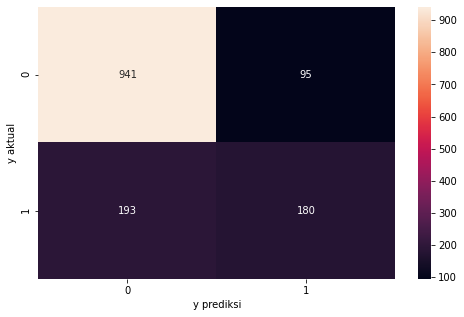

In [1001]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalDT1_test,y_predScalDTGS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1002]:
print(classification_report(yDT1_test,y_predScalDTGS1))

precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.80      0.78      1409



In [1003]:
pd.DataFrame(data= [accuracy_score(yScalDT1_test,y_predScalDTGS1)*100,recall_score(yScalDT1_test,y_predScalDTGS1)*100,precision_score(yScalDT1_test,y_predScalDTGS1)*100,roc_auc_score(yScalDT1_test,y_predScalDTGS1)*100,f1_score(yScalDT1_test,y_predScalDTGS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.559972
recall         48.257373
precission     65.454545
roc_auc_score  69.543744
F1 Score       55.555556

## Decision Tree With Feature Selection

In [1004]:
x_selDT = df2[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
y_selDT  = df2["Churn"]

In [1005]:
xselDT_train, xselDT_test, yselDT_train, yselDT_test = train_test_split(x_selDT, y_selDT, test_size = 0.1, random_state = 42)


In [1006]:
xselDT1_train, xselDT1_test, yselDT1_train, yselDT1_test = train_test_split(x_selDT, y_selDT, test_size = 0.1, random_state = 42)


### Feature Selection without Parameter Tuning Search and without Scalling train 90

In [1007]:
modelselDT = DecisionTreeClassifier()
modelselDT.fit(xselDT_train,yselDT_train)

DecisionTreeClassifier()

In [1008]:
# 10 Folds Cross Validation 
clf_scoreDTsel = cross_val_score(modelselDT, xselDT_train, yselDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1009]:
y_predselDT = modelselDT.predict(xselDT_test)

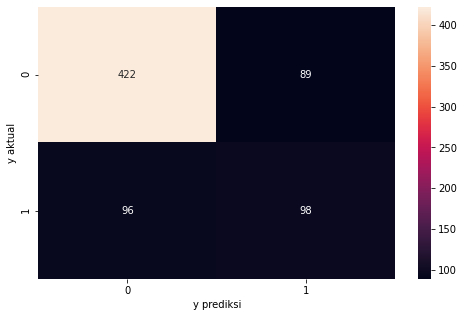

In [1010]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT_test,y_predselDT),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1011]:
print(classification_report(yselDT_test,y_predselDT))

precision    recall  f1-score   support

           0       0.81      0.83      0.82       511
           1       0.52      0.51      0.51       194

    accuracy                           0.74       705
   macro avg       0.67      0.67      0.67       705
weighted avg       0.73      0.74      0.74       705



In [1012]:
pd.DataFrame(data= [accuracy_score(yselDT_test,y_predselDT)*100,recall_score(yselDT_test,y_predselDT)*100,precision_score(yselDT_test,y_predselDT)*100,roc_auc_score(yselDT_test,y_predselDT)*100,f1_score(yselDT_test,y_predselDT)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       73.758865
recall         50.515464
precission     52.406417
roc_auc_score  66.549317
F1 Score       51.443570

### Feature Selection without Parameter Tuning and without Scalling train 80

In [1013]:
modelselDT1 = DecisionTreeClassifier()
modelselDT1.fit(xselDT1_train,yselDT1_train)

DecisionTreeClassifier()

In [1014]:
# 10 Folds Cross Validation 
clf_scoreDTsel80 = cross_val_score(modelselDT1, xselDT1_train, yselDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1015]:
y_predselDT1 = modelselDT1.predict(xselDT1_test)

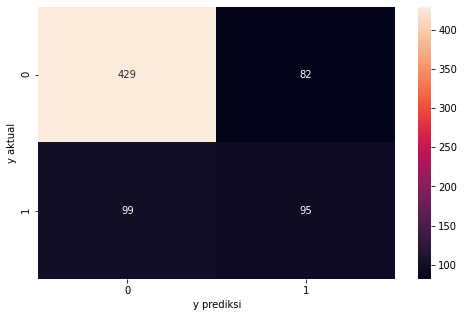

In [1016]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT1_test,y_predselDT1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1017]:
print(classification_report(yselDT1_test,y_predselDT1))

precision    recall  f1-score   support

           0       0.81      0.84      0.83       511
           1       0.54      0.49      0.51       194

    accuracy                           0.74       705
   macro avg       0.67      0.66      0.67       705
weighted avg       0.74      0.74      0.74       705



In [1018]:
pd.DataFrame(data= [accuracy_score(yselDT1_test,y_predselDT1)*100,recall_score(yselDT1_test,y_predselDT1)*100,precision_score(yselDT1_test,y_predselDT1)*100,roc_auc_score(yselDT1_test,y_predselDT1)*100,f1_score(yselDT1_test,y_predselDT1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       74.326241
recall         48.969072
precission     53.672316
roc_auc_score  66.461053
F1 Score       51.212938

### Feature Selection with Parameter Tuning Random Search and without Scalling train 90

In [1019]:
modelselDTRS = DecisionTreeClassifier(min_samples_split=5,min_samples_leaf=3,max_depth=5,criterion="entropy")
modelselDTRS.fit(xselDT_train,yselDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=5)

In [1020]:
# 10 Folds Cross Validation 
clf_scoreDTRSsel = cross_val_score(modelselDTRS, xselDT_train, yselDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1021]:
y_predselDTRS = modelselDTRS.predict(xselDT_test)

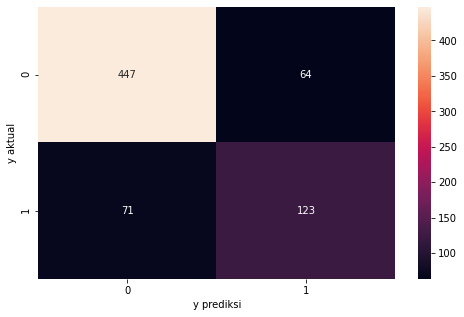

In [1022]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT_test,y_predselDTRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1023]:
print(classification_report(yselDT_test,y_predselDTRS))

precision    recall  f1-score   support

           0       0.86      0.87      0.87       511
           1       0.66      0.63      0.65       194

    accuracy                           0.81       705
   macro avg       0.76      0.75      0.76       705
weighted avg       0.81      0.81      0.81       705



In [1024]:
pd.DataFrame(data= [accuracy_score(yselDT_test,y_predselDTRS)*100,recall_score(yselDT_test,y_predselDTRS)*100,precision_score(yselDT_test,y_predselDTRS)*100,roc_auc_score(yselDT_test,y_predselDTRS)*100,f1_score(yselDT_test,y_predselDTRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.851064
recall         63.402062
precission     65.775401
roc_auc_score  75.438800
F1 Score       64.566929

### Feature Selection with Parameter Tuning Random Search and without Scalling train 80

In [1025]:
modelselDTRS1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=4,max_depth=4,criterion="entropy")
modelselDTRS1.fit(xselDT1_train,yselDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4)

In [1026]:
# 10 Folds Cross Validation 
clf_scoreDTRSsel80 = cross_val_score(modelselDTRS1, xselDT1_train, yselDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1027]:
y_predselDTRS1 = modelselDTRS1.predict(xselDT1_test)

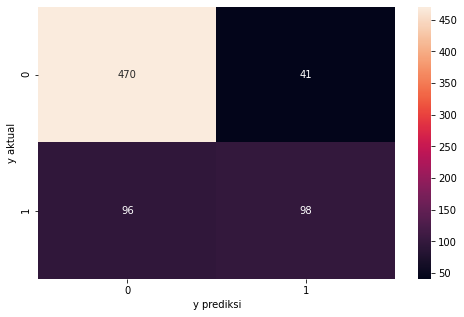

In [1028]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT1_test,y_predselDTRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1029]:
print(classification_report(yselDT1_test,y_predselDTRS1))

precision    recall  f1-score   support

           0       0.83      0.92      0.87       511
           1       0.71      0.51      0.59       194

    accuracy                           0.81       705
   macro avg       0.77      0.71      0.73       705
weighted avg       0.80      0.81      0.79       705



In [1030]:
pd.DataFrame(data= [accuracy_score(yselDT1_test,y_predselDTRS1)*100,recall_score(yselDT1_test,y_predselDTRS1)*100,precision_score(yselDT1_test,y_predselDTRS1)*100,roc_auc_score(yselDT1_test,y_predselDTRS1)*100,f1_score(yselDT1_test,y_predselDTRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.567376
recall         50.515464
precission     70.503597
roc_auc_score  71.245990
F1 Score       58.858859

### Feature Selection without Parameter Tuning but with Scalling train 90

In [1031]:
modelselDTGS = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=3,max_depth=5,criterion="entropy")
modelselDTGS.fit(xselDT_train,yselDT_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3)

In [1032]:
# 10 Folds Cross Validation 
clf_scoreDTGSsel = cross_val_score(modelselDTGS, xselDT_train, yselDT_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1033]:
y_predselDTGS = modelselDTGS.predict(xselDT_test)

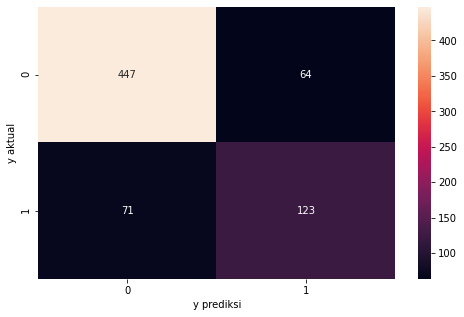

In [1034]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT_test,y_predselDTGS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1035]:
print(classification_report(yselDT_test,y_predselDTGS))

precision    recall  f1-score   support

           0       0.86      0.87      0.87       511
           1       0.66      0.63      0.65       194

    accuracy                           0.81       705
   macro avg       0.76      0.75      0.76       705
weighted avg       0.81      0.81      0.81       705



In [1036]:
pd.DataFrame(data= [accuracy_score(yselDT_test,y_predselDTGS)*100,recall_score(yselDT_test,y_predselDTGS)*100,precision_score(yselDT_test,y_predselDTGS)*100,roc_auc_score(yselDT_test,y_predselDTGS)*100,f1_score(yselDT_test,y_predselDTGS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.851064
recall         63.402062
precission     65.775401
roc_auc_score  75.438800
F1 Score       64.566929

In [1037]:
modelselDTGS1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=5,max_depth=5,criterion="entropy")
modelselDTGS1.fit(xselDT1_train,yselDT1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

In [1038]:
# 10 Folds Cross Validation 
clf_scoreDTGSsel80 = cross_val_score(modelselDTGS1, xselDT1_train, yselDT1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1039]:
y_predselDTGS1 = modelselDTGS1.predict(xselDT1_test)

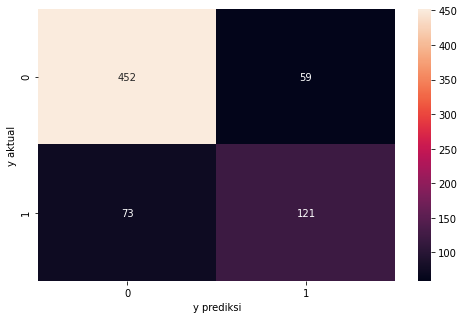

In [1040]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDT1_test,y_predselDTGS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1041]:
print(classification_report(yselDT1_test,y_predselDTGS1))

precision    recall  f1-score   support

           0       0.86      0.88      0.87       511
           1       0.67      0.62      0.65       194

    accuracy                           0.81       705
   macro avg       0.77      0.75      0.76       705
weighted avg       0.81      0.81      0.81       705



In [1042]:
pd.DataFrame(data= [accuracy_score(yselDT_test,y_predselDTGS)*100,recall_score(yselDT_test,y_predselDTGS)*100,precision_score(yselDT_test,y_predselDTGS)*100,roc_auc_score(yselDT_test,y_predselDTGS)*100,f1_score(yselDT_test,y_predselDTGS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.851064
recall         63.402062
precission     65.775401
roc_auc_score  75.438800
F1 Score       64.566929

In [1043]:
x_selDTScal = df2_Scal[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
y_selDTScal  = df2_Scal["Churn"]

In [1044]:
xselDTscal_train, xselDTscal_test, yselDTscal_train, yselDTscal_test = train_test_split(x_selDTScal, y_selDTScal, test_size = 0.1, random_state = 42)

In [1045]:
xselDTscal1_train, xselDTscal1_test, yselDTscal1_train, yselDTscal1_test = train_test_split(x_selDTScal, y_selDTScal, test_size = 0.2, random_state = 42)

In [1046]:
modelselDTscal = DecisionTreeClassifier()
modelselDTscal.fit(xselDTscal_train,yselDTscal_train)

DecisionTreeClassifier()

In [1047]:
# 10 Folds Cross Validation 
clf_scoreDTselscal = cross_val_score(modelselDTscal, xselDTscal_train, yselDTscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1048]:
y_predselDTscal = modelselDTscal.predict(xselDTscal_test)

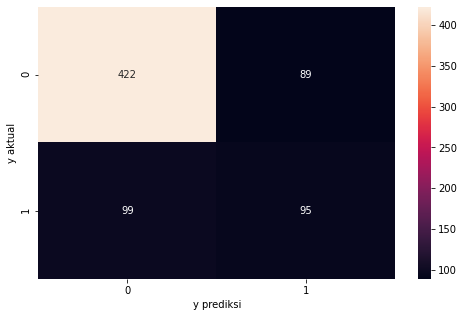

In [1049]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal_test,y_predselDTscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1050]:
print(classification_report(yselDTscal_test,y_predselDTscal))

precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       511
         1.0       0.52      0.49      0.50       194

    accuracy                           0.73       705
   macro avg       0.66      0.66      0.66       705
weighted avg       0.73      0.73      0.73       705



In [1051]:
pd.DataFrame(data= [accuracy_score(yselDTscal_test,y_predselDTscal)*100,recall_score(yselDTscal_test,y_predselDTscal)*100,precision_score(yselDTscal_test,y_predselDTscal)*100,roc_auc_score(yselDTscal_test,y_predselDTscal)*100,f1_score(yselDTscal_test,y_predselDTscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       73.333333
recall         48.969072
precission     51.630435
roc_auc_score  65.776121
F1 Score       50.264550

### Feature Selection without Parameter Tuning but with Scalling train 80

In [1052]:
modelselDTscal1 = DecisionTreeClassifier()
modelselDTscal1.fit(xselDTscal1_train,yselDTscal1_train)

DecisionTreeClassifier()

In [1053]:
# 10 Folds Cross Validation 
clf_scoreDTselscal80 = cross_val_score(modelselDTscal1, xselDTscal1_train, yselDTscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1054]:
y_predselDTscal1 = modelselDTscal1.predict(xselDTscal1_test)

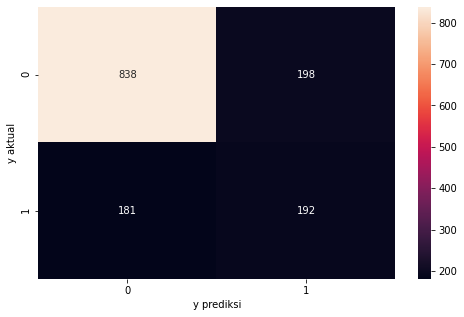

In [1055]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal1_test,y_predselDTscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1056]:
print(classification_report(yselDTscal1_test,y_predselDTscal1))

precision    recall  f1-score   support

         0.0       0.82      0.81      0.82      1036
         1.0       0.49      0.51      0.50       373

    accuracy                           0.73      1409
   macro avg       0.66      0.66      0.66      1409
weighted avg       0.73      0.73      0.73      1409



In [1057]:
pd.DataFrame(data= [accuracy_score(yselDTscal1_test,y_predselDTscal1)*100,recall_score(yselDTscal1_test,y_predselDTscal1)*100,precision_score(yselDTscal1_test,y_predselDTscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTscal1)*100,f1_score(yselDTscal1_test,y_predselDTscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       73.101490
recall         51.474531
precission     49.230769
roc_auc_score  66.181281
F1 Score       50.327654

### Feature Selection with Parameter Tuning Random Search but with Scalling train 90

In [1058]:
modelselDTRSscal = DecisionTreeClassifier(min_samples_split=3,min_samples_leaf=4,max_depth=5,criterion="entropy")
modelselDTRSscal.fit(xselDTscal_train,yselDTscal_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=3)

In [1059]:
# 10 Folds Cross Validation 
clf_scoreDTRSselscal = cross_val_score(modelselDTRSscal, xselDTscal_train, yselDTscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1060]:
y_predselDTRSscal = modelselDTRSscal.predict(xselDTscal_test)

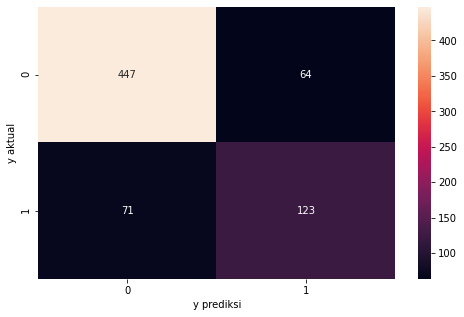

In [1061]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal_test,y_predselDTRSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1062]:
print(classification_report(yselDTscal_test,y_predselDTRSscal))

precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       511
         1.0       0.66      0.63      0.65       194

    accuracy                           0.81       705
   macro avg       0.76      0.75      0.76       705
weighted avg       0.81      0.81      0.81       705



In [1063]:
pd.DataFrame(data= [accuracy_score(yselDTscal_test,y_predselDTRSscal)*100,recall_score(yselDTscal_test,y_predselDTRSscal)*100,precision_score(yselDTscal_test,y_predselDTRSscal)*100,roc_auc_score(yselDTscal_test,y_predselDTRSscal)*100,f1_score(yselDTscal_test,y_predselDTRSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.851064
recall         63.402062
precission     65.775401
roc_auc_score  75.438800
F1 Score       64.566929

### Feature Selection with Parameter Tuning Random Search but with Scalling train 80

In [1064]:
modelselDTRSscal1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=1,max_depth=5,criterion="entropy")
modelselDTRSscal1.fit(xselDTscal_train,yselDTscal_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [1065]:
# 10 Folds Cross Validation 
clf_scoreDTRSselscal1 = cross_val_score(modelselDTRSscal1, xselDTscal1_train, yselDTscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1066]:
y_predselDTRSscal1 = modelselDTRSscal1.predict(xselDTscal1_test)

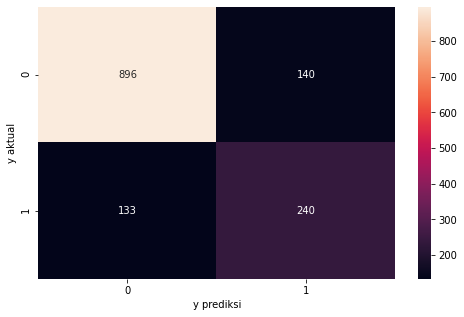

In [1067]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal1_test,y_predselDTRSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1068]:
BestDT = pd.DataFrame(classification_report(yselDTscal1_test,y_predselDTRSscal1, target_names= labels, output_dict=True)).T

In [1069]:
print(classification_report(yselDTscal1_test,y_predselDTRSscal1))

precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1036
         1.0       0.63      0.64      0.64       373

    accuracy                           0.81      1409
   macro avg       0.75      0.75      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [1070]:
pd.DataFrame(data= [accuracy_score(yselDTscal1_test,y_predselDTRSscal1)*100,recall_score(yselDTscal1_test,y_predselDTRSscal1)*100,precision_score(yselDTscal1_test,y_predselDTRSscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTRSscal1)*100,f1_score(yselDTscal1_test,y_predselDTRSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.624556
recall         64.343164
precission     63.157895
roc_auc_score  75.414825
F1 Score       63.745020

### Feature Selection with Parameter Tuning Grid Search but with Scalling train 90

In [1071]:
modelselDTGSscal = DecisionTreeClassifier(min_samples_split=3,min_samples_leaf=3,max_depth=5,criterion="entropy")
modelselDTGSscal.fit(xselDTscal_train,yselDTscal_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       min_samples_split=3)

In [1072]:
# 10 Folds Cross Validation 
clf_scoreDTGSselscal = cross_val_score(modelselDTGSscal, xselDTscal_train, yselDTscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1073]:
y_predselDTGSscal = modelselDTGSscal.predict(xselDTscal_test)

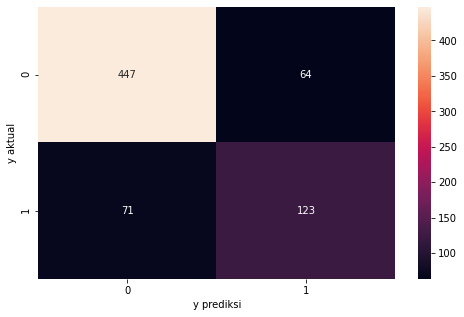

In [1074]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal_test,y_predselDTGSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1075]:
print(classification_report(yselDTscal_test,y_predselDTGSscal))

precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       511
         1.0       0.66      0.63      0.65       194

    accuracy                           0.81       705
   macro avg       0.76      0.75      0.76       705
weighted avg       0.81      0.81      0.81       705



In [1076]:
pd.DataFrame(data= [accuracy_score(yselDTscal_test,y_predselDTGSscal)*100,recall_score(yselDTscal_test,y_predselDTGSscal)*100,precision_score(yselDTscal_test,y_predselDTGSscal)*100,roc_auc_score(yselDTscal_test,y_predselDTGSscal)*100,f1_score(yselDTscal_test,y_predselDTGSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.851064
recall         63.402062
precission     65.775401
roc_auc_score  75.438800
F1 Score       64.566929

### Feature Selection with Parameter Tuning Grid Search but with Scalling train 80

In [1077]:
modelselDTGSscal1 = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf=5,max_depth=5,criterion="entropy")
modelselDTGSscal1.fit(xselDTscal1_train,yselDTscal1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)

In [1078]:
# 10 Folds Cross Validation 
clf_scoreDTGSselscal80 = cross_val_score(modelselDTGSscal1, xselDTscal1_train, yselDTscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1079]:
y_predselDTGSscal1 = modelselDTGSscal1.predict(xselDTscal1_test)

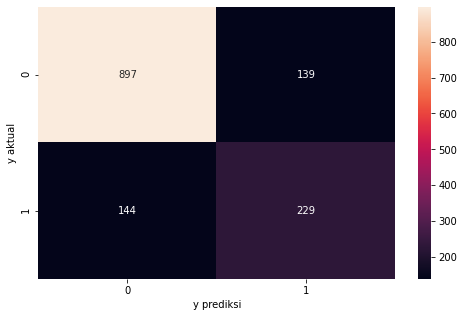

In [1080]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselDTscal1_test,y_predselDTGSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1081]:
print(classification_report(yselDTscal1_test,y_predselDTGSscal1))

precision    recall  f1-score   support

         0.0       0.86      0.87      0.86      1036
         1.0       0.62      0.61      0.62       373

    accuracy                           0.80      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409



In [1082]:
pd.DataFrame(data= [accuracy_score(yselDTscal1_test,y_predselDTGSscal1)*100,recall_score(yselDTscal1_test,y_predselDTGSscal1)*100,precision_score(yselDTscal1_test,y_predselDTGSscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTGSscal1)*100,f1_score(yselDTscal1_test,y_predselDTGSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.914833
recall         61.394102
precission     62.228261
roc_auc_score  73.988557
F1 Score       61.808367

In [1083]:
Logreg_Summary = pd.DataFrame({"Decision Tree": ["accuracy","recall","precision","roc_auc_score","f1_score"],
                                "All Feature without Parameter Tuning and without Scalling train 90":[accuracy_score(yDT_test,y_predDT)*100,recall_score(yDT_test,y_predDT)*100,precision_score(yDT_test,y_predDT)*100,roc_auc_score(yDT_test,y_predDT)*100,f1_score(yDT_test,y_predDT)*100],
                                "All Feature without Parameter Tuning and without Scalling train 80":[accuracy_score(yDT1_test,y_predDT1)*100,recall_score(yDT1_test,y_predDT1)*100,precision_score(yDT1_test,y_predDT1)*100,roc_auc_score(yDT1_test,y_predDT1)*100,f1_score(yDT1_test,y_predDT1)*100],
                                "All Feature with Parameter Tuning Random and without Scalling train 90":[accuracy_score(yDT_test,y_predDTRS)*100,recall_score(yDT_test,y_predDTRS)*100,precision_score(yDT_test,y_predDTRS)*100,roc_auc_score(yDT_test,y_predDTRS)*100,f1_score(yDT_test,y_predDTRS)*100],
                                "All Feature with Parameter Tuning Random and without Scalling train 80":[accuracy_score(yDT1_test,y_predDTRS1)*100,recall_score(yDT1_test,y_predDTRS1)*100,precision_score(yDT1_test,y_predDTRS1)*100,roc_auc_score(yDT_test,y_predDTRS)*100,f1_score(yDT1_test,y_predDTRS1)*100],
                                "All Feature with Parameter Tuning Grid and without Scalling train 90":[accuracy_score(yDT_test,y_predDTGS)*100,recall_score(yDT_test,y_predDTGS)*100,precision_score(yDT_test,y_predDTGS)*100,roc_auc_score(yDT_test,y_predDTGS)*100,f1_score(yDT_test,y_predDTGS)*100],
                                "All Feature with Parameter Tuning Grid and without Scalling train 80":[accuracy_score(yDT1_test,y_predDTGS1)*100,recall_score(yDT1_test,y_predDTGS1)*100,precision_score(yDT1_test,y_predDTGS1)*100,roc_auc_score(yDT1_test,y_predDTGS1)*100,f1_score(yDT1_test,y_predDTGS1)*100],
                               "All Feature without Parameter Tuning but with Scalling train 90":[accuracy_score(yScalDT_test,y_predScalDT)*100,recall_score(yScalDT_test,y_predScalDT)*100,precision_score(yScalDT_test,y_predScalDT)*100,roc_auc_score(yScalDT_test,y_predScalDT)*100,f1_score(yScalDT_test,y_predScalDT)*100],
                                "All Feature without Parameter Tuning but with Scalling train 80":[accuracy_score(yScalDT1_test,y_predScalDT1)*100,recall_score(yScalDT1_test,y_predScalDT1)*100,precision_score(yScalDT1_test,y_predScalDT1)*100,roc_auc_score(yScalDT1_test,y_predScalDT1)*100,f1_score(yScalDT1_test,y_predScalDT1)*100],
                                "All Feature with Parameter Tuning Random Search and with Scalling train 90":[accuracy_score(yScalDT_test,y_predScalDTRS)*100,recall_score(yScalDT_test,y_predScalDTRS)*100,precision_score(yScalDT_test,y_predScalDTRS)*100,roc_auc_score(yScalDT_test,y_predScalDTRS)*100,f1_score(yScalDT_test,y_predScalDTRS)*100],
                                "All Feature with Parameter Tuning Random Search and with Scalling train 80":[accuracy_score(yScalDT1_test,y_predScalDTRS1)*100,recall_score(yScalDT1_test,y_predScalDTRS1)*100,precision_score(yScalDT1_test,y_predScalDTRS1)*100,roc_auc_score(yScalDT1_test,y_predScalDTRS1)*100,f1_score(yScalDT1_test,y_predScalDTRS1)*100],
                                "All Feature with Parameter Tuning Grid Search and with Scalling train 90":[accuracy_score(yScalDT_test,y_predScalDTGS)*100,recall_score(yScalDT_test,y_predScalDTGS)*100,precision_score(yScalDT_test,y_predScalDTGS)*100,roc_auc_score(yScalDT_test,y_predScalDTGS)*100,f1_score(yScalDT_test,y_predScalDTGS)*100],
                                "All Feature with Parameter Tuning Grid Search and with Scalling train 80":[accuracy_score(yScalDT1_test,y_predScalDTGS1)*100,recall_score(yScalDT1_test,y_predScalDTGS1)*100,precision_score(yScalDT1_test,y_predScalDTGS1)*100,roc_auc_score(yScalDT1_test,y_predScalDTGS1)*100,f1_score(yScalDT1_test,y_predScalDTGS1)*100],
                                "Feature Selection without Parameter Tuning and without Scalling train 90":[accuracy_score(yselDT_test,y_predselDT)*100,recall_score(yselDT_test,y_predselDT)*100,precision_score(yselDT_test,y_predselDT)*100,roc_auc_score(yselDT_test,y_predselDT)*100,f1_score(yselDT_test,y_predselDT)*100],
                                "Feature Selection without Parameter Tuning and without Scalling train 80":[accuracy_score(yselDT1_test,y_predselDT1)*100,recall_score(yselDT1_test,y_predselDT1)*100,precision_score(yselDT1_test,y_predselDT1)*100,roc_auc_score(yselDT1_test,y_predselDT1)*100,f1_score(yselDT1_test,y_predselDT1)*100],
                                "Feature Selection with Parameter Tuning and without Scalling train 90":[accuracy_score(yselDT_test,y_predselDTRS)*100,recall_score(yselDT_test,y_predselDTRS)*100,precision_score(yselDT_test,y_predselDTRS)*100,roc_auc_score(yselDT_test,y_predselDTRS)*100,f1_score(yselDT_test,y_predselDTRS)*100],
                                "Feature Selection with Parameter Tuning and without Scalling train 80":[accuracy_score(yselDT1_test,y_predselDTRS1)*100,recall_score(yselDT1_test,y_predselDTRS1)*100,precision_score(yselDT1_test,y_predselDTRS1)*100,roc_auc_score(yselDT1_test,y_predselDTRS1)*100,f1_score(yselDT1_test,y_predselDTRS1)*100],
                                "Feature Selection without Parameter Tuning but with Scalling train 90":[accuracy_score(yselDTscal_test,y_predselDTscal)*100,recall_score(yselDTscal_test,y_predselDTscal)*100,precision_score(yselDTscal_test,y_predselDTscal)*100,roc_auc_score(yselDTscal_test,y_predselDTscal)*100,f1_score(yselDTscal_test,y_predselDTscal)*100],
                                "Feature Selection without Parameter Tuning but with Scalling train 80":[accuracy_score(yselDTscal1_test,y_predselDTscal1)*100,recall_score(yselDTscal1_test,y_predselDTscal1)*100,precision_score(yselDTscal1_test,y_predselDTscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTscal1)*100,f1_score(yselDTscal1_test,y_predselDTscal1)*100],
                                "Feature Selection with Parameter Tuning Random Seacrh and with Scalling train 90":[accuracy_score(yselDTscal_test,y_predselDTRSscal)*100,recall_score(yselDTscal_test,y_predselDTRSscal)*100,precision_score(yselDTscal_test,y_predselDTRSscal)*100,roc_auc_score(yselDTscal_test,y_predselDTRSscal)*100,f1_score(yselDTscal_test,y_predselDTRSscal)*100],
                                "Feature Selection with Parameter Tuning Random Search and with Scalling train 80": [accuracy_score(yselDTscal1_test,y_predselDTRSscal1)*100,recall_score(yselDTscal1_test,y_predselDTRSscal1)*100,precision_score(yselDTscal1_test,y_predselDTRSscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTRSscal1)*100,f1_score(yselDTscal1_test,y_predselDTRSscal1)*100],
                                "Feature Selection with Parameter Tuning Grid Search and with Scalling train 90":[accuracy_score(yselDTscal_test,y_predselDTGSscal)*100,recall_score(yselDTscal_test,y_predselDTGSscal)*100,precision_score(yselDTscal_test,y_predselDTGSscal)*100,roc_auc_score(yselDTscal_test,y_predselDTGSscal)*100,f1_score(yselDTscal_test,y_predselDTGSscal)*100],
                                "Feature Selection with Parameter Tuning Grid Search and with Scalling train 80":[accuracy_score(yselDTscal1_test,y_predselDTGSscal1)*100,recall_score(yselDTscal1_test,y_predselDTGSscal1)*100,precision_score(yselDTscal1_test,y_predselDTGSscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTGSscal1)*100,f1_score(yselDTscal1_test,y_predselDTGSscal1)*100]

})
b = Logreg_Summary.set_index("Decision Tree").T
b   

Decision Tree                                        accuracy     recall  \
All Feature without Parameter Tuning and withou...  70.354610  41.752577   
All Feature without Parameter Tuning and withou...  71.753016  47.721180   
All Feature with Parameter Tuning Random and wi...  80.567376  61.855670   
All Feature with Parameter Tuning Random and wi...  79.559972  48.257373   
All Feature with Parameter Tuning Grid and with...  80.992908  63.917526   
All Feature with Parameter Tuning Grid and with...  79.559972  48.257373   
All Feature without Parameter Tuning but with S...  71.347518  43.298969   
All Feature without Parameter Tuning but with S...  71.469127  48.525469   
All Feature with Parameter Tuning Random Search...  80.992908  63.917526   
All Feature with Parameter Tuning Random Search...  80.056778  61.394102   
All Feature with Parameter Tuning Grid Search a...  80.992908  63.917526   
All Feature with Parameter Tuning Grid Search a...  79.559972  48.257373   
Feature Selection without Parameter Tuning and ...  73.758865  50.515464   
Feature Selection without Parameter Tuning and ...  74.326241  48.969072   
Feature Selection with Parameter Tuning and wit...  80.851064  63.402062   
Feature Selection with Parameter Tuning and wit...  80.567376  50.515464   
Feature Selection without Parameter Tuning but ...  73.333333  48.969072   
Feature Selection without Parameter Tuning but ...  73.101490  51.474531   
Feature Selection with Parameter Tuning Random ...  80.851064  63.402062   
Feature Selection with Parameter Tuning Random ...  80.624556  64.343164   
Feature Selection with Parameter Tuning Grid Se...  80.851064  63.402062   
Feature Selection with Parameter Tuning Grid Se...  79.914833  61.394102   

Decision Tree                                       precision  roc_auc_score  \
All Feature without Parameter Tuning and withou...  45.762712      61.482942   
All Feature without Parameter Tuning and withou...  46.719160      64.063293   
All Feature with Parameter Tuning Random and wi...  65.573770      74.763451   
All Feature with Parameter Tuning Random and wi...  65.454545      74.763451   
All Feature with Parameter Tuning Grid and with...  65.957447      75.696532   
All Feature with Parameter Tuning Grid and with...  65.454545      69.543744   
All Feature without Parameter Tuning but with S...  47.727273      62.647528   
All Feature without Parameter Tuning but with S...  46.291560      64.127599   
All Feature with Parameter Tuning Random Search...  65.957447      75.696532   
All Feature with Parameter Tuning Random Search...  62.568306      74.085082   
All Feature with Parameter Tuning Grid Search a...  65.957447      75.696532   
All Feature with Parameter Tuning Grid Search a...  65.454545      69.543744   
Feature Selection without Parameter Tuning and ...  52.406417      66.549317   
Feature Selection without Parameter Tuning and ...  53.672316      66.461053   
Feature Selection with Parameter Tuning and wit...  65.775401      75.438800   
Feature Selection with Parameter Tuning and wit...  70.503597      71.245990   
Feature Selection without Parameter Tuning but ...  51.630435      65.776121   
Feature Selection without Parameter Tuning but ...  49.230769      66.181281   
Feature Selection with Parameter Tuning Random ...  65.775401      75.438800   
Feature Selection with Parameter Tuning Random ...  63.157895      75.414825   
Feature Selection with Parameter Tuning Grid Se...  65.775401      75.438800   
Feature Selection with Parameter Tuning Grid Se...  62.228261      73.988557   

Decision Tree                                        f1_score  
All Feature without Parameter Tuning and withou...  43.665768  
All Feature without Parameter Tuning and withou...  47.214854  
All Feature with Parameter Tuning Random and wi...  63.660477  
All Feature with Parameter Tuning Random and wi...  55.555556  
All Feature with Parameter Tuning Grid and with...  64.921466  
All Feature with Parameter

## The Best Condition Model Test Decision Tree : Feature Selection with Parameter Tuning Random Search and with Scalling train 80

In [1482]:
DT_Summary = pd.DataFrame({"Decision Tree": ["accuracy","recall","precision","roc_auc_score","f1_score"],"Feature Selection with Parameter Tuning Random Search and with Scalling train 80": [accuracy_score(yselDTscal1_test,y_predselDTRSscal1)*100,recall_score(yselDTscal1_test,y_predselDTRSscal1)*100,precision_score(yselDTscal1_test,y_predselDTRSscal1)*100,roc_auc_score(yselDTscal1_test,y_predselDTRSscal1)*100,f1_score(yselDTscal1_test,y_predselDTRSscal1)*100]})
DT_Summary.set_index("Decision Tree").T

Decision Tree                                        accuracy     recall  \
Feature Selection with Parameter Tuning Random ...  80.624556  64.343164   

Decision Tree                                       precision  roc_auc_score  \
Feature Selection with Parameter Tuning Random ...  63.157895      75.414825   

Decision Tree                                       f1_score  
Feature Selection with Parameter Tuning Random ...  63.74502

In [1085]:
BestDT

precision    recall  f1-score      support
Not Churned    0.870748  0.864865  0.867797  1036.000000
Churned        0.631579  0.643432  0.637450   373.000000
accuracy       0.806246  0.806246  0.806246     0.806246
macro avg      0.751164  0.754148  0.752623  1409.000000
weighted avg   0.807434  0.806246  0.806818  1409.000000

# RANDOM FOREST

In [1086]:
df_RF = df2.copy()

In [1087]:
x_RF = df_RF.drop(["Churn"],axis=1)
y_RF = df_RF["Churn"]

In [1088]:
xRF_train, xRF_test, yRF_train, yRF_test = train_test_split(x_RF, y_RF, test_size = 0.1, random_state = 42)

In [1089]:
xRF1_train, xRF1_test, yRF1_train, yRF1_test = train_test_split(x_RF, y_RF, test_size = 0.2, random_state = 42)

### All Feature without Parameter Tuning and without Scalling train 90

In [1090]:
modelRF = RandomForestClassifier()
modelRF.fit(xRF_train, yRF_train)

RandomForestClassifier()

In [1091]:
# 10 Folds Cross Validation 
clf_scoreRF = cross_val_score(modelRF, xRF_train, yRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1092]:
y_predRF = modelRF.predict(xRF_test)

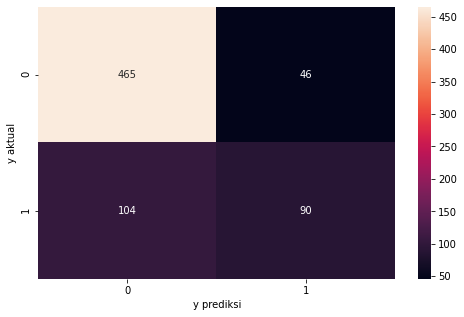

In [1093]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF_test,y_predRF),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1094]:
print(classification_report(yRF_test,y_predRF))

precision    recall  f1-score   support

           0       0.82      0.91      0.86       511
           1       0.66      0.46      0.55       194

    accuracy                           0.79       705
   macro avg       0.74      0.69      0.70       705
weighted avg       0.77      0.79      0.77       705



In [1095]:
pd.DataFrame(data= [accuracy_score(yRF_test,y_predRF)*100,recall_score(yRF_test,y_predRF)*100,precision_score(yRF_test,y_predRF)*100,roc_auc_score(yRF_test,y_predRF)*100,f1_score(yRF_test,y_predRF)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       78.723404
recall         46.391753
precission     66.176471
roc_auc_score  68.694898
F1 Score       54.545455

### All Feature without Parameter Tuning and without Scalling train 80

In [1096]:
modelRF1 = RandomForestClassifier()
modelRF1.fit(xRF1_train, yRF1_train)

RandomForestClassifier()

In [1097]:
# 10 Folds Cross Validation 
clf_scoreRF1 = cross_val_score(modelRF1, xRF1_train, yRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1098]:
y_predRF1 = modelRF1.predict(xRF1_test)

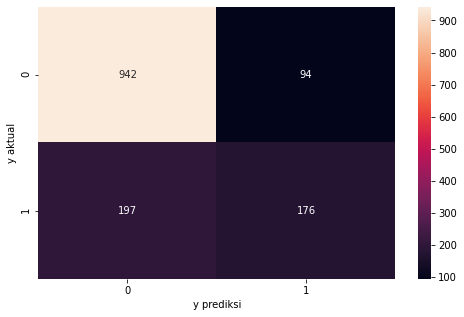

In [1099]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF1_test,y_predRF1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1100]:
print(classification_report(yRF1_test,y_predRF1))

precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [1101]:
pd.DataFrame(data= [accuracy_score(yRF1_test,y_predRF1)*100,recall_score(yRF1_test,y_predRF1)*100,precision_score(yRF1_test,y_predRF1)*100,roc_auc_score(yRF1_test,y_predRF1)*100,f1_score(yRF1_test,y_predRF1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.347055
recall         47.184987
precission     65.185185
roc_auc_score  69.055814
F1 Score       54.743390

### All Feature with Parameter Tuning Random Search and without Scalling train 90

In [1102]:
modelRFRS = RandomForestClassifier(max_depth=90,min_samples_split=5,min_samples_leaf=4,n_estimators=400)
modelRFRS.fit(xRF_train, yRF_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=400)

In [1103]:
# 10 Folds Cross Validation 
clf_scoreRFRS = cross_val_score(modelRFRS, xRF_train, yRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1104]:
y_predRFRS = modelRFRS.predict(xRF_test)

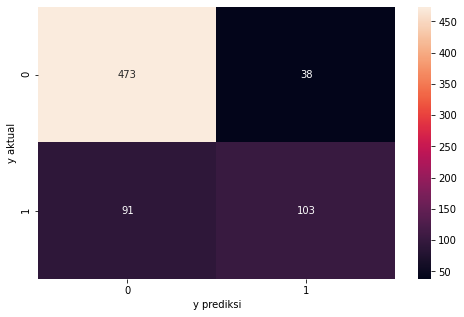

In [1105]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF_test,y_predRFRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1106]:
print(classification_report(yRF_test,y_predRFRS))

precision    recall  f1-score   support

           0       0.84      0.93      0.88       511
           1       0.73      0.53      0.61       194

    accuracy                           0.82       705
   macro avg       0.78      0.73      0.75       705
weighted avg       0.81      0.82      0.81       705



In [1107]:
pd.DataFrame(data= [accuracy_score(yRF_test,y_predRFRS)*100,recall_score(yRF_test,y_predRFRS)*100,precision_score(yRF_test,y_predRFRS)*100,roc_auc_score(yRF_test,y_predRFRS)*100,f1_score(yRF_test,y_predRFRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.702128
recall         53.092784
precission     73.049645
roc_auc_score  72.828192
F1 Score       61.492537

### All Feature with Parameter Tuning Random Search and without Scalling train 80

In [1108]:
modelRFRS1 = RandomForestClassifier(max_depth=90,min_samples_split=10,min_samples_leaf=2,n_estimators=1000)
modelRFRS1.fit(xRF1_train, yRF1_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1000)

In [1109]:
# 10 Folds Cross Validation 
clf_scoreRFRS1 = cross_val_score(modelRFRS1, xRF1_train, yRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1110]:
y_predRFRS1 = modelRFRS1.predict(xRF1_test)

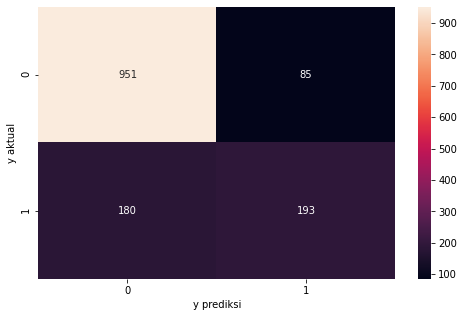

In [1111]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF1_test,y_predRFRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1112]:
print(classification_report(yRF1_test,y_predRFRS1))

precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [1113]:
pd.DataFrame(data= [accuracy_score(yRF1_test,y_predRFRS1)*100,recall_score(yRF1_test,y_predRFRS1)*100,precision_score(yRF1_test,y_predRFRS1)*100,roc_auc_score(yRF1_test,y_predRFRS1)*100,f1_score(yRF1_test,y_predRFRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.192335
recall         51.742627
precission     69.424460
roc_auc_score  71.768997
F1 Score       59.293395

### All Feature with Parameter Tuning Grid Search and without Scalling train 90

In [1114]:
modelRFGS = RandomForestClassifier(max_depth=90,min_samples_split=5,min_samples_leaf=2,n_estimators=200)
modelRFGS.fit(xRF_train, yRF_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200)

In [1115]:
# 10 Folds Cross Validation 
clf_scoreRFGS = cross_val_score(modelRFGS, xRF_train, yRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1116]:
y_predRFGS = modelRFGS.predict(xRF_test)

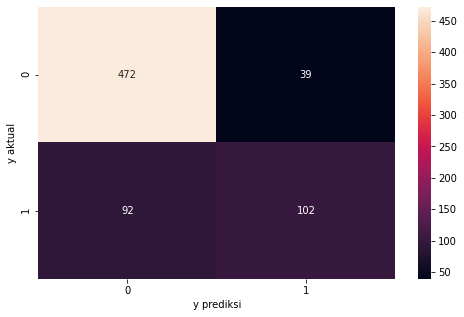

In [1117]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF_test,y_predRFGS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1118]:
print(classification_report(yRF_test,y_predRFGS))

precision    recall  f1-score   support

           0       0.84      0.92      0.88       511
           1       0.72      0.53      0.61       194

    accuracy                           0.81       705
   macro avg       0.78      0.72      0.74       705
weighted avg       0.81      0.81      0.80       705



In [1119]:
pd.DataFrame(data= [accuracy_score(yRF_test,y_predRFGS)*100,recall_score(yRF_test,y_predRFGS)*100,precision_score(yRF_test,y_predRFGS)*100,roc_auc_score(yRF_test,y_predRFGS)*100,f1_score(yRF_test,y_predRFGS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.418440
recall         52.577320
precission     72.340426
roc_auc_score  72.472613
F1 Score       60.895522

### All Feature with Parameter Tuning Grid Search and without Scalling train 80

In [1120]:
modelRFGS1 = RandomForestClassifier(max_depth=110,min_samples_split=10,min_samples_leaf=4,n_estimators=400)
modelRFGS1.fit(xRF1_train, yRF1_train)

RandomForestClassifier(max_depth=110, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400)

In [1121]:
# 10 Folds Cross Validation 
clf_scoreRFGS1 = cross_val_score(modelRFGS1, xRF1_train, yRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1122]:
y_predRFGS1 = modelRFGS1.predict(xRF1_test)

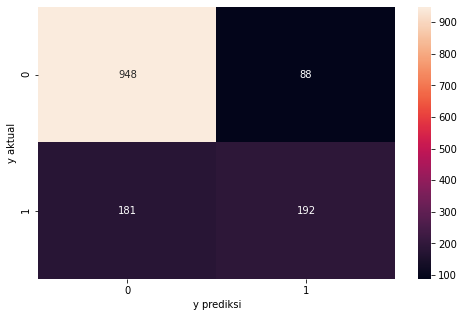

In [1123]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yRF1_test,y_predRFGS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1124]:
print(classification_report(yRF1_test,y_predRFGS1))

precision    recall  f1-score   support

           0       0.84      0.92      0.88      1036
           1       0.69      0.51      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [1125]:
pd.DataFrame(data= [accuracy_score(yRF1_test,y_predRFGS1)*100,recall_score(yRF1_test,y_predRFGS1)*100,precision_score(yRF1_test,y_predRFGS1)*100,roc_auc_score(yRF1_test,y_predRFGS1)*100,f1_score(yRF1_test,y_predRFGS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.908446
recall         51.474531
precission     68.571429
roc_auc_score  71.490161
F1 Score       58.805513

### All Feature without Parameter Tuning but with Scalling train 90

In [1126]:
x_ScalRF = df2_Scal.drop(["Churn"],axis=1)
y_ScalRF = df2_Scal["Churn"]

In [1127]:
xScalRF_train, xScalRF_test, yScalRF_train, yScalRF_test = train_test_split(x_ScalRF, y_ScalRF, test_size = 0.1, random_state = 42)

In [1128]:
xScalRF1_train, xScalRF1_test, yScalRF1_train, yScalRF1_test = train_test_split(x_ScalRF, y_ScalRF, test_size = 0.2, random_state = 42)

In [1129]:
modelRFscal = RandomForestClassifier()
modelRFscal.fit(xScalRF_train, yScalRF_train)

RandomForestClassifier()

In [1130]:
# 10 Folds Cross Validation 
clf_scoreRFScal = cross_val_score(modelRFscal, xScalRF_train, yScalRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1131]:
y_predRFscal = modelRFscal.predict(xScalRF_test)

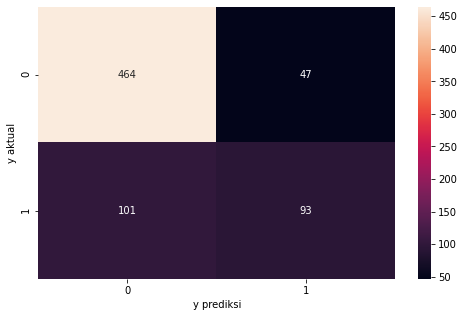

In [1132]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF_test,y_predRFscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1133]:
print(classification_report(yScalRF_test,y_predRFscal))

precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       511
         1.0       0.66      0.48      0.56       194

    accuracy                           0.79       705
   macro avg       0.74      0.69      0.71       705
weighted avg       0.78      0.79      0.78       705



In [1134]:
pd.DataFrame(data= [accuracy_score(yScalRF_test,y_predRFscal)*100,recall_score(yScalRF_test,y_predRFscal)*100,precision_score(yScalRF_test,y_predRFscal)*100,roc_auc_score(yScalRF_test,y_predRFscal)*100,f1_score(yScalRF_test,y_predRFscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.007092
recall         47.938144
precission     66.428571
roc_auc_score  69.370246
F1 Score       55.688623

### All Feature without Parameter Tuning but with Scalling train 80

In [1135]:
modelRFscal1 = RandomForestClassifier()
modelRFscal1.fit(xScalRF1_train, yScalRF1_train)

RandomForestClassifier()

In [1136]:
# 10 Folds Cross Validation 
clf_scoreRFScal1 = cross_val_score(modelRFscal1, xScalRF1_train, yScalRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1137]:
y_predRFscal1 = modelRFscal1.predict(xScalRF1_test)

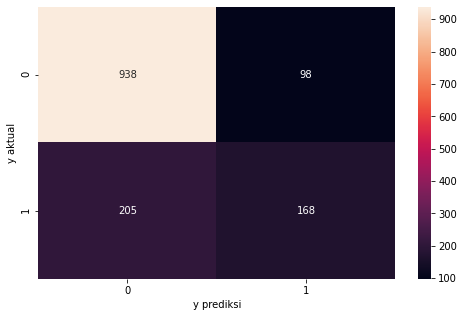

In [1138]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF1_test,y_predRFscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1140]:
print(classification_report(yScalRF1_test,y_predRFscal1))

precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1036
         1.0       0.63      0.45      0.53       373

    accuracy                           0.78      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



In [1141]:
pd.DataFrame(data= [accuracy_score(yScalRF1_test,y_predRFscal1)*100,recall_score(yScalRF1_test,y_predRFscal1)*100,precision_score(yScalRF1_test,y_predRFscal1)*100,roc_auc_score(yScalRF1_test,y_predRFscal1)*100,f1_score(yScalRF1_test,y_predRFscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       78.495387
recall         45.040214
precission     63.157895
roc_auc_score  67.790378
F1 Score       52.582160

### All Feature with Parameter Tuning Random Search and with Scalling train 90

In [1142]:
modelRFRSscal = RandomForestClassifier(max_depth=110,min_samples_split=5,min_samples_leaf=4,n_estimators=800)
modelRFRSscal.fit(xScalRF_train, yScalRF_train)

RandomForestClassifier(max_depth=110, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=800)

In [1143]:
# 10 Folds Cross Validation 
clf_scoreRFRSScal = cross_val_score(modelRFRSscal, xScalRF_train, yScalRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1144]:
y_predRFRSscal = modelRFRSscal.predict(xScalRF_test)

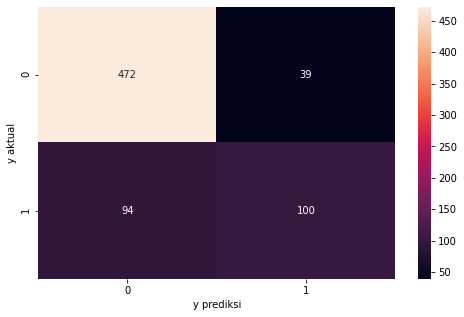

In [1145]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF_test,y_predRFRSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1146]:
print(classification_report(yScalRF_test,y_predRFRSscal))

precision    recall  f1-score   support

         0.0       0.83      0.92      0.88       511
         1.0       0.72      0.52      0.60       194

    accuracy                           0.81       705
   macro avg       0.78      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705



In [1147]:
pd.DataFrame(data= [accuracy_score(yScalRF_test,y_predRFRSscal)*100,recall_score(yScalRF_test,y_predRFRSscal)*100,precision_score(yScalRF_test,y_predRFRSscal)*100,roc_auc_score(yScalRF_test,y_predRFRSscal)*100,f1_score(yScalRF_test,y_predRFRSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.134752
recall         51.546392
precission     71.942446
roc_auc_score  71.957149
F1 Score       60.060060

### All Feature with Parameter Tuning Random Feature and with Scalling train 80

In [1148]:
modelRFRSscal1 = RandomForestClassifier(max_depth=110,min_samples_split=10,min_samples_leaf=4,n_estimators=400)
modelRFRSscal1.fit(xScalRF1_train, yScalRF1_train)

RandomForestClassifier(max_depth=110, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400)

In [1149]:
# 10 Folds Cross Validation 
clf_scoreRFRSScal1 = cross_val_score(modelRFRSscal1, xScalRF1_train, yScalRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1150]:
y_predRFRSscal1 = modelRFRSscal1.predict(xScalRF1_test)

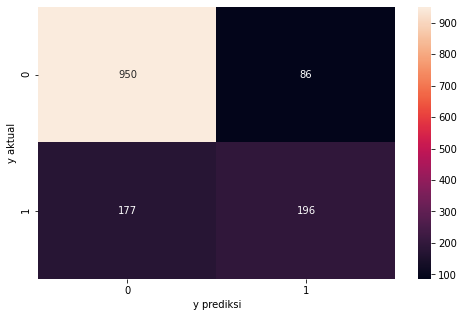

In [1151]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF1_test,y_predRFRSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1152]:
print(classification_report(yScalRF1_test,y_predRFRSscal1))

precision    recall  f1-score   support

         0.0       0.84      0.92      0.88      1036
         1.0       0.70      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [1153]:
pd.DataFrame(data= [accuracy_score(yScalRF1_test,y_predRFRSscal1)*100,recall_score(yScalRF1_test,y_predRFRSscal1)*100,precision_score(yScalRF1_test,y_predRFRSscal1)*100,roc_auc_score(yScalRF1_test,y_predRFRSscal1)*100,f1_score(yScalRF1_test,y_predRFRSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.334280
recall         52.546917
precission     69.503546
roc_auc_score  72.122879
F1 Score       59.847328

### All Feature with Parameter Tuning Grid Search Feature and with Scalling train 90

In [1154]:
modelRFGSscal = RandomForestClassifier(max_depth=80,min_samples_split=2,min_samples_leaf=4,n_estimators=200)
modelRFGSscal.fit(xScalRF_train, yScalRF_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=4, n_estimators=200)

In [1155]:
# 10 Folds Cross Validation 
clf_scoreRFGSScal = cross_val_score(modelRFGSscal, xScalRF_train, yScalRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1156]:
y_predRFGSscal = modelRFGSscal.predict(xScalRF_test)

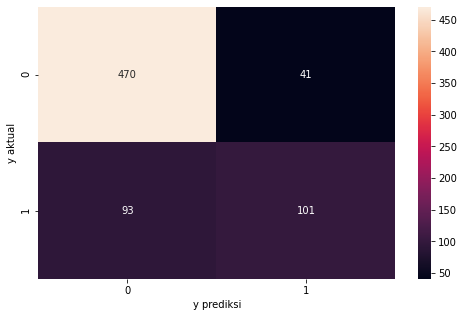

In [1157]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF_test,y_predRFGSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1158]:
print(classification_report(yScalRF_test,y_predRFGSscal))

precision    recall  f1-score   support

         0.0       0.83      0.92      0.88       511
         1.0       0.71      0.52      0.60       194

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705



In [1159]:
pd.DataFrame(data= [accuracy_score(yScalRF_test,y_predRFGSscal)*100,recall_score(yScalRF_test,y_predRFGSscal)*100,precision_score(yScalRF_test,y_predRFGSscal)*100,roc_auc_score(yScalRF_test,y_predRFGSscal)*100,f1_score(yScalRF_test,y_predRFGSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.992908
recall         52.061856
precission     71.126761
roc_auc_score  72.019186
F1 Score       60.119048

### All Feature with Parameter Tuning Grid Search Feature and with Scalling train 80

In [1160]:
modelRFGSscal1 = RandomForestClassifier(max_depth=100,min_samples_split=10,min_samples_leaf=4,n_estimators=400)
modelRFGSscal1.fit(xScalRF1_train, yScalRF1_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400)

In [1161]:
# 10 Folds Cross Validation 
clf_scoreRFGSScal1 = cross_val_score(modelRFGSscal1, xScalRF1_train, yScalRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1162]:
y_predRFGSscal1 = modelRFGSscal1.predict(xScalRF1_test)

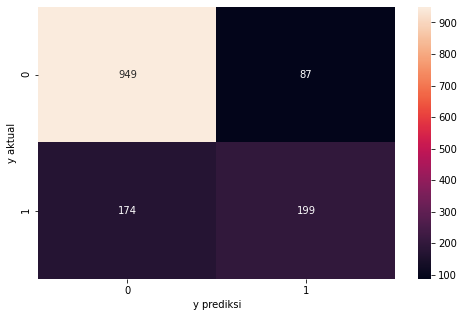

In [1163]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yScalRF1_test,y_predRFGSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1164]:
print(classification_report(yScalRF1_test,y_predRFGSscal1))

precision    recall  f1-score   support

         0.0       0.85      0.92      0.88      1036
         1.0       0.70      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [1165]:
pd.DataFrame(data= [accuracy_score(yScalRF1_test,y_predRFGSscal1)*100,recall_score(yScalRF1_test,y_predRFGSscal1)*100,precision_score(yScalRF1_test,y_predRFGSscal1)*100,roc_auc_score(yScalRF1_test,y_predRFGSscal1)*100,f1_score(yScalRF1_test,y_predRFGSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.476224
recall         53.351206
precission     69.580420
roc_auc_score  72.476762
F1 Score       60.394537

### Feature Selection without Parameter Tuning and without Scalling train 90

In [1166]:
x_selRF = df2[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
y_selRF  = df2["Churn"]

In [1167]:
xselRF_train, xselRF_test, yselRF_train, yselRF_test = train_test_split(x_selRF, y_selRF, test_size = 0.1, random_state = 42)

In [1168]:
xselRF1_train, xselRF1_test, yselRF1_train, yselRF1_test = train_test_split(x_selRF, y_selRF, test_size = 0.2, random_state = 42)

In [1169]:
modelRFsel = RandomForestClassifier()
modelRFsel.fit(xselRF_train, yselRF_train)

RandomForestClassifier()

In [1170]:
# 10 Folds Cross Validation 
clf_scoreRFsel= cross_val_score(modelRFsel, xselRF_train, yselRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1171]:
y_predRFsel = modelRFsel.predict(xselRF_test)

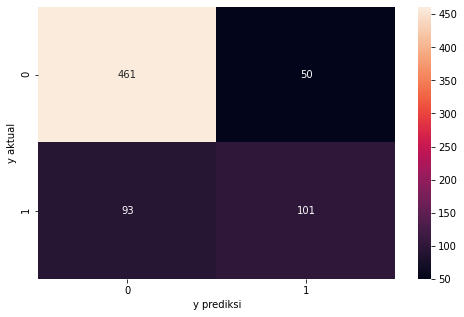

In [1172]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF_test,y_predRFsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1173]:
print(classification_report(yselRF_test,y_predRFsel))

precision    recall  f1-score   support

           0       0.83      0.90      0.87       511
           1       0.67      0.52      0.59       194

    accuracy                           0.80       705
   macro avg       0.75      0.71      0.73       705
weighted avg       0.79      0.80      0.79       705



In [1174]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFsel)*100,recall_score(yselRF_test,y_predRFsel)*100,precision_score(yselRF_test,y_predRFsel)*100,roc_auc_score(yselRF_test,y_predRFsel)*100,f1_score(yselRF_test,y_predRFsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.716312
recall         52.061856
precission     66.887417
roc_auc_score  71.138560
F1 Score       58.550725

### Feature Selection without Parameter Tuning and without Scalling train 80

In [1175]:
modelRFsel1 = RandomForestClassifier()
modelRFsel1.fit(xselRF1_train, yselRF1_train)

RandomForestClassifier()

In [1176]:
# 10 Folds Cross Validation 
clf_scoreRFsel80 = cross_val_score(modelRFsel1, xselRF1_train, yselRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1177]:
y_predRFsel1 = modelRFsel1.predict(xselRF1_test)

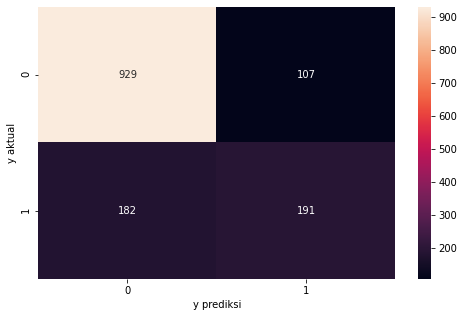

In [1178]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF1_test,y_predRFsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1179]:
print(classification_report(yselRF1_test,y_predRFsel1))

precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.64      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [1180]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFsel1)*100,recall_score(yselRF1_test,y_predRFsel1)*100,precision_score(yselRF1_test,y_predRFsel1)*100,roc_auc_score(yselRF1_test,y_predRFsel1)*100,f1_score(yselRF1_test,y_predRFsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.488999
recall         51.206434
precission     64.093960
roc_auc_score  70.439124
F1 Score       56.929955

### Feature Selection with Parameter Tuning Random Search and without Scalling train 90

In [1181]:
modelRFRSsel = RandomForestClassifier(max_depth=90,min_samples_split=5,min_samples_leaf=4,n_estimators=800)
modelRFRSsel.fit(xselRF_train, yselRF_train)

RandomForestClassifier(max_depth=90, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=800)

In [1182]:
# 10 Folds Cross Validation 
clf_scoreRFRSsel = cross_val_score(modelRFRSsel, xselRF_train, yselRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1183]:
y_predRFRSsel = modelRFRSsel.predict(xselRF_test)

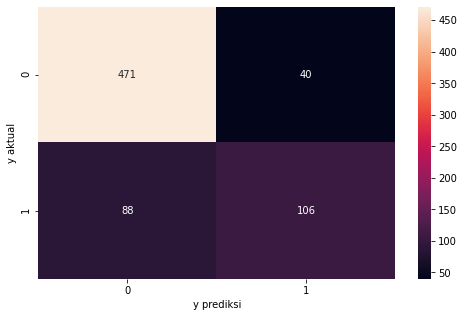

In [1184]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF_test,y_predRFRSsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1185]:
print(classification_report(yselRF_test,y_predRFRSsel))

precision    recall  f1-score   support

           0       0.84      0.92      0.88       511
           1       0.73      0.55      0.62       194

    accuracy                           0.82       705
   macro avg       0.78      0.73      0.75       705
weighted avg       0.81      0.82      0.81       705



In [1186]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFRSsel)*100,recall_score(yselRF_test,y_predRFRSsel)*100,precision_score(yselRF_test,y_predRFRSsel)*100,roc_auc_score(yselRF_test,y_predRFRSsel)*100,f1_score(yselRF_test,y_predRFRSsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.843972
recall         54.639175
precission     72.602740
roc_auc_score  73.405693
F1 Score       62.352941

### Feature Selection with Parameter Tuning Random Search and without Scalling train 80

In [1187]:
modelRFRSsel1 = RandomForestClassifier(max_depth=100,min_samples_split=10,min_samples_leaf=2,n_estimators=400)
modelRFRSsel1.fit(xselRF1_train, yselRF1_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=400)

In [1188]:
# 10 Folds Cross Validation 
clf_scoreRFRSsel80 = cross_val_score(modelRFRSsel1, xselRF1_train, yselRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1189]:
y_predRFRSsel1 = modelRFRSsel1.predict(xselRF1_test)

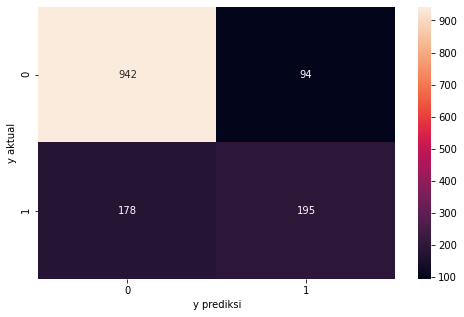

In [1190]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF1_test,y_predRFRSsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1191]:
print(classification_report(yselRF1_test,y_predRFRSsel1))

precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [1192]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFRSsel1)*100,recall_score(yselRF1_test,y_predRFRSsel1)*100,precision_score(yselRF1_test,y_predRFRSsel1)*100,roc_auc_score(yselRF1_test,y_predRFRSsel1)*100,f1_score(yselRF1_test,y_predRFRSsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.695529
recall         52.278820
precission     67.474048
roc_auc_score  71.602731
F1 Score       58.912387

### Feature Selection with Parameter Tuning Grid Search and without Scalling train 90

In [1193]:
modelRFGSsel = RandomForestClassifier(max_depth=100,min_samples_split=2,min_samples_leaf=4,n_estimators=200)
modelRFGSsel.fit(xselRF_train, yselRF_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=200)

In [1194]:
# 10 Folds Cross Validation 
clf_scoreRFGSsel = cross_val_score(modelRFGSsel, xselRF_train, yselRF_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1195]:
y_predRFGSsel = modelRFGSsel.predict(xselRF_test)

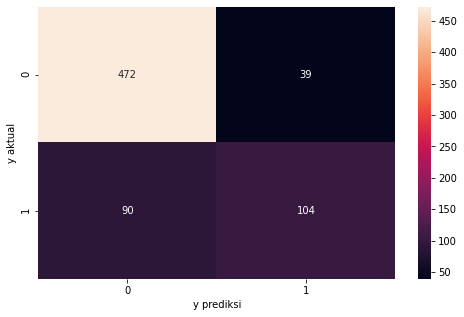

In [1196]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF_test,y_predRFGSsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1197]:
print(classification_report(yselRF_test,y_predRFGSsel))

precision    recall  f1-score   support

           0       0.84      0.92      0.88       511
           1       0.73      0.54      0.62       194

    accuracy                           0.82       705
   macro avg       0.78      0.73      0.75       705
weighted avg       0.81      0.82      0.81       705



In [1198]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFGSsel)*100,recall_score(yselRF_test,y_predRFGSsel)*100,precision_score(yselRF_test,y_predRFGSsel)*100,roc_auc_score(yselRF_test,y_predRFGSsel)*100,f1_score(yselRF_test,y_predRFGSsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.702128
recall         53.608247
precission     72.727273
roc_auc_score  72.988077
F1 Score       61.721068

### Feature Selection with Parameter Tuning Grid Search and without Scalling train 80

In [1199]:
modelRFGSsel1 = RandomForestClassifier(max_depth=100,min_samples_split=2,min_samples_leaf=4,n_estimators=400)
modelRFGSsel1.fit(xselRF1_train, yselRF1_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=400)

In [1200]:
# 10 Folds Cross Validation 
clf_scoreRFGSsel80 = cross_val_score(modelRFGSsel1, xselRF1_train, yselRF1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1201]:
y_predRFGSsel1 = modelRFGSsel1.predict(xselRF1_test)

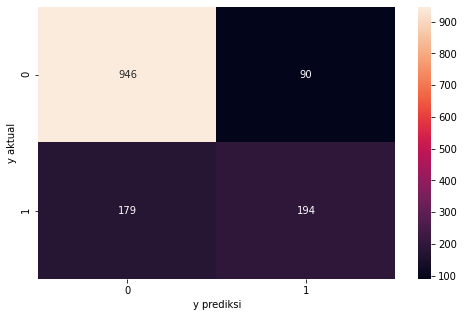

In [1202]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRF1_test,y_predRFGSsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1203]:
print(classification_report(yselRF1_test,y_predRFGSsel1))

precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [1204]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFGSsel1)*100,recall_score(yselRF1_test,y_predRFGSsel1)*100,precision_score(yselRF1_test,y_predRFGSsel1)*100,roc_auc_score(yselRF1_test,y_predRFGSsel1)*100,f1_score(yselRF1_test,y_predRFGSsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.908446
recall         52.010724
precission     68.309859
roc_auc_score  71.661733
F1 Score       59.056317

### Feature Selection without Parameter Tuning but with Scalling train 90

In [1205]:
x_selRFscal = df2_Scal[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
y_selRFscal  = df2_Scal["Churn"]

In [1206]:
xselRFscal_train, xselRFscal_test, yselRFscal_train, yselRFscal_test = train_test_split(x_selRFscal, y_selRFscal, test_size = 0.1, random_state = 42)

In [1207]:
xselRFscal1_train, xselRFscal1_test, yselRFscal1_train, yselRFscal1_test = train_test_split(x_selRFscal, y_selRFscal, test_size = 0.2, random_state = 42)

In [1208]:
modelRFselscal = RandomForestClassifier()
modelRFselscal.fit(xselRFscal_train, yselRFscal_train)

RandomForestClassifier()

In [1209]:
# 10 Folds Cross Validation 
clf_scoreRFselscal = cross_val_score(modelRFselscal, xselRFscal_train, yselRFscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1210]:
y_predRFselscal = modelRFselscal.predict(xselRFscal_test)

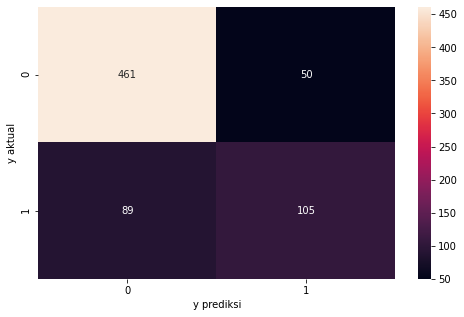

In [1211]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal_test,y_predRFselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1212]:
print(classification_report(yselRFscal_test,y_predRFselscal))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       511
         1.0       0.68      0.54      0.60       194

    accuracy                           0.80       705
   macro avg       0.76      0.72      0.74       705
weighted avg       0.79      0.80      0.80       705



In [1213]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFselscal)*100,recall_score(yselRF_test,y_predRFselscal)*100,precision_score(yselRFscal_test,y_predRFselscal)*100,roc_auc_score(yselRFscal_test,y_predRFselscal)*100,f1_score(yselRF_test,y_predRFselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.283688
recall         54.123711
precission     67.741935
roc_auc_score  72.169488
F1 Score       60.171920

### Feature Selection without Parameter Tuning but with Scalling train 80

In [1214]:
modelRFselscal1 = RandomForestClassifier()
modelRFselscal1.fit(xselRFscal1_train, yselRFscal1_train)

RandomForestClassifier()

In [1215]:
# 10 Folds Cross Validation 
clf_scoreRFselscal1 = cross_val_score(modelRFselscal1, xselRFscal1_train, yselRFscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1216]:
y_predRFselscal1 = modelRFselscal1.predict(xselRFscal1_test)

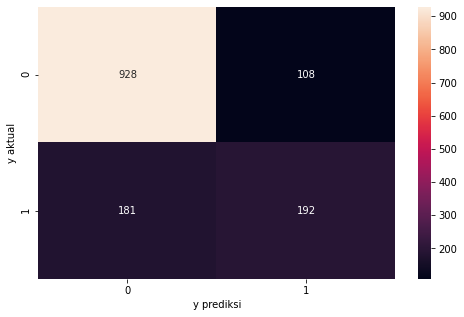

In [1217]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal1_test,y_predRFselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1218]:
print(classification_report(yselRFscal1_test,y_predRFselscal1))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1036
         1.0       0.64      0.51      0.57       373

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409



In [1219]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFselscal1)*100,recall_score(yselRF1_test,y_predRFselscal1)*100,precision_score(yselRFscal1_test,y_predRFselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFselscal1)*100,f1_score(yselRF1_test,y_predRFselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.488999
recall         51.474531
precission     64.000000
roc_auc_score  70.524910
F1 Score       57.057949

### Feature Selection with Parameter Tuning Random Search and with Scalling train 90

In [1220]:
modelRFRSselscal = RandomForestClassifier(max_depth=100,min_samples_split=10,min_samples_leaf=4,n_estimators=90)
modelRFRSselscal.fit(xselRFscal_train, yselRFscal_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=90)

In [1221]:
# 10 Folds Cross Validation 
clf_scoreRFRSselscal = cross_val_score(modelRFRSselscal, xselRFscal_train, yselRFscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1222]:
y_predRFRSselscal = modelRFRSselscal.predict(xselRFscal_test)

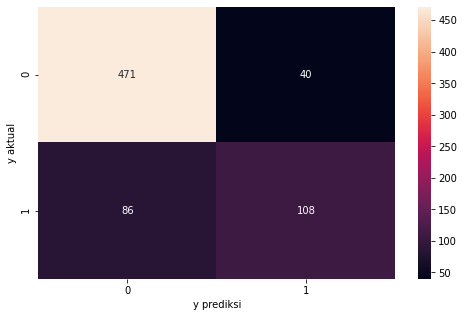

In [1223]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal_test,y_predRFRSselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1224]:
print(classification_report(yselRFscal_test,y_predRFRSselscal))

precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       511
         1.0       0.73      0.56      0.63       194

    accuracy                           0.82       705
   macro avg       0.79      0.74      0.76       705
weighted avg       0.81      0.82      0.81       705



In [1225]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFRSselscal)*100,recall_score(yselRF_test,y_predRFRSselscal)*100,precision_score(yselRFscal_test,y_predRFRSselscal)*100,roc_auc_score(yselRFscal_test,y_predRFRSselscal)*100,f1_score(yselRF_test,y_predRFRSselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       82.127660
recall         55.670103
precission     72.972973
roc_auc_score  73.921157
F1 Score       63.157895

### Feature Selection with Parameter Tuning Random Search and with Scalling train 80

In [1226]:
modelRFRSselscal1 = RandomForestClassifier(max_depth=80,min_samples_split=10,min_samples_leaf=2,n_estimators=1000)
modelRFRSselscal1.fit(xselRFscal1_train, yselRFscal1_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=1000)

In [1227]:
# 10 Folds Cross Validation 
clf_scoreRFRSselscal80 = cross_val_score(modelRFRSselscal1, xselRFscal1_train, yselRFscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1228]:
y_predRFRSselscal1 = modelRFRSselscal1.predict(xselRFscal1_test)

In [1229]:
# 10 Folds Cross Validation 
clf_scoreRFRSselscal80 = cross_val_score(modelRFRSselscal1, xselRFscal1_train, yselRFscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1230]:
y_predRFRSselscal1 = modelRFRSselscal1.predict(xselRFscal1_test)

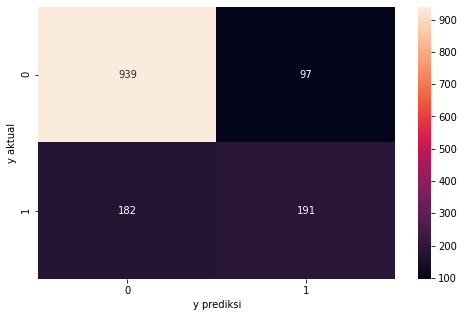

In [1231]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal1_test,y_predRFRSselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1232]:
print(classification_report(yselRFscal1_test,y_predRFRSselscal1))

precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1036
         1.0       0.66      0.51      0.58       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [1233]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFRSselscal1)*100,recall_score(yselRF1_test,y_predRFRSselscal1)*100,precision_score(yselRFscal1_test,y_predRFRSselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFRSselscal1)*100,f1_score(yselRF1_test,y_predRFRSselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.198722
recall         51.206434
precission     66.319444
roc_auc_score  70.921750
F1 Score       57.791225

In [1234]:
### Feature Selection with Parameter Tuning Grid Search and with Scalling train 90

In [1235]:
modelRFGSselscal = RandomForestClassifier(max_depth=110,min_samples_split=5,min_samples_leaf=4,n_estimators=800)
modelRFGSselscal.fit(xselRFscal_train, yselRFscal_train)

RandomForestClassifier(max_depth=110, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=800)

In [1236]:
 #10 Folds Cross Validation 
clf_scoreRFGSselscal = cross_val_score(modelRFGSselscal, xselRFscal_train, yselRFscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1237]:
y_predRFGSselscal = modelRFGSselscal.predict(xselRFscal_test)

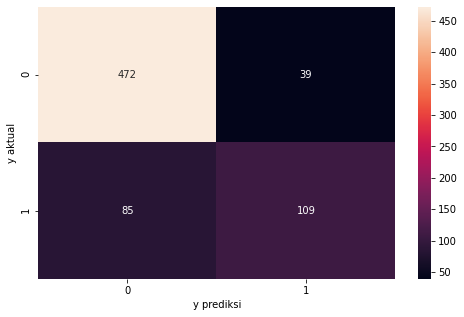

In [1238]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal_test,y_predRFGSselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1485]:
BestRF = pd.DataFrame(classification_report(yselRFscal_test,y_predRFGSselscal, target_names= labels, output_dict=True)).T


In [1239]:
print(classification_report(yselRFscal_test,y_predRFGSselscal))

precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       511
         1.0       0.74      0.56      0.64       194

    accuracy                           0.82       705
   macro avg       0.79      0.74      0.76       705
weighted avg       0.82      0.82      0.82       705



In [1240]:
pd.DataFrame(data= [accuracy_score(yselRF_test,y_predRFGSselscal)*100,recall_score(yselRF_test,y_predRFGSselscal)*100,precision_score(yselRFscal_test,y_predRFGSselscal)*100,roc_auc_score(yselRFscal_test,y_predRFGSselscal)*100,f1_score(yselRF_test,y_predRFGSselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       82.411348
recall         56.185567
precission     73.648649
roc_auc_score  74.276737
F1 Score       63.742690

### Feature Selection with Parameter Tuning Grid Search and with Scalling train 80

In [1241]:
modelRFGSselscal1 = RandomForestClassifier(max_depth=100,min_samples_split=2,min_samples_leaf=4,n_estimators=200)
modelRFGSselscal1.fit(xselRFscal1_train, yselRFscal1_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=4, n_estimators=200)

In [1242]:
 #10 Folds Cross Validation 
clf_scoreRFGSselscal80 = cross_val_score(modelRFGSselscal1, xselRFscal1_train, yselRFscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1243]:
y_predRFGSselscal1 = modelRFGSselscal1.predict(xselRFscal1_test)

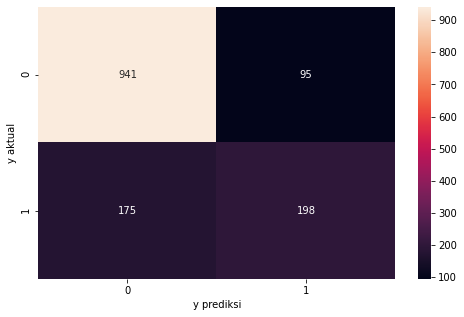

In [1244]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselRFscal1_test,y_predRFGSselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1245]:
print(classification_report(yselRFscal1_test,y_predRFGSselscal1))

precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1036
         1.0       0.68      0.53      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [1246]:
pd.DataFrame(data= [accuracy_score(yselRF1_test,y_predRFGSselscal1)*100,recall_score(yselRF1_test,y_predRFGSselscal1)*100,precision_score(yselRFscal1_test,y_predRFGSselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFGSselscal1)*100,f1_score(yselRF1_test,y_predRFGSselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.837473
recall         53.083110
precission     67.576792
roc_auc_score  71.956613
F1 Score       59.459459

In [1247]:
RandomForest_Summary = pd.DataFrame({"Random Forest": ["accuracy","recall","precision","roc_auc_score","f1_score"],
                                "All Feature without Parameter Tuning and without Scalling train 90":[accuracy_score(yRF_test,y_predRF)*100,recall_score(yRF_test,y_predRF)*100,precision_score(yRF_test,y_predRF)*100,roc_auc_score(yRF_test,y_predRF)*100,f1_score(yRF_test,y_predRF)*100],
                                "All Feature without Parameter Tuning and without Scalling train 80":[accuracy_score(yRF1_test,y_predRF1)*100,recall_score(yRF1_test,y_predRF1)*100,precision_score(yRF1_test,y_predRF1)*100,roc_auc_score(yRF1_test,y_predRF1)*100,f1_score(yRF1_test,y_predRF1)*100],
                                "All Feature with Parameter Tuning Random Search and without Scalling train 90":[accuracy_score(yRF_test,y_predRFRS)*100,recall_score(yRF_test,y_predRFRS)*100,precision_score(yRF_test,y_predRFRS)*100,roc_auc_score(yRF_test,y_predRFRS)*100,f1_score(yRF_test,y_predRFRS)*100],
                                "All Feature with Parameter Tuning Random Search and without Scalling train 80":[accuracy_score(yRF1_test,y_predRFRS1)*100,recall_score(yRF1_test,y_predRFRS1)*100,precision_score(yRF1_test,y_predRFRS1)*100,roc_auc_score(yRF1_test,y_predRFRS1)*100,f1_score(yRF1_test,y_predRFRS1)*100],
                                "All Feature with Parameter Tuning Grid Search and without Scalling train 90":[accuracy_score(yRF_test,y_predRFGS)*100,recall_score(yRF_test,y_predRFGS)*100,precision_score(yRF_test,y_predRFGS)*100,roc_auc_score(yRF_test,y_predRFGS)*100,f1_score(yRF_test,y_predRFGS)*100],
                                 "All Feature with Parameter Tuning Grid Search and without Scalling train 80":[accuracy_score(yRF1_test,y_predRFGS1)*100,recall_score(yRF1_test,y_predRFGS1)*100,precision_score(yRF1_test,y_predRFGS1)*100,roc_auc_score(yRF1_test,y_predRFGS1)*100,f1_score(yRF1_test,y_predRFGS1)*100],
                                  "All Feature without Parameter Tuning but with Scalling train 90":[accuracy_score(yScalRF_test,y_predRFscal)*100,recall_score(yScalRF_test,y_predRFscal)*100,precision_score(yScalRF_test,y_predRFscal)*100,roc_auc_score(yScalRF_test,y_predRFscal)*100,f1_score(yScalRF_test,y_predRFscal)*100],
                                  "All Feature without Parameter Tuning but with Scalling train 80":[accuracy_score(yScalRF1_test,y_predRFscal1)*100,recall_score(yScalRF1_test,y_predRFscal1)*100,precision_score(yScalRF1_test,y_predRFscal1)*100,roc_auc_score(yScalRF1_test,y_predRFscal1)*100,f1_score(yScalRF1_test,y_predRFscal1)*100],
                                  "All Feature with Parameter Tuning Random Search and with Scalling train 90":[accuracy_score(yScalRF_test,y_predRFRSscal)*100,recall_score(yScalRF_test,y_predRFRSscal)*100,precision_score(yScalRF_test,y_predRFRSscal)*100,roc_auc_score(yScalRF_test,y_predRFRSscal)*100,f1_score(yScalRF_test,y_predRFRSscal)*100],
                                  "All Feature with Parameter Tuning Random Search and with Scalling train 80":[accuracy_score(yScalRF1_test,y_predRFRSscal1)*100,recall_score(yScalRF1_test,y_predRFRSscal1)*100,precision_score(yScalRF1_test,y_predRFRSscal1)*100,roc_auc_score(yScalRF1_test,y_predRFRSscal1)*100,f1_score(yScalRF1_test,y_predRFRSscal1)*100],
                                  "All Feature with Parameter Tuning Grid Search and with Scalling train 90":[accuracy_score(yScalRF_test,y_predRFGSscal)*100,recall_score(yScalRF_test,y_predRFGSscal)*100,precision_score(yScalRF_test,y_predRFGSscal)*100,roc_auc_score(yScalRF_test,y_predRFGSscal)*100,f1_score(yScalRF_test,y_predRFGSscal)*100],
                                  "All Feature with Parameter Tuning Grid Search and with Scalling train 80":[accuracy_score(yScalRF1_test,y_predRFGSscal1)*100,recall_score(yScalRF1_test,y_predRFGSscal1)*100,precision_score(yScalRF1_test,y_predRFGSscal1)*100,roc_auc_score(yScalRF1_test,y_predRFGSscal1)*100,f1_score(yScalRF1_test,y_predRFGSscal1)*100],
                                  "Feature Selection without Parameter Tuning and without Scalling train 90":[accuracy_score(yselRF_test,y_predRFsel)*100,recall_score(yselRF_test,y_predRFsel)*100,precision_score(yselRF_test,y_predRFsel)*100,roc_auc_score(yselRF_test,y_predRFsel)*100,f1_score(yselRF_test,y_predRFsel)*100],
                                   "Feature Selection without Parameter Tuning and without Scalling train 80":[accuracy_score(yselRF1_test,y_predRFsel1)*100,recall_score(yselRF1_test,y_predRFsel1)*100,precision_score(yselRF1_test,y_predRFsel1)*100,roc_auc_score(yselRF1_test,y_predRFsel1)*100,f1_score(yselRF1_test,y_predRFsel1)*100],
                                   "Feature Selection with Parameter Tuning Random Search and without Scalling train 90":[accuracy_score(yselRF_test,y_predRFRSsel)*100,recall_score(yselRF_test,y_predRFRSsel)*100,precision_score(yselRF_test,y_predRFRSsel)*100,roc_auc_score(yselRF_test,y_predRFRSsel)*100,f1_score(yselRF_test,y_predRFRSsel)*100],
                                   "Feature Selection with Parameter Tuning Random Search and without Scalling train 80":[accuracy_score(yselRF1_test,y_predRFRSsel1)*100,recall_score(yselRF1_test,y_predRFRSsel1)*100,precision_score(yselRF1_test,y_predRFRSsel1)*100,roc_auc_score(yselRF1_test,y_predRFRSsel1)*100,f1_score(yselRF1_test,y_predRFRSsel1)*100],
                                   "Feature Selection with Parameter Tuning Grid Search and without Scalling train 90":[accuracy_score(yselRF_test,y_predRFGSsel)*100,recall_score(yselRF_test,y_predRFGSsel)*100,precision_score(yselRF_test,y_predRFGSsel)*100,roc_auc_score(yselRF_test,y_predRFGSsel)*100,f1_score(yselRF_test,y_predRFGSsel)*100],
                                   "Feature Selection with Parameter Tuning Grid Search and without Scalling train 80":[accuracy_score(yselRF1_test,y_predRFGSsel1)*100,recall_score(yselRF1_test,y_predRFGSsel1)*100,precision_score(yselRF1_test,y_predRFGSsel1)*100,roc_auc_score(yselRF1_test,y_predRFGSsel1)*100,f1_score(yselRF1_test,y_predRFGSsel1)*100],
                                   "Feature Selection without Parameter Tuning but with Scalling train 90":[accuracy_score(yselRF_test,y_predRFselscal)*100,recall_score(yselRF_test,y_predRFselscal)*100,precision_score(yselRFscal_test,y_predRFselscal)*100,roc_auc_score(yselRFscal_test,y_predRFselscal)*100,f1_score(yselRF_test,y_predRFselscal)*100],
                                   "Feature Selection without Parameter Tuning but with Scalling train 80":[accuracy_score(yselRF1_test,y_predRFselscal1)*100,recall_score(yselRF1_test,y_predRFselscal1)*100,precision_score(yselRFscal1_test,y_predRFselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFselscal1)*100,f1_score(yselRF1_test,y_predRFselscal1)*100],
                                   "Feature Selection with Parameter Tuning Random Search and Scalling train 90": [accuracy_score(yselRF_test,y_predRFRSselscal)*100,recall_score(yselRF_test,y_predRFRSselscal)*100,precision_score(yselRFscal_test,y_predRFRSselscal)*100,roc_auc_score(yselRFscal_test,y_predRFRSselscal)*100,f1_score(yselRF_test,y_predRFRSselscal)*100],
                                   "Feature Selection with Parameter Tuning Random Search and Scalling train 80":[accuracy_score(yselRF1_test,y_predRFRSselscal1)*100,recall_score(yselRF1_test,y_predRFRSselscal1)*100,precision_score(yselRFscal1_test,y_predRFRSselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFRSselscal1)*100,f1_score(yselRF1_test,y_predRFRSselscal1)*100],
                                   "Feature Selection with Parameter Tuning Grid Search and with Scalling train 90":[accuracy_score(yselRF_test,y_predRFGSselscal)*100,recall_score(yselRF_test,y_predRFGSselscal)*100,precision_score(yselRFscal_test,y_predRFGSselscal)*100,roc_auc_score(yselRFscal_test,y_predRFGSselscal)*100,f1_score(yselRF_test,y_predRFGSselscal)*100],
                                   "Feature Selection with Parameter Tuning Grid Search and with Scalling train 80":[accuracy_score(yselRF1_test,y_predRFGSselscal1)*100,recall_score(yselRF1_test,y_predRFGSselscal1)*100,precision_score(yselRFscal1_test,y_predRFGSselscal1)*100,roc_auc_score(yselRFscal1_test,y_predRFGSselscal1)*100,f1_score(yselRF1_test,y_predRFGSselscal1)*100]
                                 


})
c = RandomForest_Summary.set_index("Random Forest").T
c   

Random Forest                                        accuracy     recall  \
All Feature without Parameter Tuning and withou...  78.723404  46.391753   
All Feature without Parameter Tuning and withou...  79.347055  47.184987   
All Feature with Parameter Tuning Random Search...  81.702128  53.092784   
All Feature with Parameter Tuning Random Search...  81.192335  51.742627   
All Feature with Parameter Tuning Grid Search a...  81.418440  52.577320   
All Feature with Parameter Tuning Grid Search a...  80.908446  51.474531   
All Feature without Parameter Tuning but with S...  79.007092  47.938144   
All Feature without Parameter Tuning but with S...  78.495387  45.040214   
All Feature with Parameter Tuning Random Search...  81.134752  51.546392   
All Feature with Parameter Tuning Random Search...  81.334280  52.546917   
All Feature with Parameter Tuning Grid Search a...  80.992908  52.061856   
All Feature with Parameter Tuning Grid Search a...  81.476224  53.351206   
Feature Selection without Parameter Tuning and ...  79.716312  52.061856   
Feature Selection without Parameter Tuning and ...  79.488999  51.206434   
Feature Selection with Parameter Tuning Random ...  81.843972  54.639175   
Feature Selection with Parameter Tuning Random ...  80.695529  52.278820   
Feature Selection with Parameter Tuning Grid Se...  81.702128  53.608247   
Feature Selection with Parameter Tuning Grid Se...  80.908446  52.010724   
Feature Selection without Parameter Tuning but ...  80.283688  54.123711   
Feature Selection without Parameter Tuning but ...  79.488999  51.474531   
Feature Selection with Parameter Tuning Random ...  82.127660  55.670103   
Feature Selection with Parameter Tuning Random ...  80.198722  51.206434   
Feature Selection with Parameter Tuning Grid Se...  82.411348  56.185567   
Feature Selection with Parameter Tuning Grid Se...  80.837473  53.083110   

Random Forest                                       precision  roc_auc_score  \
All Feature without Parameter Tuning and withou...  66.176471      68.694898   
All Feature without Parameter Tuning and withou...  65.185185      69.055814   
All Feature with Parameter Tuning Random Search...  73.049645      72.828192   
All Feature with Parameter Tuning Random Search...  69.424460      71.768997   
All Feature with Parameter Tuning Grid Search a...  72.340426      72.472613   
All Feature with Parameter Tuning Grid Search a...  68.571429      71.490161   
All Feature without Parameter Tuning but with S...  66.428571      69.370246   
All Feature without Parameter Tuning but with S...  63.157895      67.790378   
All Feature with Parameter Tuning Random Search...  71.942446      71.957149   
All Feature with Parameter Tuning Random Search...  69.503546      72.122879   
All Feature with Parameter Tuning Grid Search a...  71.126761      72.019186   
All Feature with Parameter Tuning Grid Search a...  69.580420      72.476762   
Feature Selection without Parameter Tuning and ...  66.887417      71.138560   
Feature Selection without Parameter Tuning and ...  64.093960      70.439124   
Feature Selection with Parameter Tuning Random ...  72.602740      73.405693   
Feature Selection with Parameter Tuning Random ...  67.474048      71.602731   
Feature Selection with Parameter Tuning Grid Se...  72.727273      72.988077   
Feature Selection with Parameter Tuning Grid Se...  68.309859      71.661733   
Feature Selection without Parameter Tuning but ...  67.741935      72.169488   
Feature Selection without Parameter Tuning but ...  64.000000      70.524910   
Feature Selection with Parameter Tuning Random ...  72.972973      73.921157   
Feature Selection with Parameter Tuning Random ...  66.319444      70.921750   
Feature Selection with Parameter Tuning Grid Se...  73.648649      74.276737   
Feature Selection with Parameter Tuning Grid Se...  67.576792      71.956613   

Random Forest                                        f1_score  
All Feature without Parameter Tuni

## The Best Model test Random Forrest with Condition : Feature Selection with Parameter Tuning Grid Search and with Scalling train 90

In [1484]:
RandomForest_Summary = pd.DataFrame({"Random Forest": ["accuracy","recall","precision","roc_auc_score","f1_score"],"Feature Selection with Parameter Tuning Grid Search and with Scalling train 90":[accuracy_score(yselRF_test,y_predRFGSselscal)*100,recall_score(yselRF_test,y_predRFGSselscal)*100,precision_score(yselRFscal_test,y_predRFGSselscal)*100,roc_auc_score(yselRFscal_test,y_predRFGSselscal)*100,f1_score(yselRF_test,y_predRFGSselscal)*100]})
RandomForest_Summary.set_index("Random Forest").T

Random Forest                                        accuracy     recall  \
Feature Selection with Parameter Tuning Grid Se...  82.411348  56.185567   

Random Forest                                       precision  roc_auc_score  \
Feature Selection with Parameter Tuning Grid Se...  73.648649      74.276737   

Random Forest                                       f1_score  
Feature Selection with Parameter Tuning Grid Se...  63.74269

In [1486]:
BestRF

precision    recall  f1-score     support
Not Churned    0.847397  0.923679  0.883895  511.000000
Churned        0.736486  0.561856  0.637427  194.000000
accuracy       0.824113  0.824113  0.824113    0.824113
macro avg      0.791942  0.742767  0.760661  705.000000
weighted avg   0.816877  0.824113  0.816073  705.000000

<hr>
<hr>

# XGB Classifier

In [1250]:
df_XGB = df2.copy()

In [1251]:
xXGB = df_XGB.drop(["Churn"],axis=1)
yXGB = df_XGB["Churn"]

In [1252]:
xXGB_train, xXGB_test, yXGB_train, yXGB_test = train_test_split(xXGB, yXGB, test_size = 0.1, random_state = 42)

In [1253]:
xXGB1_train, xXGB1_test, yXGB1_train, yXGB1_test = train_test_split(xXGB, yXGB, test_size = 0.2, random_state = 42)

In [1254]:
modelXGB = XGBClassifier()
modelXGB.fit(xXGB_train,yXGB_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### All Feature without Parameter Tuning and without Scalling train 90

In [1255]:
 #10 Folds Cross Validation 
clf_scoreXGB = cross_val_score(modelXGB, xXGB_train, yXGB_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1256]:
y_predXGB = modelXGB.predict(xXGB_test)

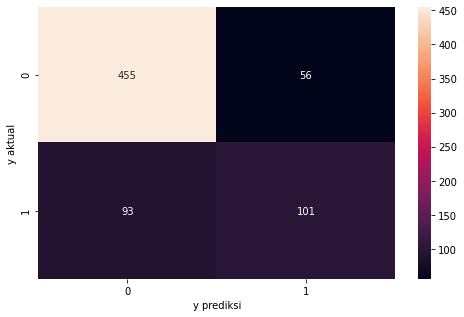

In [1257]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yXGB_test,y_predXGB),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1258]:
print(classification_report(yXGB_test,y_predXGB))

precision    recall  f1-score   support

           0       0.83      0.89      0.86       511
           1       0.64      0.52      0.58       194

    accuracy                           0.79       705
   macro avg       0.74      0.71      0.72       705
weighted avg       0.78      0.79      0.78       705



In [1259]:
pd.DataFrame(data= [accuracy_score(yXGB_test,y_predXGB)*100,recall_score(yXGB_test,y_predXGB)*100,precision_score(yXGB_test,y_predXGB)*100,roc_auc_score(yXGB_test,y_predXGB)*100,f1_score(yXGB_test,y_predXGB)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       78.865248
recall         52.061856
precission     64.331210
roc_auc_score  70.551476
F1 Score       57.549858

### All Feature without Parameter Tuning and without Scalling train 80

In [1260]:
modelXGB1 = XGBClassifier()
modelXGB1.fit(xXGB1_train,yXGB1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1261]:
 #10 Folds Cross Validation 
clf_scoreXGB1 = cross_val_score(modelXGB1, xXGB1_train, yXGB1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1262]:
y_predXGB1 = modelXGB1.predict(xXGB1_test)

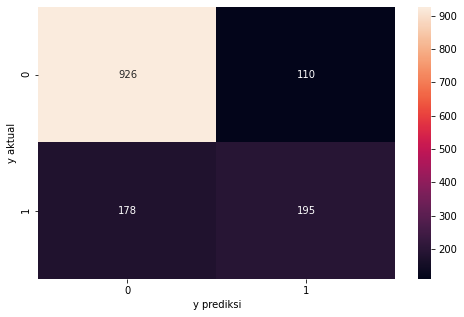

In [1263]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yXGB1_test,y_predXGB1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1264]:
print(classification_report(yXGB1_test,y_predXGB1))

precision    recall  f1-score   support

           0       0.84      0.89      0.87      1036
           1       0.64      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [1265]:
pd.DataFrame(data= [accuracy_score(yXGB1_test,y_predXGB1)*100,recall_score(yXGB1_test,y_predXGB1)*100,precision_score(yXGB1_test,y_predXGB1)*100,roc_auc_score(yXGB1_test,y_predXGB1)*100,f1_score(yXGB1_test,y_predXGB1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.559972
recall         52.278820
precission     63.934426
roc_auc_score  70.830530
F1 Score       57.522124

### All Feature with Parameter Tuning Random search and without Scalling train 90

In [1266]:
modelXGBRS = XGBClassifier(subsample= 0.6, n_estimators= 200, min_child_weight= 10, max_depth= 3, learning_rate= 0.2 , colsample_bytree=0.1, random_state=5)

modelXGBRS.fit(xXGB_train,yXGB_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1267]:
 #10 Folds Cross Validation 
clf_scoreXGBRS = cross_val_score(modelXGB, xXGB_train, yXGB_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1268]:
y_predXGBRS = modelXGBRS.predict(xXGB_test)

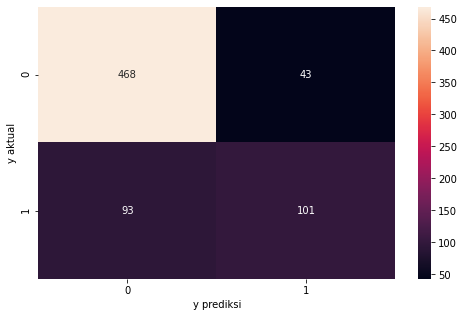

In [1269]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yXGB_test,y_predXGBRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1270]:
print(classification_report(yXGB_test,y_predXGBRS))

precision    recall  f1-score   support

           0       0.83      0.92      0.87       511
           1       0.70      0.52      0.60       194

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705



In [1271]:
pd.DataFrame(data= [accuracy_score(yXGB_test,y_predXGBRS)*100,recall_score(yXGB_test,y_predXGBRS)*100,precision_score(yXGB_test,y_predXGBRS)*100,roc_auc_score(yXGB_test,y_predXGBRS)*100,f1_score(yXGB_test,y_predXGBRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.709220
recall         52.061856
precission     70.138889
roc_auc_score  71.823491
F1 Score       59.763314

### All Feature with Parameter Tuning Random search and without Scalling train 80

In [1272]:
modelXGBRS1 = XGBClassifier(subsample= 1.0, n_estimators= 200, min_child_weight= 1, max_depth= 4, learning_rate= 0.02 , gamma= 0.1, colsample_bytree=0.8, random_state=5, reg_alpha=0,reg_lambda=1)

modelXGBRS1.fit(xXGB1_train,yXGB1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1273]:
 #10 Folds Cross Validation 
clf_scoreXGBRS80 = cross_val_score(modelXGB1, xXGB1_train, yXGB1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1274]:
y_predXGBRS1 = modelXGBRS1.predict(xXGB1_test)

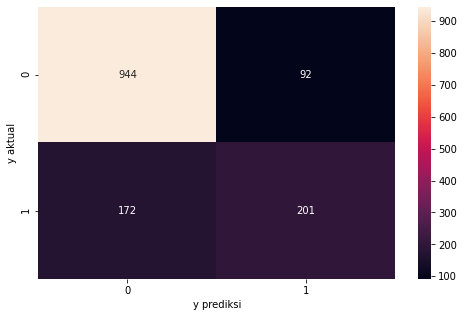

In [1275]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yXGB1_test,y_predXGBRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1276]:
print(classification_report(yXGB1_test,y_predXGBRS1))

precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [1277]:
pd.DataFrame(data= [accuracy_score(yXGB1_test,y_predXGBRS1)*100,recall_score(yXGB1_test,y_predXGBRS1)*100,precision_score(yXGB1_test,y_predXGBRS1)*100,roc_auc_score(yXGB1_test,y_predXGBRS1)*100,f1_score(yXGB1_test,y_predXGBRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.263307
recall         53.887399
precission     68.600683
roc_auc_score  72.503545
F1 Score       60.360360

### All Feature without Parameter Tuning Random search but with Scalling train 90

In [1278]:
xscalXG = df2_Scal.drop(["Churn"],axis=1)
yscalXG = df2_Scal["Churn"]

In [1279]:
xscalXG_train, xscalXG_test, yscalXG_train, yscalXG_test = train_test_split(xscalXG, yscalXG, test_size = 0.1, random_state = 42)

In [1280]:
xscalXG1_train, xscalXG1_test, yscalXG1_train, yscalXG1_test = train_test_split(xscalXG, yscalXG, test_size = 0.2, random_state = 42)

In [1281]:
modelXGBscal = XGBClassifier()

modelXGBscal.fit(xscalXG_train,yscalXG_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1282]:
 #10 Folds Cross Validation 
clf_scoreXGBscal = cross_val_score(modelXGBscal, xscalXG_train, yscalXG_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1283]:
y_predXGBscal = modelXGBscal.predict(xscalXG_test)

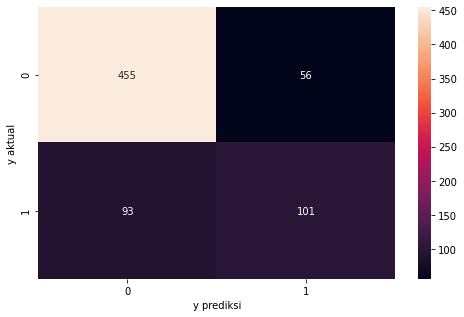

In [1284]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalXG_test,y_predXGBscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1285]:
print(classification_report(yscalXG_test,y_predXGBscal))

precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       511
         1.0       0.64      0.52      0.58       194

    accuracy                           0.79       705
   macro avg       0.74      0.71      0.72       705
weighted avg       0.78      0.79      0.78       705



In [1286]:
pd.DataFrame(data= [accuracy_score(yscalXG_test,y_predXGBscal)*100,recall_score(yscalXG_test,y_predXGBscal)*100,precision_score(yscalXG_test,y_predXGBscal)*100,roc_auc_score(yscalXG_test,y_predXGBscal)*100,f1_score(yscalXG_test,y_predXGBscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       78.865248
recall         52.061856
precission     64.331210
roc_auc_score  70.551476
F1 Score       57.549858

### All Feature without Parameter Tuning Random search but with Scalling train 80

In [1287]:
modelXGBscal1 = XGBClassifier()

modelXGBscal1.fit(xscalXG1_train,yscalXG1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1288]:
 #10 Folds Cross Validation 
clf_scoreXGBscal80 = cross_val_score(modelXGBscal1, xscalXG1_train, yscalXG1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1289]:
y_predXGBscal1 = modelXGBscal1.predict(xscalXG1_test)

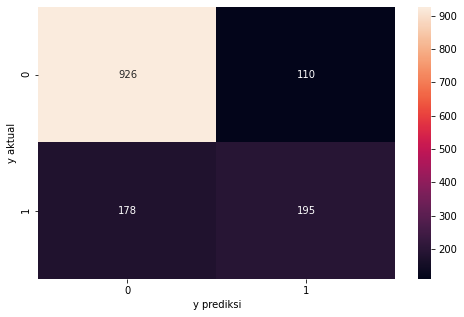

In [1290]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalXG1_test,y_predXGBscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1291]:
print(classification_report(yscalXG1_test,y_predXGBscal1))

precision    recall  f1-score   support

         0.0       0.84      0.89      0.87      1036
         1.0       0.64      0.52      0.58       373

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [1292]:
pd.DataFrame(data= [accuracy_score(yscalXG1_test,y_predXGBscal1)*100,recall_score(yscalXG1_test,y_predXGBscal1)*100,precision_score(yscalXG1_test,y_predXGBscal1)*100,roc_auc_score(yscalXG1_test,y_predXGBscal1)*100,f1_score(yscalXG1_test,y_predXGBscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.559972
recall         52.278820
precission     63.934426
roc_auc_score  70.830530
F1 Score       57.522124

### All Feature with Parameter Tuning Random search and with Scalling train 90

In [1293]:
modelXGBRSscal = XGBClassifier(subsample= 0.8, n_estimators= 200, min_child_weight= 1, max_depth= 5, learning_rate= 0.02 , gamma= 5, colsample_bytree=0.6,random_state=5)

modelXGBRSscal.fit(xscalXG_train,yscalXG_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1294]:
 #10 Folds Cross Validation 
clf_scoreXGBRSscal = cross_val_score(modelXGBRSscal, xscalXG_train, yscalXG_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1295]:
y_predXGBRSscal = modelXGBRSscal.predict(xscalXG_test)

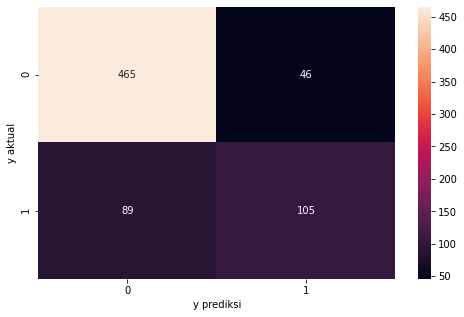

In [1296]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalXG_test,y_predXGBRSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1297]:
print(classification_report(yscalXG_test,y_predXGBRSscal))

precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       511
         1.0       0.70      0.54      0.61       194

    accuracy                           0.81       705
   macro avg       0.77      0.73      0.74       705
weighted avg       0.80      0.81      0.80       705



In [1298]:
pd.DataFrame(data= [accuracy_score(yscalXG_test,y_predXGBRSscal)*100,recall_score(yscalXG_test,y_predXGBRSscal)*100,precision_score(yscalXG_test,y_predXGBRSscal)*100,roc_auc_score(yscalXG_test,y_predXGBRSscal)*100,f1_score(yscalXG_test,y_predXGBRSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.851064
recall         54.123711
precission     69.536424
roc_auc_score  72.560877
F1 Score       60.869565

### All Feature with Parameter Tuning Random search and with Scalling train 80

In [1299]:
modelXGBRSscal1 = XGBClassifier(subsample= 0.8, n_estimators= 500, min_child_weight= 7, max_depth= 10, learning_rate= 0.01 , gamma= 5, colsample_bytree=0.6,random_state=5)

modelXGBRSscal1.fit(xscalXG1_train,yscalXG1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1300]:
 #10 Folds Cross Validation 
clf_scoreXGBRSscal80 = cross_val_score(modelXGBRSscal1, xscalXG1_train, yscalXG1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1301]:
y_predXGBRSscal1 = modelXGBRSscal1.predict(xscalXG1_test)

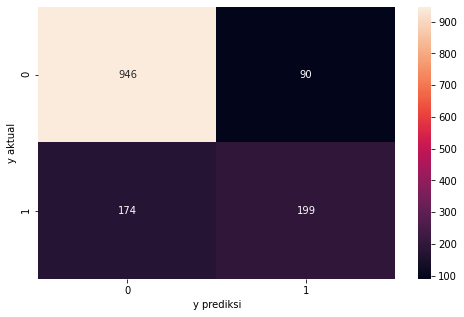

In [1302]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalXG1_test,y_predXGBRSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1303]:
print(classification_report(yscalXG1_test,y_predXGBRSscal1))

precision    recall  f1-score   support

         0.0       0.84      0.91      0.88      1036
         1.0       0.69      0.53      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [1304]:
pd.DataFrame(data= [accuracy_score(yscalXG1_test,y_predXGBRSscal1)*100,recall_score(yscalXG1_test,y_predXGBRSscal1)*100,precision_score(yscalXG1_test,y_predXGBRSscal1)*100,roc_auc_score(yscalXG1_test,y_predXGBRSscal1)*100,f1_score(yscalXG1_test,y_predXGBRSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.263307
recall         53.351206
precission     68.858131
roc_auc_score  72.331974
F1 Score       60.120846

### Feature Selection without Parameter Tuning and without Scalling train 90

In [1305]:
x_selXG = df2[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
y_selXG  = df2["Churn"]

In [1306]:
xselXG_train, xselXG_test, yselXG_train, yselXG_test = train_test_split(x_selXG, y_selXG, test_size = 0.1, random_state = 42)

In [1307]:
xselXG1_train, xselXG1_test, yselXG1_train, yselXG1_test = train_test_split(x_selXG, y_selXG, test_size = 0.2, random_state = 42)

In [1308]:
modelXGBsel = XGBClassifier()

modelXGBsel.fit(xselXG_train,yselXG_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1309]:
 #10 Folds Cross Validation 
clf_scoreXGBscal = cross_val_score(modelXGBsel, xselXG_train, yselXG_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1310]:
y_predXGBsel = modelXGBsel.predict(xselXG_test)

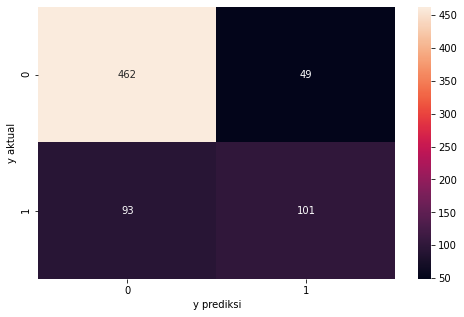

In [1311]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXG_test,y_predXGBsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1312]:
print(classification_report(yselXG_test,y_predXGBsel))

precision    recall  f1-score   support

           0       0.83      0.90      0.87       511
           1       0.67      0.52      0.59       194

    accuracy                           0.80       705
   macro avg       0.75      0.71      0.73       705
weighted avg       0.79      0.80      0.79       705



In [1313]:
pd.DataFrame(data= [accuracy_score(yselXG_test,y_predXGBsel)*100,recall_score(yselXG_test,y_predXGBsel)*100,precision_score(yselXG_test,y_predXGBsel)*100,roc_auc_score(yselXG_test,y_predXGBsel)*100,f1_score(yselXG_test,y_predXGBsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.858156
recall         52.061856
precission     67.333333
roc_auc_score  71.236407
F1 Score       58.720930

### Feature Selection without Parameter Tuning and without Scalling train 80

In [1314]:
modelXGBsel1 = XGBClassifier()

modelXGBsel1.fit(xselXG1_train,yselXG1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1315]:
 #10 Folds Cross Validation 
clf_scoreXGBscal80 = cross_val_score(modelXGBsel1, xselXG1_train, yselXG1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1316]:
y_predXGBsel1 = modelXGBsel1.predict(xselXG1_test)

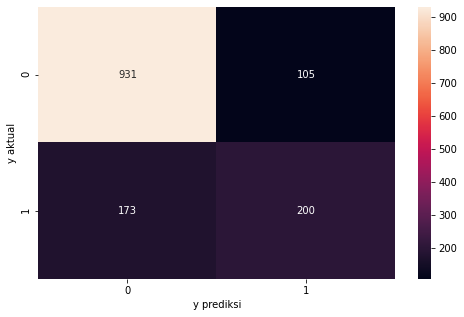

In [1317]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXG1_test,y_predXGBsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1318]:
print(classification_report(yselXG1_test,y_predXGBsel1))

precision    recall  f1-score   support

           0       0.84      0.90      0.87      1036
           1       0.66      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [1319]:
pd.DataFrame(data= [accuracy_score(yselXG1_test,y_predXGBsel1)*100,recall_score(yselXG1_test,y_predXGBsel1)*100,precision_score(yselXG1_test,y_predXGBsel1)*100,roc_auc_score(yselXG1_test,y_predXGBsel1)*100,f1_score(yselXG1_test,y_predXGBsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.269695
recall         53.619303
precission     65.573770
roc_auc_score  71.742084
F1 Score       58.997050

### Feature Selection with Parameter and without Scalling train 90

In [1320]:
modelXGBRSsel = XGBClassifier(subsample= 0.8, n_estimators= 200, min_child_weight= 7, max_depth= 4, learning_rate= 0.2 ,gamma=1.5, colsample_bytree=0.8)

modelXGBRSsel.fit(xselXG_train,yselXG_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1321]:
  #10 Folds Cross Validation 
clf_scoreXGBRSsel = cross_val_score(modelXGBRSsel, xselXG_train, yselXG_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1322]:
y_predXGBRSsel = modelXGBRSsel.predict(xselXG_test)

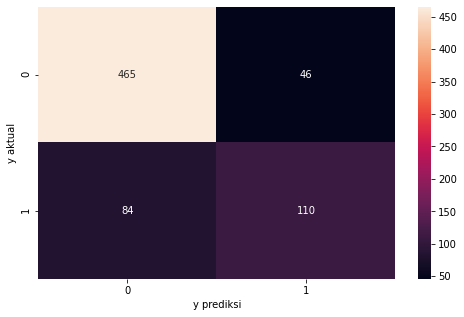

In [1323]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXG_test,y_predXGBRSsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1324]:
print(classification_report(yselXG_test,y_predXGBRSsel))

precision    recall  f1-score   support

           0       0.85      0.91      0.88       511
           1       0.71      0.57      0.63       194

    accuracy                           0.82       705
   macro avg       0.78      0.74      0.75       705
weighted avg       0.81      0.82      0.81       705



In [1325]:
pd.DataFrame(data= [accuracy_score(yselXG_test,y_predXGBRSsel)*100,recall_score(yselXG_test,y_predXGBRSsel)*100,precision_score(yselXG_test,y_predXGBRSsel)*100,roc_auc_score(yselXG_test,y_predXGBRSsel)*100,f1_score(yselXG_test,y_predXGBRSsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.560284
recall         56.701031
precission     70.512821
roc_auc_score  73.849537
F1 Score       62.857143

### Feature Selection with Parameter and without Scalling train 80

In [1326]:
modelXGBRSsel1 = XGBClassifier(subsample= 0.6, n_estimators= 200, min_child_weight= 10, max_depth= 4, learning_rate= 0.2 ,gamma=0.5, colsample_bytree=0.8)

modelXGBRSsel1.fit(xselXG_train,yselXG_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1327]:
  #10 Folds Cross Validation 
clf_scoreXGBRSsel80 = cross_val_score(modelXGBRSsel1, xselXG1_train, yselXG1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1328]:
y_predXGBRSsel1 = modelXGBRSsel1.predict(xselXG1_test)

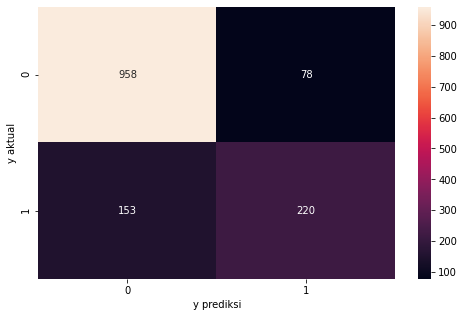

In [1329]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXG1_test,y_predXGBRSsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1330]:
BestXGB = pd.DataFrame(classification_report(yselXG1_test,y_predXGBRSsel1, target_names= labels, output_dict=True)).T

In [1331]:
print(classification_report(yselXG1_test,y_predXGBRSsel1))

precision    recall  f1-score   support

           0       0.86      0.92      0.89      1036
           1       0.74      0.59      0.66       373

    accuracy                           0.84      1409
   macro avg       0.80      0.76      0.77      1409
weighted avg       0.83      0.84      0.83      1409



In [1332]:
pd.DataFrame(data= [accuracy_score(yselXG1_test,y_predXGBRSsel1)*100,recall_score(yselXG1_test,y_predXGBRSsel1)*100,precision_score(yselXG1_test,y_predXGBRSsel1)*100,roc_auc_score(yselXG1_test,y_predXGBRSsel1)*100,f1_score(yselXG1_test,y_predXGBRSsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       83.605394
recall         58.981233
precission     73.825503
roc_auc_score  75.726138
F1 Score       65.573770

### Feature Selection without Parameter and with Scalling train 90

In [1333]:
x_selXGBScal = df2_Scal[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
y_selXGBScal  = df2_Scal["Churn"]

In [1334]:
xselXGBscal_train, xselXGBscal_test, yselXGBscal_train, yselXGBscal_test = train_test_split(x_selXGBScal, y_selXGBScal, test_size = 0.1, random_state = 42)

In [1335]:
xselXGBscal1_train, xselXGBscal1_test, yselXGBscal1_train, yselXGBscal1_test = train_test_split(x_selXGBScal, y_selXGBScal, test_size = 0.2, random_state = 42)

In [1336]:
modelXGBselscal = XGBClassifier()

modelXGBselscal.fit(xselXGBscal_train,yselXGBscal_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1337]:
  #10 Folds Cross Validation 
clf_scoreXGBselscal = cross_val_score(modelXGBselscal, xselXGBscal_train, yselXGBscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1338]:
y_predXGBselscal = modelXGBselscal.predict(xselXGBscal_test)

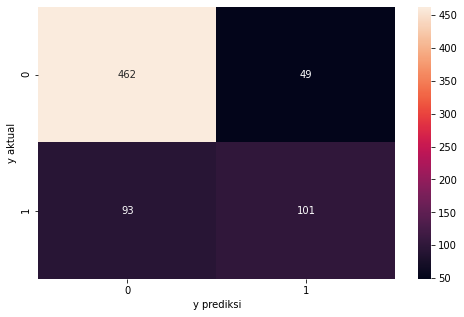

In [1339]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXGBscal_test,y_predXGBselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1340]:
print(classification_report(yselXGBscal_test,y_predXGBselscal))

precision    recall  f1-score   support

         0.0       0.83      0.90      0.87       511
         1.0       0.67      0.52      0.59       194

    accuracy                           0.80       705
   macro avg       0.75      0.71      0.73       705
weighted avg       0.79      0.80      0.79       705



In [1341]:
pd.DataFrame(data= [accuracy_score(yselXGBscal_test,y_predXGBselscal)*100,recall_score(yselXGBscal_test,y_predXGBselscal)*100,precision_score(yselXGBscal_test,y_predXGBselscal)*100,roc_auc_score(yselXGBscal_test,y_predXGBselscal)*100,f1_score(yselXGBscal_test,y_predXGBselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.858156
recall         52.061856
precission     67.333333
roc_auc_score  71.236407
F1 Score       58.720930

### Feature Selection without Parameter and with Scalling train 80

In [1342]:
modelXGBselscal1 = XGBClassifier()

modelXGBselscal1.fit(xselXGBscal1_train,yselXGBscal1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1343]:
  #10 Folds Cross Validation 
clf_scoreXGBselscal80 = cross_val_score(modelXGBselscal1, xselXGBscal1_train, yselXGBscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1344]:
y_predXGBselscal1 = modelXGBselscal1.predict(xselXGBscal1_test)

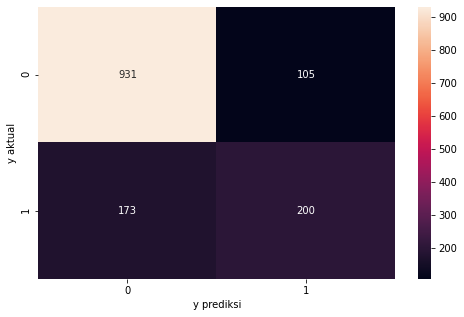

In [1345]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXGBscal1_test,y_predXGBselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1346]:
print(classification_report(yselXGBscal1_test,y_predXGBselscal1))

precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      1036
         1.0       0.66      0.54      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [1347]:
pd.DataFrame(data= [accuracy_score(yselXGBscal1_test,y_predXGBselscal1)*100,recall_score(yselXGBscal1_test,y_predXGBselscal1)*100,precision_score(yselXGBscal1_test,y_predXGBselscal1)*100,roc_auc_score(yselXGBscal1_test,y_predXGBselscal1)*100,f1_score(yselXGBscal1_test,y_predXGBselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.269695
recall         53.619303
precission     65.573770
roc_auc_score  71.742084
F1 Score       58.997050

### Feature Selection with Parameter Tuning Random Search but with Scalling train 90

In [1348]:
modelXGBRSselscal = XGBClassifier(subsample= 0.8, n_estimators= 200, min_child_weight= 7, max_depth= 5, learning_rate= 0.01 ,gamma=1, colsample_bytree=0.8)

modelXGBRSselscal.fit(xselXGBscal_train,yselXGBscal_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1349]:
  #10 Folds Cross Validation 
clf_scoreXGBRSselscal = cross_val_score(modelXGBRSselscal, xselXGBscal_train, yselXGBscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1350]:
y_predXGBRSselscal = modelXGBRSselscal.predict(xselXGBscal_test)

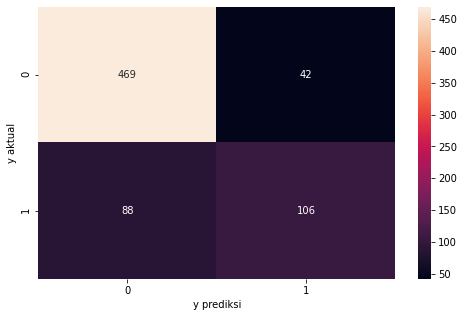

In [1351]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXGBscal_test,y_predXGBRSselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1352]:
print(classification_report(yselXGBscal_test,y_predXGBRSselscal))

precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       511
         1.0       0.72      0.55      0.62       194

    accuracy                           0.82       705
   macro avg       0.78      0.73      0.75       705
weighted avg       0.81      0.82      0.81       705



In [1353]:
pd.DataFrame(data= [accuracy_score(yselXGBscal_test,y_predXGBRSselscal)*100,recall_score(yselXGBscal_test,y_predXGBRSselscal)*100,precision_score(yselXGBscal_test,y_predXGBRSselscal)*100,roc_auc_score(yselXGBscal_test,y_predXGBRSselscal)*100,f1_score(yselXGBscal_test,y_predXGBRSselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.560284
recall         54.639175
precission     71.621622
roc_auc_score  73.209999
F1 Score       61.988304

### Feature Selection with Parameter Tuning Random Search but with Scalling train 80

In [1354]:
modelXGBRSselscal1 = XGBClassifier(subsample= 0.8, n_estimators= 100, min_child_weight= 10, max_depth= 3, learning_rate= 0.1 ,gamma=0.5, colsample_bytree=0.8)

modelXGBRSselscal1.fit(xselXGBscal1_train,yselXGBscal1_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1355]:
  #10 Folds Cross Validation 
clf_scoreXGBRSselscal1 = cross_val_score(modelXGBRSselscal1, xselXGBscal1_train, yselXGBscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1356]:
y_predXGBRSselscal1 = modelXGBRSselscal1.predict(xselXGBscal1_test)

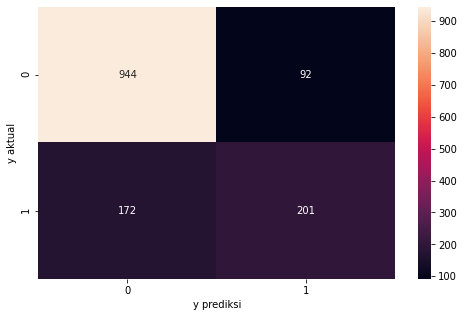

In [1357]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselXGBscal1_test,y_predXGBRSselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1358]:
print(classification_report(yselXGBscal1_test,y_predXGBRSselscal1))

precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1036
         1.0       0.69      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [1359]:
pd.DataFrame(data= [accuracy_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,recall_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,precision_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,roc_auc_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,f1_score(yselXGBscal1_test,y_predXGBRSselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.263307
recall         53.887399
precission     68.600683
roc_auc_score  72.503545
F1 Score       60.360360

In [1360]:
XGB_Summary = pd.DataFrame({"XGB": ["accuracy","recall","precision","roc_auc_score","f1_score"],
                                "All Feature without Parameter Tuning and without Scalling train 90": [accuracy_score(yXGB_test,y_predXGB)*100,recall_score(yXGB_test,y_predXGB)*100,precision_score(yXGB_test,y_predXGB)*100,roc_auc_score(yXGB_test,y_predXGB)*100,f1_score(yXGB_test,y_predXGB)*100],
                                 "All Feature without Parameter Tuning and without Scalling train 80":[accuracy_score(yXGB1_test,y_predXGB1)*100,recall_score(yXGB1_test,y_predXGB1)*100,precision_score(yXGB1_test,y_predXGB1)*100,roc_auc_score(yXGB1_test,y_predXGB1)*100,f1_score(yXGB1_test,y_predXGB1)*100],
                                 "All Feature with Parameter Tuning Random Search and without Scalling train 90": [accuracy_score(yXGB_test,y_predXGBRS)*100,recall_score(yXGB_test,y_predXGBRS)*100,precision_score(yXGB_test,y_predXGBRS)*100,roc_auc_score(yXGB_test,y_predXGBRS)*100,f1_score(yXGB_test,y_predXGBRS)*100],
                                 "All Feature with Parameter Tuning Random Search and without Scalling train 80":[accuracy_score(yXGB1_test,y_predXGBRS1)*100,recall_score(yXGB1_test,y_predXGBRS1)*100,precision_score(yXGB1_test,y_predXGBRS1)*100,roc_auc_score(yXGB1_test,y_predXGBRS1)*100,f1_score(yXGB1_test,y_predXGBRS1)*100],
                                 "All Feature without Parameter Tuning Random search but with Scalling train 90":[accuracy_score(yscalXG_test,y_predXGBscal)*100,recall_score(yscalXG_test,y_predXGBscal)*100,precision_score(yscalXG_test,y_predXGBscal)*100,roc_auc_score(yscalXG_test,y_predXGBscal)*100,f1_score(yscalXG_test,y_predXGBscal)*100],
                                 "All Feature without Parameter Tuning Random search but with Scalling train 80":[accuracy_score(yscalXG1_test,y_predXGBscal1)*100,recall_score(yscalXG1_test,y_predXGBscal1)*100,precision_score(yscalXG1_test,y_predXGBscal1)*100,roc_auc_score(yscalXG1_test,y_predXGBscal1)*100,f1_score(yscalXG1_test,y_predXGBscal1)*100],
                                 "All Feature with Parameter Tuning Random search and with Scalling train 90":[accuracy_score(yscalXG_test,y_predXGBRSscal)*100,recall_score(yscalXG_test,y_predXGBRSscal)*100,precision_score(yscalXG_test,y_predXGBRSscal)*100,roc_auc_score(yscalXG_test,y_predXGBRSscal)*100,f1_score(yscalXG_test,y_predXGBRSscal)*100],
                                 "All Feature with Parameter Tuning Random search and with Scalling train 80":[accuracy_score(yscalXG1_test,y_predXGBRSscal1)*100,recall_score(yscalXG1_test,y_predXGBRSscal1)*100,precision_score(yscalXG1_test,y_predXGBRSscal1)*100,roc_auc_score(yscalXG1_test,y_predXGBRSscal1)*100,f1_score(yscalXG1_test,y_predXGBRSscal1)*100],
                                 "Feature Selection without Parameter Tuning and without Scalling train 90":[accuracy_score(yselXG_test,y_predXGBsel)*100,recall_score(yselXG_test,y_predXGBsel)*100,precision_score(yselXG_test,y_predXGBsel)*100,roc_auc_score(yselXG_test,y_predXGBsel)*100,f1_score(yselXG_test,y_predXGBsel)*100],
                                 "Feature Selection without Parameter Tuning and without Scalling train 80":[accuracy_score(yselXG1_test,y_predXGBsel1)*100,recall_score(yselXG1_test,y_predXGBsel1)*100,precision_score(yselXG1_test,y_predXGBsel1)*100,roc_auc_score(yselXG1_test,y_predXGBsel1)*100,f1_score(yselXG1_test,y_predXGBsel1)*100],
                                  "Feature Selection with Parameter Tuning and without Scalling train 90":[accuracy_score(yselXG_test,y_predXGBRSsel)*100,recall_score(yselXG_test,y_predXGBRSsel)*100,precision_score(yselXG_test,y_predXGBRSsel)*100,roc_auc_score(yselXG_test,y_predXGBRSsel)*100,f1_score(yselXG_test,y_predXGBRSsel)*100],
                                   "Feature Selection with Parameter Tuning and without Scalling train 80":[accuracy_score(yselXG1_test,y_predXGBRSsel1)*100,recall_score(yselXG1_test,y_predXGBRSsel1)*100,precision_score(yselXG1_test,y_predXGBRSsel1)*100,roc_auc_score(yselXG1_test,y_predXGBRSsel1)*100,f1_score(yselXG1_test,y_predXGBRSsel1)*100],
                                   "Feature Selection without Parameter Tuning but with Scalling train 90":[accuracy_score(yselXGBscal_test,y_predXGBselscal)*100,recall_score(yselXGBscal_test,y_predXGBselscal)*100,precision_score(yselXGBscal_test,y_predXGBselscal)*100,roc_auc_score(yselXGBscal_test,y_predXGBselscal)*100,f1_score(yselXGBscal_test,y_predXGBselscal)*100],
                                   "Feature Selection without Parameter Tuning but with Scalling train 80":[accuracy_score(yselXGBscal1_test,y_predXGBselscal1)*100,recall_score(yselXGBscal1_test,y_predXGBselscal1)*100,precision_score(yselXGBscal1_test,y_predXGBselscal1)*100,roc_auc_score(yselXGBscal1_test,y_predXGBselscal1)*100,f1_score(yselXGBscal1_test,y_predXGBselscal1)*100],
                                   "Feature Selection with Parameter Tuning but with Scalling train 90": [accuracy_score(yselXGBscal_test,y_predXGBRSselscal)*100,recall_score(yselXGBscal_test,y_predXGBRSselscal)*100,precision_score(yselXGBscal_test,y_predXGBRSselscal)*100,roc_auc_score(yselXGBscal_test,y_predXGBRSselscal)*100,f1_score(yselXGBscal_test,y_predXGBRSselscal)*100],
                                   "Feature Selection with Parameter Tuning but with Scalling train 80":[accuracy_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,recall_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,precision_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,roc_auc_score(yselXGBscal1_test,y_predXGBRSselscal1)*100,f1_score(yselXGBscal1_test,y_predXGBRSselscal1)*100]






})
d = XGB_Summary.set_index("XGB").T
d 

XGB                                                  accuracy     recall  \
All Feature without Parameter Tuning and withou...  78.865248  52.061856   
All Feature without Parameter Tuning and withou...  79.559972  52.278820   
All Feature with Parameter Tuning Random Search...  80.709220  52.061856   
All Feature with Parameter Tuning Random Search...  81.263307  53.887399   
All Feature without Parameter Tuning Random sea...  78.865248  52.061856   
All Feature without Parameter Tuning Random sea...  79.559972  52.278820   
All Feature with Parameter Tuning Random search...  80.851064  54.123711   
All Feature with Parameter Tuning Random search...  81.263307  53.351206   
Feature Selection without Parameter Tuning and ...  79.858156  52.061856   
Feature Selection without Parameter Tuning and ...  80.269695  53.619303   
Feature Selection with Parameter Tuning and wit...  81.560284  56.701031   
Feature Selection with Parameter Tuning and wit...  83.605394  58.981233   
Feature Selection without Parameter Tuning but ...  79.858156  52.061856   
Feature Selection without Parameter Tuning but ...  80.269695  53.619303   
Feature Selection with Parameter Tuning but wit...  81.560284  54.639175   
Feature Selection with Parameter Tuning but wit...  81.263307  53.887399   

XGB                                                 precision  roc_auc_score  \
All Feature without Parameter Tuning and withou...  64.331210      70.551476   
All Feature without Parameter Tuning and withou...  63.934426      70.830530   
All Feature with Parameter Tuning Random Search...  70.138889      71.823491   
All Feature with Parameter Tuning Random Search...  68.600683      72.503545   
All Feature without Parameter Tuning Random sea...  64.331210      70.551476   
All Feature without Parameter Tuning Random sea...  63.934426      70.830530   
All Feature with Parameter Tuning Random search...  69.536424      72.560877   
All Feature with Parameter Tuning Random search...  68.858131      72.331974   
Feature Selection without Parameter Tuning and ...  67.333333      71.236407   
Feature Selection without Parameter Tuning and ...  65.573770      71.742084   
Feature Selection with Parameter Tuning and wit...  70.512821      73.849537   
Feature Selection with Parameter Tuning and wit...  73.825503      75.726138   
Feature Selection without Parameter Tuning but ...  67.333333      71.236407   
Feature Selection without Parameter Tuning but ...  65.573770      71.742084   
Feature Selection with Parameter Tuning but wit...  71.621622      73.209999   
Feature Selection with Parameter Tuning but wit...  68.600683      72.503545   

XGB                                                  f1_score  
All Feature without Parameter Tuning and withou...  57.549858  
All Feature without Parameter Tuning and withou...  57.522124  
All Feature with Parameter Tuning Random Search...  59.763314  
All Feature with Parameter Tuning Random Search...  60.360360  
All Feature without Parameter Tuning Random sea...  57.549858  
All Feature without Parameter Tuning Random sea...  57.522124  
All Feature with Parameter Tuning Random search...  60.869565  
All Feature with Parameter Tuning Random search...  60.120846  
Feature Selection without Parameter Tuning and ...  58.720930  
Feature Selection without Parameter Tuning and ...  58.997050  
Feature Selection with Parameter Tuning and wit...  62.857143  
Feature Selection with Parameter Tuning and wit...  65.573770  
Feature Selection without Parameter Tuning but ...  58.720930  
Feature Selection without Parameter Tuning but ...  58.997050  
Feature Selection with Parameter Tuning but wit...  61.988304  
Feature Selection with Parameter Tuning but wit...  60.360360

## The Best Condition Model Test XGB : Feature Selection with Parameter Tuning and without Scalling train 80

In [1361]:
XGB_Summary = pd.DataFrame({"XGB": ["accuracy","recall","precision","roc_auc_score","f1_score"],"Feature Selection with Parameter Tuning and without Scalling train 80":[accuracy_score(yselXG1_test,y_predXGBRSsel1)*100,recall_score(yselXG1_test,y_predXGBRSsel1)*100,precision_score(yselXG1_test,y_predXGBRSsel1)*100,roc_auc_score(yselXG1_test,y_predXGBRSsel1)*100,f1_score(yselXG1_test,y_predXGBRSsel1)*100]})
XGB_Summary.set_index("XGB").T

XGB                                                  accuracy     recall  \
Feature Selection with Parameter Tuning and wit...  83.605394  58.981233   

XGB                                                 precision  roc_auc_score  \
Feature Selection with Parameter Tuning and wit...  73.825503      75.726138   

XGB                                                 f1_score  
Feature Selection with Parameter Tuning and wit...  65.57377

In [1362]:
BestXGB

precision    recall  f1-score      support
Not Churned    0.862286  0.924710  0.892408  1036.000000
Churned        0.738255  0.589812  0.655738   373.000000
accuracy       0.836054  0.836054  0.836054     0.836054
macro avg      0.800271  0.757261  0.774073  1409.000000
weighted avg   0.829452  0.836054  0.829755  1409.000000

# Gradient Boosting

In [1363]:
df_Grad = df2.copy()

In [1364]:
xGrad = df_Grad.drop(["Churn"],axis=1)
yGrad = df_Grad["Churn"]

In [1365]:
xGrad_train, xGrad_test, yGrad_train, yGrad_test = train_test_split(xGrad, yGrad, test_size = 0.1, random_state = 42)

In [1366]:
xGrad1_train, xGrad1_test, yGrad1_train, yGrad1_test = train_test_split(xGrad, yGrad, test_size = 0.2, random_state = 42)

### All Feature without Parameter Tuning and without Scalling train 90

In [1367]:
modelGrad = GradientBoostingClassifier()

modelGrad.fit(xGrad_train,yGrad_train)

GradientBoostingClassifier()

In [1368]:
  #10 Folds Cross Validation 
clf_scoreGrad= cross_val_score(modelGrad, xGrad_train, yGrad_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1369]:
y_predGrad = modelGrad.predict(xGrad_test)

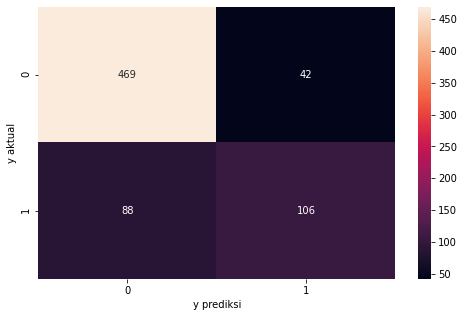

In [1370]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yGrad_test,y_predGrad),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1371]:
print(classification_report(yGrad_test,y_predGrad))

precision    recall  f1-score   support

           0       0.84      0.92      0.88       511
           1       0.72      0.55      0.62       194

    accuracy                           0.82       705
   macro avg       0.78      0.73      0.75       705
weighted avg       0.81      0.82      0.81       705



In [1372]:
pd.DataFrame(data= [accuracy_score(yGrad_test,y_predGrad)*100,recall_score(yGrad_test,y_predGrad)*100,precision_score(yGrad_test,y_predGrad)*100,roc_auc_score(yGrad_test,y_predGrad)*100,f1_score(yGrad_test,y_predGrad)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.560284
recall         54.639175
precission     71.621622
roc_auc_score  73.209999
F1 Score       61.988304

### All Feature without Parameter Tuning and without Scalling train 80

In [1373]:
modelGrad1 = GradientBoostingClassifier()

modelGrad1.fit(xGrad1_train,yGrad1_train)

GradientBoostingClassifier()

In [1374]:
  #10 Folds Cross Validation 
clf_scoreGrad1= cross_val_score(modelGrad1, xGrad1_train, yGrad1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1375]:
y_predGrad1 = modelGrad1.predict(xGrad1_test)

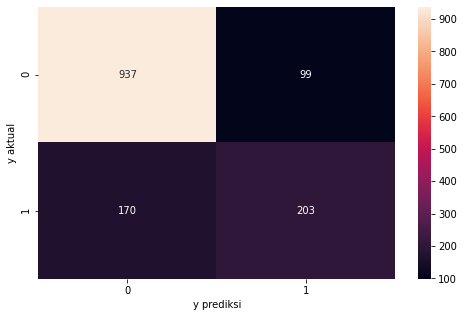

In [1376]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yGrad1_test,y_predGrad1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1377]:
print(classification_report(yGrad1_test,y_predGrad1))

precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [1378]:
pd.DataFrame(data= [accuracy_score(yGrad1_test,y_predGrad1)*100,recall_score(yGrad1_test,y_predGrad1)*100,precision_score(yGrad1_test,y_predGrad1)*100,roc_auc_score(yGrad1_test,y_predGrad1)*100,f1_score(yGrad1_test,y_predGrad1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.908446
recall         54.423592
precission     67.218543
roc_auc_score  72.433804
F1 Score       60.148148

### All Feature with Parameter Tuning and without Scalling train 90

In [1379]:
modelGradRS = GradientBoostingClassifier(learning_rate=1, max_depth=3,min_samples_leaf=9, n_estimators=5,random_state=500)

modelGradRS.fit(xGrad_train,yGrad_train)

GradientBoostingClassifier(learning_rate=1, min_samples_leaf=9, n_estimators=5,
                           random_state=500)

In [1380]:
  #10 Folds Cross Validation 
clf_scoreGradRS= cross_val_score(modelGradRS, xGrad_train, yGrad_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1381]:
y_predGradRS = modelGradRS.predict(xGrad_test)

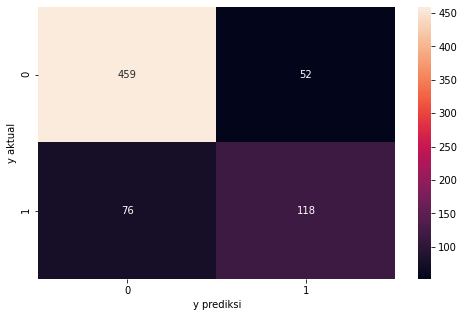

In [1382]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yGrad_test,y_predGradRS),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1488]:
BestGrad = pd.DataFrame(classification_report(yGrad_test,y_predGradRS, target_names= labels, output_dict=True)).T

In [1383]:
print(classification_report(yGrad_test,y_predGradRS))

precision    recall  f1-score   support

           0       0.86      0.90      0.88       511
           1       0.69      0.61      0.65       194

    accuracy                           0.82       705
   macro avg       0.78      0.75      0.76       705
weighted avg       0.81      0.82      0.81       705



In [1384]:
pd.DataFrame(data= [accuracy_score(yGrad_test,y_predGradRS)*100,recall_score(yGrad_test,y_predGradRS)*100,precision_score(yGrad_test,y_predGradRS)*100,roc_auc_score(yGrad_test,y_predGradRS)*100,f1_score(yGrad_test,y_predGradRS)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.843972
recall         60.824742
precission     69.411765
roc_auc_score  75.324309
F1 Score       64.835165

### All Feature with Parameter Tuning Random Search and without Scalling train 80

In [1385]:
modelGradRS1 = GradientBoostingClassifier(learning_rate=0.1, max_depth=1,min_samples_leaf=1, n_estimators=50,random_state=100)

modelGradRS1.fit(xGrad1_train,yGrad1_train)

GradientBoostingClassifier(max_depth=1, n_estimators=50, random_state=100)

In [1386]:
  #10 Folds Cross Validation 
clf_scoreGradRS1= cross_val_score(modelGradRS1, xGrad1_train, yGrad1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1387]:
y_predGradRS1 = modelGradRS1.predict(xGrad1_test)

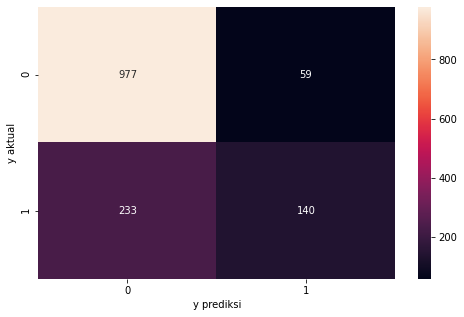

In [1388]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yGrad1_test,y_predGradRS1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1389]:
print(classification_report(yGrad1_test,y_predGradRS1))

precision    recall  f1-score   support

           0       0.81      0.94      0.87      1036
           1       0.70      0.38      0.49       373

    accuracy                           0.79      1409
   macro avg       0.76      0.66      0.68      1409
weighted avg       0.78      0.79      0.77      1409



In [1390]:
pd.DataFrame(data= [accuracy_score(yGrad1_test,y_predGradRS1)*100,recall_score(yGrad1_test,y_predGradRS1)*100,precision_score(yGrad1_test,y_predGradRS1)*100,roc_auc_score(yGrad1_test,y_predGradRS1)*100,f1_score(yGrad1_test,y_predGradRS1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.276082
recall         37.533512
precission     70.351759
roc_auc_score  65.919266
F1 Score       48.951049

### All Feature without Parameter Tuning Random Search but with Scalling train 90

In [1391]:
xscalGrad = df2_Scal.drop(["Churn"],axis=1)
yscalGrad = df2_Scal["Churn"]

In [1392]:
xscalGrad_train, xscalGrad_test, yscalGrad_train, yscalGrad_test = train_test_split(xscalGrad, yscalGrad, test_size = 0.1, random_state = 42)

In [1393]:
xscalGrad1_train, xscalGrad1_test, yscalGrad1_train, yscalGrad1_test = train_test_split(xscalGrad, yscalGrad, test_size = 0.2, random_state = 42)

In [1394]:
modelGradscal = GradientBoostingClassifier()

modelGradscal.fit(xscalGrad_train,yscalGrad_train)

GradientBoostingClassifier()

In [1395]:
  #10 Folds Cross Validation 
clf_scoreGradscal= cross_val_score(modelGradscal, xscalGrad_train, yscalGrad_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1396]:
y_predGradscal = modelGradscal.predict(xscalGrad_test)

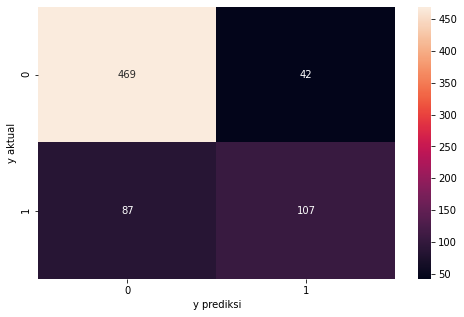

In [1397]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalGrad_test,y_predGradscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1398]:
print(classification_report(yscalGrad_test,y_predGradscal))

precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       511
         1.0       0.72      0.55      0.62       194

    accuracy                           0.82       705
   macro avg       0.78      0.73      0.75       705
weighted avg       0.81      0.82      0.81       705



In [1399]:
pd.DataFrame(data= [accuracy_score(yscalGrad_test,y_predGradscal)*100,recall_score(yscalGrad_test,y_predGradscal)*100,precision_score(yscalGrad_test,y_predGradscal)*100,roc_auc_score(yscalGrad_test,y_predGradscal)*100,f1_score(yscalGrad_test,y_predGradscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.702128
recall         55.154639
precission     71.812081
roc_auc_score  73.467731
F1 Score       62.390671

### All Feature without Parameter Tuning Random Search but with Scalling train 80

In [1400]:
modelGradscal1 = GradientBoostingClassifier()

modelGradscal1.fit(xscalGrad1_train,yscalGrad1_train)

GradientBoostingClassifier()

In [1401]:
  #10 Folds Cross Validation 
clf_scoreGradscal80= cross_val_score(modelGradscal1, xscalGrad1_train, yscalGrad1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1402]:
y_predGradscal1 = modelGradscal1.predict(xscalGrad1_test)

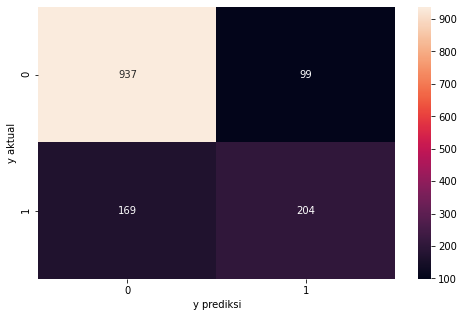

In [1403]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalGrad1_test,y_predGradscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1404]:
print(classification_report(yscalGrad1_test,y_predGradscal1))

precision    recall  f1-score   support

         0.0       0.85      0.90      0.87      1036
         1.0       0.67      0.55      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [1405]:
pd.DataFrame(data= [accuracy_score(yscalGrad1_test,y_predGradscal1)*100,recall_score(yscalGrad1_test,y_predGradscal1)*100,precision_score(yscalGrad1_test,y_predGradscal1)*100,roc_auc_score(yscalGrad1_test,y_predGradscal1)*100,f1_score(yscalGrad1_test,y_predGradscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.979418
recall         54.691689
precission     67.326733
roc_auc_score  72.567852
F1 Score       60.355030

### All Feature with Parameter Tuning Random Search and with Scalling train 90

In [1406]:
modelGradRSscal = GradientBoostingClassifier(learning_rate=0.01, max_depth=9,min_samples_leaf=7, n_estimators=500,random_state=500)

modelGradRSscal.fit(xscalGrad_train,yscalGrad_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=9, min_samples_leaf=7,
                           n_estimators=500, random_state=500)

In [1407]:
  #10 Folds Cross Validation 
clf_scoreGradRSscal= cross_val_score(modelGradRSscal, xscalGrad_train, yscalGrad_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1408]:
y_predGradRSscal = modelGradRSscal.predict(xscalGrad_test)

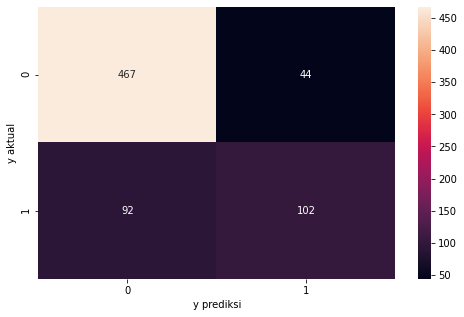

In [1409]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalGrad_test,y_predGradRSscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1410]:
print(classification_report(yscalGrad_test,y_predGradRSscal))

precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       511
         1.0       0.70      0.53      0.60       194

    accuracy                           0.81       705
   macro avg       0.77      0.72      0.74       705
weighted avg       0.80      0.81      0.80       705



In [1411]:
pd.DataFrame(data= [accuracy_score(yscalGrad_test,y_predGradRSscal)*100,recall_score(yscalGrad_test,y_predGradRSscal)*100,precision_score(yscalGrad_test,y_predGradRSscal)*100,roc_auc_score(yscalGrad_test,y_predGradRSscal)*100,f1_score(yscalGrad_test,y_predGradRSscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.709220
recall         52.577320
precission     69.863014
roc_auc_score  71.983376
F1 Score       60.000000

### All Feature with Parameter Tuning Random Search and with Scalling train 80

In [1412]:
modelGradRSscal1 = GradientBoostingClassifier(learning_rate=1, max_depth=1,min_samples_leaf=5, n_estimators=50,random_state=200)

modelGradRSscal1.fit(xscalGrad1_train,yscalGrad1_train)

GradientBoostingClassifier(learning_rate=1, max_depth=1, min_samples_leaf=5,
                           n_estimators=50, random_state=200)

In [1413]:
  #10 Folds Cross Validation 
clf_scoreGradRSscal80= cross_val_score(modelGradRSscal1, xscalGrad1_train, yscalGrad1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1414]:
y_predGradRSscal1 = modelGradRSscal1.predict(xscalGrad1_test)

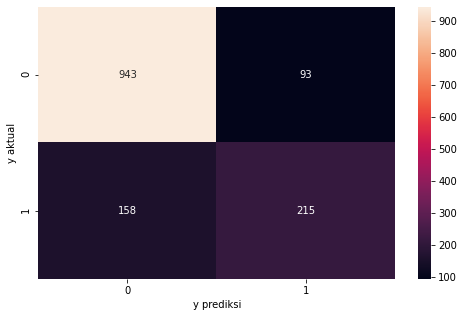

In [1415]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yscalGrad1_test,y_predGradRSscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1417]:
print(classification_report(yscalGrad1_test,y_predGradRSscal1))

precision    recall  f1-score   support

         0.0       0.86      0.91      0.88      1036
         1.0       0.70      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.74      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [1418]:
pd.DataFrame(data= [accuracy_score(yscalGrad1_test,y_predGradRSscal1)*100,recall_score(yscalGrad1_test,y_predGradRSscal1)*100,precision_score(yscalGrad1_test,y_predGradRSscal1)*100,roc_auc_score(yscalGrad1_test,y_predGradRSscal1)*100,f1_score(yscalGrad1_test,y_predGradRSscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       82.185947
recall         57.640751
precission     69.805195
roc_auc_score  74.331958
F1 Score       63.142438

### Feature Selection without Parameter Tuning Random Search and without Scalling train 90

In [1419]:
x_selGrad = df2[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
y_selGrad  = df2["Churn"]

In [1420]:
xselGrad_train, xselGrad_test, yselGrad_train, yselGrad_test = train_test_split(x_selGrad, y_selGrad, test_size = 0.1, random_state = 42)

In [1421]:
xselGrad1_train, xselGrad1_test, yselGrad1_train, yselGrad1_test = train_test_split(x_selGrad, y_selGrad, test_size = 0.2, random_state = 42)

In [1422]:
modelGradsel = GradientBoostingClassifier()

modelGradsel.fit(xselGrad_train,yselGrad_train)

GradientBoostingClassifier()

In [1423]:
  #10 Folds Cross Validation 
clf_scoreGradsel= cross_val_score(modelGradsel, xselGrad_train, yselGrad_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1424]:
y_predGradsel = modelGradsel.predict(xselGrad_test)

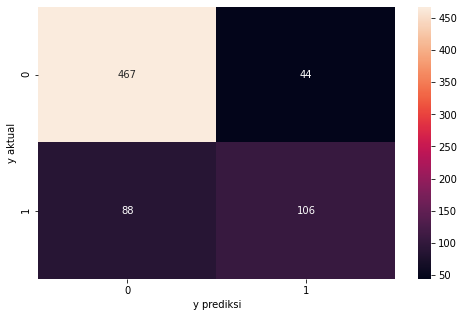

In [1425]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGrad_test,y_predGradsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1426]:
print(classification_report(yselGrad_test,y_predGradsel))

precision    recall  f1-score   support

           0       0.84      0.91      0.88       511
           1       0.71      0.55      0.62       194

    accuracy                           0.81       705
   macro avg       0.77      0.73      0.75       705
weighted avg       0.80      0.81      0.80       705



In [1427]:
pd.DataFrame(data= [accuracy_score(yselGrad_test,y_predGradsel)*100,recall_score(yselGrad_test,y_predGradsel)*100,precision_score(yselGrad_test,y_predGradsel)*100,roc_auc_score(yselGrad_test,y_predGradsel)*100,f1_score(yselGrad_test,y_predGradsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.276596
recall         54.639175
precission     70.666667
roc_auc_score  73.014304
F1 Score       61.627907

### Feature Selection without Parameter Tuning Random Search and without Scalling train 80

In [1428]:
modelGradsel1 = GradientBoostingClassifier()

modelGradsel1.fit(xselGrad1_train,yselGrad1_train)

GradientBoostingClassifier()

In [1429]:
  #10 Folds Cross Validation 
clf_scoreGradsel80= cross_val_score(modelGradsel1, xselGrad1_train, yselGrad1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1430]:
y_predGradsel1 = modelGradsel1.predict(xselGrad1_test)

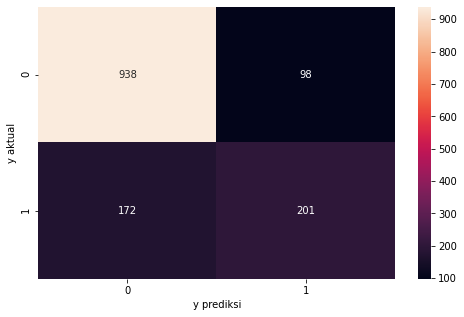

In [1431]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGrad1_test,y_predGradsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1432]:
print(classification_report(yselGrad1_test,y_predGradsel1))

precision    recall  f1-score   support

           0       0.85      0.91      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [1433]:
pd.DataFrame(data= [accuracy_score(yselGrad1_test,y_predGradsel1)*100,recall_score(yselGrad1_test,y_predGradsel1)*100,precision_score(yselGrad1_test,y_predGradsel1)*100,roc_auc_score(yselGrad1_test,y_predGradsel1)*100,f1_score(yselGrad1_test,y_predGradsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.837473
recall         53.887399
precission     67.224080
roc_auc_score  72.213970
F1 Score       59.821429

### Feature Selection with Parameter Tuning Random Search and without Scalling train 90

In [1434]:
modelGradRSsel = GradientBoostingClassifier(learning_rate=1, max_depth=1,min_samples_leaf=9, n_estimators=5,random_state=100)

modelGradRSsel.fit(xselGrad_train,yselGrad_train)

GradientBoostingClassifier(learning_rate=1, max_depth=1, min_samples_leaf=9,
                           n_estimators=5, random_state=100)

In [1435]:
  #10 Folds Cross Validation 
clf_scoreGradRSsel= cross_val_score(modelGradRSsel, xselGrad_train, yselGrad_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1436]:
y_predGradRSsel = modelGradRSsel.predict(xselGrad_test)

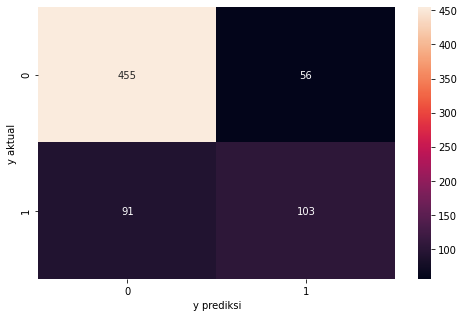

In [1437]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGrad_test,y_predGradRSsel),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1438]:
print(classification_report(yselGrad_test,y_predGradRSsel))

precision    recall  f1-score   support

           0       0.83      0.89      0.86       511
           1       0.65      0.53      0.58       194

    accuracy                           0.79       705
   macro avg       0.74      0.71      0.72       705
weighted avg       0.78      0.79      0.78       705



In [1439]:
pd.DataFrame(data= [accuracy_score(yselGrad_test,y_predGradRSsel)*100,recall_score(yselGrad_test,y_predGradRSsel)*100,precision_score(yselGrad_test,y_predGradRSsel)*100,roc_auc_score(yselGrad_test,y_predGradRSsel)*100,f1_score(yselGrad_test,y_predGradRSsel)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.148936
recall         53.092784
precission     64.779874
roc_auc_score  71.066940
F1 Score       58.356941

### Feature Selection with Parameter Tuning Random Search and without Scalling train 80

In [1440]:
modelGradRSsel1 = GradientBoostingClassifier(learning_rate=0.1, max_depth=5,min_samples_leaf=7, n_estimators=500,random_state=200)

modelGradRSsel1.fit(xselGrad1_train,yselGrad1_train)

GradientBoostingClassifier(max_depth=5, min_samples_leaf=7, n_estimators=500,
                           random_state=200)

In [1441]:
  #10 Folds Cross Validation 
clf_scoreGradRSsel80= cross_val_score(modelGradRSsel1, xselGrad1_train, yselGrad1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1442]:
y_predGradRSsel1 = modelGradRSsel1.predict(xselGrad1_test)

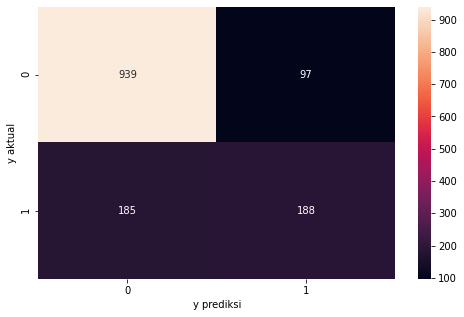

In [1443]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGrad1_test,y_predGradRSsel1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1444]:
print(classification_report(yselGrad1_test,y_predGradRSsel1))

precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.66      0.50      0.57       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [1445]:
pd.DataFrame(data= [accuracy_score(yselGrad1_test,y_predGradRSsel1)*100,recall_score(yselGrad1_test,y_predGradRSsel1)*100,precision_score(yselGrad1_test,y_predGradRSsel1)*100,roc_auc_score(yselGrad1_test,y_predGradRSsel1)*100,f1_score(yselGrad1_test,y_predGradRSsel1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       79.985806
recall         50.402145
precission     65.964912
roc_auc_score  70.519605
F1 Score       57.142857

### Feature Selection without Parameter Tuning but with Scalling train 90

In [1446]:
x_selGradScal = df2_Scal[["TotalChargesNum","tenure","MonthlyCharges","Contract_Month-to-month","Contract_Two year","PaymentMethod_Electronic check","OnlineSecurity_No","TechSupport_No","InternetService_Fiber optic","InternetService_No","gender"]]
y_selGradScal  = df2_Scal["Churn"]

In [1447]:
xselGradscal_train, xselGradscal_test, yselGradscal_train, yselGradscal_test = train_test_split(x_selGradScal, y_selGradScal, test_size = 0.1, random_state = 42)

In [1448]:
xselGradscal1_train, xselGradscal1_test, yselGradscal1_train, yselGradscal1_test = train_test_split(x_selGradScal, y_selGradScal, test_size = 0.2, random_state = 42)

In [1449]:
modelGradselscal = GradientBoostingClassifier()

modelGradselscal.fit(xselGradscal_train,yselGradscal_train)

GradientBoostingClassifier()

In [1450]:
  #10 Folds Cross Validation 
clf_scoreGradselscal= cross_val_score(modelGradselscal, xselGradscal_train, yselGradscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1451]:
y_predGradselscal = modelGradselscal.predict(xselGradscal_test)

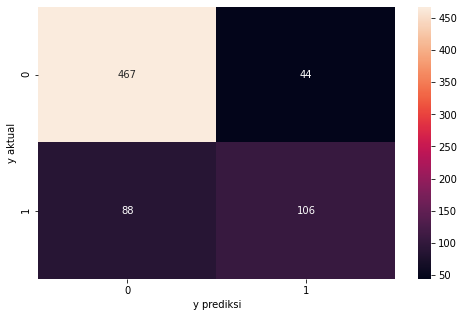

In [1452]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGradscal_test,y_predGradselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1453]:
print(classification_report(yselGradscal_test,y_predGradselscal))

precision    recall  f1-score   support

         0.0       0.84      0.91      0.88       511
         1.0       0.71      0.55      0.62       194

    accuracy                           0.81       705
   macro avg       0.77      0.73      0.75       705
weighted avg       0.80      0.81      0.80       705



In [1454]:
pd.DataFrame(data= [accuracy_score(yselGradscal_test,y_predGradselscal)*100,recall_score(yselGrad_test,y_predGradselscal)*100,precision_score(yselGradscal_test,y_predGradselscal)*100,roc_auc_score(yselGradscal_test,y_predGradselscal)*100,f1_score(yselGradscal_test,y_predGradselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.276596
recall         54.639175
precission     70.666667
roc_auc_score  73.014304
F1 Score       61.627907

### Feature Selection without Parameter Tuning but with Scalling train 80

In [1455]:
modelGradselscal1 = GradientBoostingClassifier()

modelGradselscal1.fit(xselGradscal1_train,yselGradscal1_train)

GradientBoostingClassifier()

In [1456]:
  #10 Folds Cross Validation 
clf_scoreGradselscal80= cross_val_score(modelGradselscal1, xselGradscal1_train, yselGradscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1457]:
y_predGradselscal1 = modelGradselscal1.predict(xselGradscal1_test)

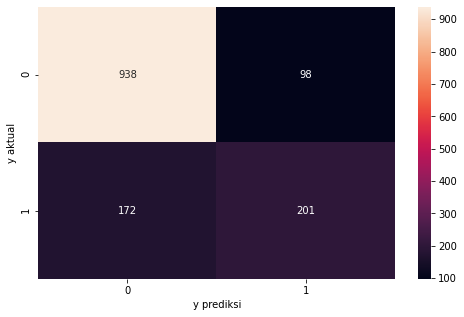

In [1458]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGradscal1_test,y_predGradselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1459]:
print(classification_report(yselGradscal1_test,y_predGradselscal1))

precision    recall  f1-score   support

         0.0       0.85      0.91      0.87      1036
         1.0       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [1460]:
pd.DataFrame(data= [accuracy_score(yselGradscal1_test,y_predGradselscal1)*100,recall_score(yselGrad1_test,y_predGradselscal1)*100,precision_score(yselGradscal1_test,y_predGradselscal1)*100,roc_auc_score(yselGradscal1_test,y_predGradselscal1)*100,f1_score(yselGradscal1_test,y_predGradselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.837473
recall         53.887399
precission     67.224080
roc_auc_score  72.213970
F1 Score       59.821429

### Feature Selection with Parameter Tuning Random Search and with Scalling train 90

In [1461]:
modelGradRSselscal = GradientBoostingClassifier(learning_rate=0.01, max_depth=5,min_samples_leaf=9, n_estimators=250,random_state=200)

modelGradRSselscal.fit(xselGradscal_train,yselGradscal_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=9,
                           n_estimators=250, random_state=200)

In [1462]:
  #10 Folds Cross Validation 
clf_scoreGradRSselscal= cross_val_score(modelGradRSselscal, xselGradscal_train, yselGradscal_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1463]:
y_predGradRSselscal = modelGradRSselscal.predict(xselGradscal_test)

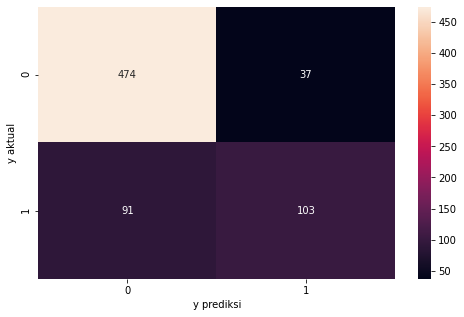

In [1464]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGradscal_test,y_predGradRSselscal),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1465]:
print(classification_report(yselGradscal_test,y_predGradRSselscal))

precision    recall  f1-score   support

         0.0       0.84      0.93      0.88       511
         1.0       0.74      0.53      0.62       194

    accuracy                           0.82       705
   macro avg       0.79      0.73      0.75       705
weighted avg       0.81      0.82      0.81       705



In [1466]:
pd.DataFrame(data= [accuracy_score(yselGradscal_test,y_predGradRSselscal)*100,recall_score(yselGrad_test,y_predGradRSselscal)*100,precision_score(yselGradscal_test,y_predGradRSselscal)*100,roc_auc_score(yselGradscal_test,y_predGradRSselscal)*100,f1_score(yselGradscal_test,y_predGradRSselscal)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       81.843972
recall         53.092784
precission     73.571429
roc_auc_score  72.926040
F1 Score       61.676647

### Feature Selection with Parameter Tuning Random Search and with Scalling train 80

In [1467]:
modelGradRSselscal1 = GradientBoostingClassifier(learning_rate=0.01, max_depth=3,min_samples_leaf=7, n_estimators=250,random_state=500)

modelGradRSselscal1.fit(xselGradscal1_train,yselGradscal1_train)

GradientBoostingClassifier(learning_rate=0.01, min_samples_leaf=7,
                           n_estimators=250, random_state=500)

In [1468]:
  #10 Folds Cross Validation 
clf_scoreGradRSselscal80= cross_val_score(modelGradRSselscal1, xselGradscal1_train, yselGradscal1_train, cv=10)
print(clf_score)
clf_score.mean()

[0.81545741 0.78864353 0.82176656 0.79968454 0.81388013 0.8044164
 0.79179811 0.78391167 0.81516588 0.79462875]


0.8029352988373425

In [1469]:
y_predGradRSselscal1 = modelGradRSselscal1.predict(xselGradscal1_test)

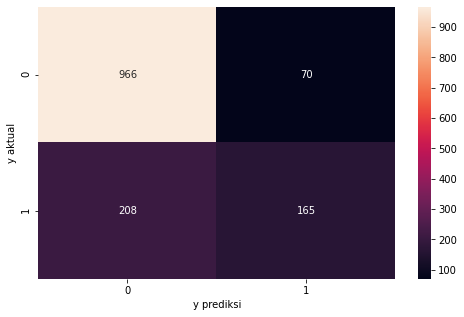

In [1470]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(yselGradscal1_test,y_predGradRSselscal1),annot=True,fmt=".0f",ax=ax)
plt.xlabel("y prediksi")
plt.ylabel("y aktual")
plt.show()

In [1471]:
print(classification_report(yselGradscal1_test,y_predGradRSselscal1))

precision    recall  f1-score   support

         0.0       0.82      0.93      0.87      1036
         1.0       0.70      0.44      0.54       373

    accuracy                           0.80      1409
   macro avg       0.76      0.69      0.71      1409
weighted avg       0.79      0.80      0.79      1409



In [1472]:
pd.DataFrame(data= [accuracy_score(yselGradscal1_test,y_predGradRSselscal1)*100,recall_score(yselGrad1_test,y_predGradRSselscal1)*100,precision_score(yselGradscal1_test,y_predGradRSselscal1)*100,roc_auc_score(yselGradscal1_test,y_predGradRSselscal1)*100,f1_score(yselGradscal1_test,y_predGradRSselscal1)*100],
             index=["accuracy","recall","precission","roc_auc_score","F1 Score"],
             columns=["Score (%)"]
)

Score (%)
accuracy       80.269695
recall         44.235925
precission     70.212766
roc_auc_score  68.739584
F1 Score       54.276316

In [1473]:
Grad_Summary = pd.DataFrame({"Gradient Boosting": ["accuracy","recall","precision","roc_auc_score","f1_score"],
                                "All Feature without Parameter Tuning and without Scalling train 90":[accuracy_score(yGrad_test,y_predGrad)*100,recall_score(yGrad_test,y_predGrad)*100,precision_score(yGrad_test,y_predGrad)*100,roc_auc_score(yGrad_test,y_predGrad)*100,f1_score(yGrad_test,y_predGrad)*100],
                                "All Feature without Parameter Tuning and without Scalling train 80":[accuracy_score(yGrad1_test,y_predGrad1)*100,recall_score(yGrad1_test,y_predGrad1)*100,precision_score(yGrad1_test,y_predGrad1)*100,roc_auc_score(yGrad1_test,y_predGrad1)*100,f1_score(yGrad1_test,y_predGrad1)*100],
                                "All Feature with Parameter Tuning and without Scalling train 90":[accuracy_score(yGrad_test,y_predGradRS)*100,recall_score(yGrad_test,y_predGradRS)*100,precision_score(yGrad_test,y_predGradRS)*100,roc_auc_score(yGrad_test,y_predGradRS)*100,f1_score(yGrad_test,y_predGradRS)*100],
                                "All Feature with Parameter Tuning and without Scalling train 80":[accuracy_score(yGrad1_test,y_predGradRS1)*100,recall_score(yGrad1_test,y_predGradRS1)*100,precision_score(yGrad1_test,y_predGradRS1)*100,roc_auc_score(yGrad1_test,y_predGradRS1)*100,f1_score(yGrad1_test,y_predGradRS1)*100],
                                "All Feature without Parameter Tuning but with Scalling train 90":[accuracy_score(yscalGrad_test,y_predGradscal)*100,recall_score(yscalGrad_test,y_predGradscal)*100,precision_score(yscalGrad_test,y_predGradscal)*100,roc_auc_score(yscalGrad_test,y_predGradscal)*100,f1_score(yscalGrad_test,y_predGradscal)*100],
                                "All Feature without Parameter Tuning but with Scalling train 80":[accuracy_score(yscalGrad1_test,y_predGradscal1)*100,recall_score(yscalGrad1_test,y_predGradscal1)*100,precision_score(yscalGrad1_test,y_predGradscal1)*100,roc_auc_score(yscalGrad1_test,y_predGradscal1)*100,f1_score(yscalGrad1_test,y_predGradscal1)*100],
                                "All Feature with Parameter Tuning Random Search and with Scalling train 90":[accuracy_score(yscalGrad_test,y_predGradRSscal)*100,recall_score(yscalGrad_test,y_predGradRSscal)*100,precision_score(yscalGrad_test,y_predGradRSscal)*100,roc_auc_score(yscalGrad_test,y_predGradRSscal)*100,f1_score(yscalGrad_test,y_predGradRSscal)*100],
                                "All Feature with Parameter Tuning Random Search and with Scalling train 80":[accuracy_score(yscalGrad1_test,y_predGradRSscal1)*100,recall_score(yscalGrad1_test,y_predGradRSscal1)*100,precision_score(yscalGrad1_test,y_predGradRSscal1)*100,roc_auc_score(yscalGrad1_test,y_predGradRSscal1)*100,f1_score(yscalGrad1_test,y_predGradRSscal1)*100],
                                "Feature Selection without Parameter Tuning Random Search and without Scalling train 90":[accuracy_score(yselGrad_test,y_predGradsel)*100,recall_score(yselGrad_test,y_predGradsel)*100,precision_score(yselGrad_test,y_predGradsel)*100,roc_auc_score(yselGrad_test,y_predGradsel)*100,f1_score(yselGrad_test,y_predGradsel)*100],
                                 "Feature Selection without Parameter Tuning Random Search and without Scalling train 80":[accuracy_score(yselGrad1_test,y_predGradsel1)*100,recall_score(yselGrad1_test,y_predGradsel1)*100,precision_score(yselGrad1_test,y_predGradsel1)*100,roc_auc_score(yselGrad1_test,y_predGradsel1)*100,f1_score(yselGrad1_test,y_predGradsel1)*100],
                                 "Feature Selection with Parameter Tuning Random Search and without Scalling train 90":[accuracy_score(yselGrad_test,y_predGradRSsel)*100,recall_score(yselGrad_test,y_predGradRSsel)*100,precision_score(yselGrad_test,y_predGradRSsel)*100,roc_auc_score(yselGrad_test,y_predGradRSsel)*100,f1_score(yselGrad_test,y_predGradRSsel)*100],
                                 "Feature Selection with Parameter Tuning Random Search and without Scalling train 80":[accuracy_score(yselGrad1_test,y_predGradRSsel1)*100,recall_score(yselGrad1_test,y_predGradRSsel1)*100,precision_score(yselGrad1_test,y_predGradRSsel1)*100,roc_auc_score(yselGrad1_test,y_predGradRSsel1)*100,f1_score(yselGrad1_test,y_predGradRSsel1)*100],
                                  "Feature Selection without Parameter Tuning and with Scalling train 90":[accuracy_score(yselGradscal_test,y_predGradselscal)*100,recall_score(yselGrad_test,y_predGradselscal)*100,precision_score(yselGradscal_test,y_predGradselscal)*100,roc_auc_score(yselGradscal_test,y_predGradselscal)*100,f1_score(yselGradscal_test,y_predGradselscal)*100],
                                   "Feature Selection without Parameter Tuning and with Scalling train 80":[accuracy_score(yselGradscal1_test,y_predGradselscal1)*100,recall_score(yselGrad1_test,y_predGradselscal1)*100,precision_score(yselGradscal1_test,y_predGradselscal1)*100,roc_auc_score(yselGradscal1_test,y_predGradselscal1)*100,f1_score(yselGradscal1_test,y_predGradselscal1)*100],
                                   "Feature Selection with Parameter Tuning Random Search and with Scalling train 90":[accuracy_score(yselGradscal_test,y_predGradRSselscal)*100,recall_score(yselGrad_test,y_predGradRSselscal)*100,precision_score(yselGradscal_test,y_predGradRSselscal)*100,roc_auc_score(yselGradscal_test,y_predGradRSselscal)*100,f1_score(yselGradscal_test,y_predGradRSselscal)*100],
                                    "Feature Selection with Parameter Tuning Random Search and with Scalling train 80":[accuracy_score(yselGradscal1_test,y_predGradRSselscal1)*100,recall_score(yselGrad1_test,y_predGradRSselscal1)*100,precision_score(yselGradscal1_test,y_predGradRSselscal1)*100,roc_auc_score(yselGradscal1_test,y_predGradRSselscal1)*100,f1_score(yselGradscal1_test,y_predGradRSselscal1)*100]
                            





})
e  = Grad_Summary.set_index("Gradient Boosting").T
e 

Gradient Boosting                                    accuracy     recall  \
All Feature without Parameter Tuning and withou...  81.560284  54.639175   
All Feature without Parameter Tuning and withou...  80.908446  54.423592   
All Feature with Parameter Tuning and without S...  81.843972  60.824742   
All Feature with Parameter Tuning and without S...  79.276082  37.533512   
All Feature without Parameter Tuning but with S...  81.702128  55.154639   
All Feature without Parameter Tuning but with S...  80.979418  54.691689   
All Feature with Parameter Tuning Random Search...  80.709220  52.577320   
All Feature with Parameter Tuning Random Search...  82.185947  57.640751   
Feature Selection without Parameter Tuning Rand...  81.276596  54.639175   
Feature Selection without Parameter Tuning Rand...  80.837473  53.887399   
Feature Selection with Parameter Tuning Random ...  79.148936  53.092784   
Feature Selection with Parameter Tuning Random ...  79.985806  50.402145   
Feature Selection without Parameter Tuning and ...  81.276596  54.639175   
Feature Selection without Parameter Tuning and ...  80.837473  53.887399   
Feature Selection with Parameter Tuning Random ...  81.843972  53.092784   
Feature Selection with Parameter Tuning Random ...  80.269695  44.235925   

Gradient Boosting                                   precision  roc_auc_score  \
All Feature without Parameter Tuning and withou...  71.621622      73.209999   
All Feature without Parameter Tuning and withou...  67.218543      72.433804   
All Feature with Parameter Tuning and without S...  69.411765      75.324309   
All Feature with Parameter Tuning and without S...  70.351759      65.919266   
All Feature without Parameter Tuning but with S...  71.812081      73.467731   
All Feature without Parameter Tuning but with S...  67.326733      72.567852   
All Feature with Parameter Tuning Random Search...  69.863014      71.983376   
All Feature with Parameter Tuning Random Search...  69.805195      74.331958   
Feature Selection without Parameter Tuning Rand...  70.666667      73.014304   
Feature Selection without Parameter Tuning Rand...  67.224080      72.213970   
Feature Selection with Parameter Tuning Random ...  64.779874      71.066940   
Feature Selection with Parameter Tuning Random ...  65.964912      70.519605   
Feature Selection without Parameter Tuning and ...  70.666667      73.014304   
Feature Selection without Parameter Tuning and ...  67.224080      72.213970   
Feature Selection with Parameter Tuning Random ...  73.571429      72.926040   
Feature Selection with Parameter Tuning Random ...  70.212766      68.739584   

Gradient Boosting                                    f1_score  
All Feature without Parameter Tuning and withou...  61.988304  
All Feature without Parameter Tuning and withou...  60.148148  
All Feature with Parameter Tuning and without S...  64.835165  
All Feature with Parameter Tuning and without S...  48.951049  
All Feature without Parameter Tuning but with S...  62.390671  
All Feature without Parameter Tuning but with S...  60.355030  
All Feature with Parameter Tuning Random Search...  60.000000  
All Feature with Parameter Tuning Random Search...  63.142438  
Feature Selection without Parameter Tuning Rand...  61.627907  
Feature Selection without Parameter Tuning Rand...  59.821429  
Feature Selection with Parameter Tuning Random ...  58.356941  
Feature Selection with Parameter Tuning Random ...  57.142857  
Feature Selection without Parameter Tuning and ...  61.627907  
Feature Selection without Parameter Tuning and ...  59.821429  
Feature Selection with Parameter Tuning Random ...  61.676647  
Feature Selection with Parameter Tuning Random ...  54.276316

## The Best COndition Model Test Gradient Boosting : All Feature with Parameter Tuning Random Search and without Scalling train 90

In [1489]:
Grad_Summary = pd.DataFrame({"Gradient Boosting": ["accuracy","recall","precision","roc_auc_score","f1_score"],"All Feature with Parameter Tuning and without Scalling train 90":[accuracy_score(yGrad_test,y_predGradRS)*100,recall_score(yGrad_test,y_predGradRS)*100,precision_score(yGrad_test,y_predGradRS)*100,roc_auc_score(yGrad_test,y_predGradRS)*100,f1_score(yGrad_test,y_predGradRS)*100],

})
Grad_Summary.set_index("Gradient Boosting").T

Gradient Boosting                                    accuracy     recall  \
All Feature with Parameter Tuning and without S...  81.843972  60.824742   

Gradient Boosting                                   precision  roc_auc_score  \
All Feature with Parameter Tuning and without S...  69.411765      75.324309   

Gradient Boosting                                    f1_score  
All Feature with Parameter Tuning and without S...  64.835165

In [1490]:
BestGrad

precision    recall  f1-score    support
Not Churned    0.857944  0.898239  0.877629  511.00000
Churned        0.694118  0.608247  0.648352  194.00000
accuracy       0.818440  0.818440  0.818440    0.81844
macro avg      0.776031  0.753243  0.762990  705.00000
weighted avg   0.812863  0.818440  0.814537  705.00000

## Best Of The Best Model Tested

In [1491]:
TheBestModel = pd.concat([BestLG, BestDT, BestRF, BestXGB, BestGrad], keys = ['BEST LOGRES', 'BEST DECISION TREE', 'BEST RANDOM FOREST', 'BEST XGB', 'BEST GRADBOOST'])
TheBestModel

precision    recall  f1-score      support
BEST LOGRES        Not Churned    0.857143  0.904110  0.880000   511.000000
                   Churned        0.704819  0.603093  0.650000   194.000000
                   accuracy       0.821277  0.821277  0.821277     0.821277
                   macro avg      0.780981  0.753601  0.765000   705.000000
                   weighted avg   0.815227  0.821277  0.816709   705.000000
BEST DECISION TREE Not Churned    0.870748  0.864865  0.867797  1036.000000
                   Churned        0.631579  0.643432  0.637450   373.000000
                   accuracy       0.806246  0.806246  0.806246     0.806246
                   macro avg      0.751164  0.754148  0.752623  1409.000000
                   weighted avg   0.807434  0.806246  0.806818  1409.000000
BEST RANDOM FOREST Not Churned    0.847397  0.923679  0.883895   511.000000
                   Churned        0.736486  0.561856  0.637427   194.000000
                   accuracy       0.824113  0.824113  0.824113     0.824113
                   macro avg      0.791942  0.742767  0.760661   705.000000
                   weighted avg   0.816877  0.824113  0.816073   705.000000
BEST XGB           Not Churned    0.862286  0.924710  0.892408  1036.000000
                   Churned        0.738255  0.589812  0.655738   373.000000
                   accuracy       0.836054  0.836054  0.836054     0.836054
                   macro avg      0.800271  0.757261  0.774073  1409.000000
                   weighted avg   0.829452  0.836054  0.829755  1409.000000
BEST GRADBOOST     Not Churned    0.857944  0.898239  0.877629   511.000000
                   Churned        0.694118  0.608247  0.648352   194.000000
                   accuracy       0.818440  0.818440  0.818440     0.818440
                   macro avg      0.776031  0.753243  0.762990   705.000000
                   weighted avg   0.812863  0.818440  0.814537   705.000000

In [1492]:

# Accuracy, Precision, Recall and F1 Score

#Logres
LRG_acc = accuracy_score(yLRScal1_test, y_predLRScal1)
LRG_prec = precision_score(yLRScal1_test, y_predLRScal1, pos_label = 1)
LRG_rec = recall_score(yLRScal1_test, y_predLRScal1, pos_label = 1)
LRG_fsc = f1_score(yLRScal1_test, y_predLRScal1, pos_label = 1)


# Decision Tree
DT_acc = accuracy_score(yselDTscal1_test,y_predselDTRSscal1)
DT_prec = precision_score(yselDTscal1_test,y_predselDTRSscal1, pos_label = 1)
DT_rec = recall_score(yselDTscal1_test,y_predselDTRSscal1, pos_label = 1)
DT_fsc = f1_score(yselDTscal1_test,y_predselDTRSscal1, pos_label = 1)

# Random Forest
RF_acc = accuracy_score(yScalRF1_test,y_predRFscal1)
RF_prec = precision_score(yScalRF1_test,y_predRFscal1, pos_label = 1)
RF_rec = recall_score(yScalRF1_test,y_predRFscal1, pos_label = 1)
RF_fsc = f1_score(yScalRF1_test,y_predRFscal1, pos_label = 1)

# XGB
XGB_acc = accuracy_score(yselXG1_test,y_predXGBRSsel1)
XGB_prec = precision_score(yselXG1_test,y_predXGBRSsel1, pos_label = 1)
XGB_rec = recall_score(yselXG1_test,y_predXGBRSsel1, pos_label = 1)
XGB_fsc = f1_score(yselXG1_test,y_predXGBRSsel1, pos_label = 1)

# Gradient Boosting
Grad_acc = accuracy_score(yscalGrad1_test,y_predGradRSscal1)
Grad_prec = precision_score(yscalGrad1_test,y_predGradRSscal1, pos_label = 1)
Grad_rec = recall_score(yscalGrad1_test,y_predGradRSscal1, pos_label = 1)
Grad_fsc = f1_score(yscalGrad1_test,y_predGradRSscal1, pos_label = 1)

In [1494]:

Best_Model_Final = pd.DataFrame({'LRG BEST' : [LRG_acc, LRG_prec, LRG_rec, LRG_fsc],
                                 'DT BEST' : [DT_acc, DT_prec, DT_rec, DT_fsc], 
                                 'RF BEST' : [RF_acc, RF_prec, RF_rec, RF_fsc], 
                                  'XGB BEST' : [XGB_acc, XGB_prec, XGB_rec, XGB_fsc], 
                                   'GRAD BEST' : [Grad_acc, Grad_prec, Grad_rec, Grad_fsc]}, 
                                index = ['ACCURACY', 'PRECISION', 'RECALL', 'F1 SCORE'])
Best_Model_Final

LRG BEST   DT BEST   RF BEST  XGB BEST  GRAD BEST
ACCURACY   0.820440  0.806246  0.784954  0.836054   0.821859
PRECISION  0.685185  0.631579  0.631579  0.738255   0.698052
RECALL     0.595174  0.643432  0.450402  0.589812   0.576408
F1 SCORE   0.637016  0.637450  0.525822  0.655738   0.631424

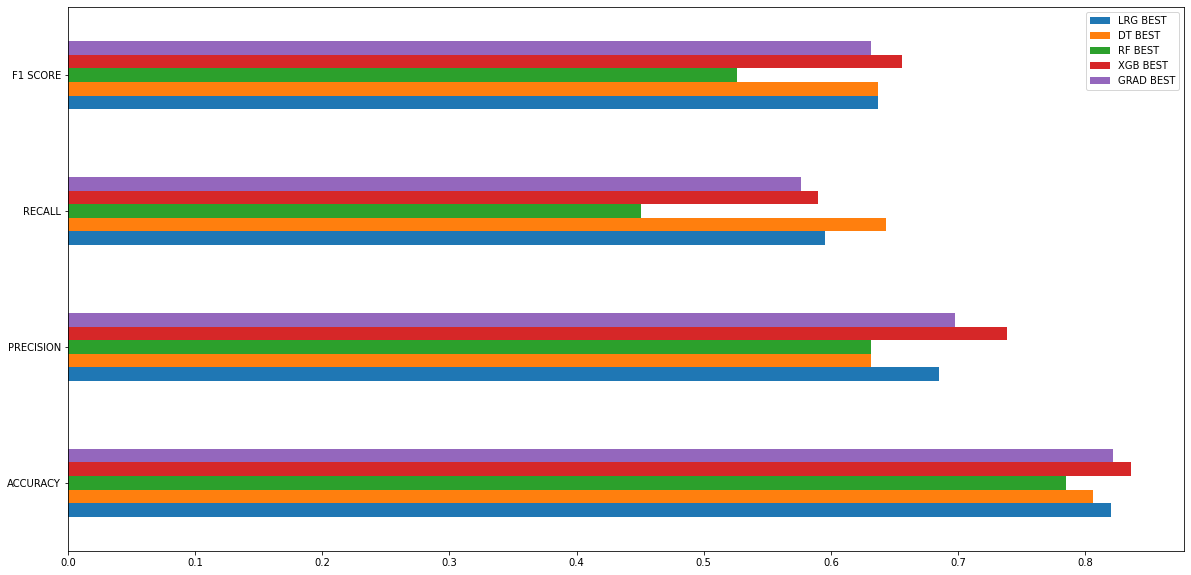

In [1493]:
final_score_comp.plot(kind = 'barh', figsize = (20,10))
plt.show()


## We Have Finished the Model Test with five Model classification, we think the best model is Decision Tree Classifier it is has no overfitting compared with other model and have most stable overall result. Other than that We prefer to reduce prediction errors Churn negative, therefore we choose the model with the highest recall.